# **DETECTION OF CHRONIC KIDNEY DISEASE USING MACHINE LEARNING ALGORITHMS - DATASET 1**

## **ENVIRONMENT SET-UP**

In [132]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from scipy.io import arff
from sklearn import preprocessing
from numpy import mean

# Imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

'PiYGn' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Importing the dataset into the environment


In [2]:
# load the dataset with pandas read_csv function
kidney_data = pd.read_csv(r"C:/Users/vanes/OneDrive/Data Science Project/India Dataset/kidney_disease.csv", index_col="id")

# **EXPLORATORY DATA ANALYSIS**

Dataset column information is as follows;

- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class




In [3]:
kidney_data.head(10).transpose()

id                       0           1           2           3           4  \
age                   48.0         7.0        62.0        48.0        51.0   
bp                    80.0        50.0        80.0        70.0        80.0   
sg                    1.02        1.02        1.01       1.005        1.01   
al                     1.0         4.0         2.0         4.0         2.0   
su                     0.0         0.0         3.0         0.0         0.0   
rbc                    NaN         NaN      normal      normal      normal   
pc                  normal      normal      normal    abnormal      normal   
pcc             notpresent  notpresent  notpresent     present  notpresent   
ba              notpresent  notpresent  notpresent  notpresent  notpresent   
bgr                  121.0         NaN       423.0       117.0       106.0   
bu                    36.0        18.0        53.0        56.0        26.0   
sc                     1.2         0.8         1.8         3.8         1.4   
sod                    NaN         NaN         NaN       111.0         NaN   
pot                    NaN         NaN         NaN         2.5         NaN   
hemo                  15.4        11.3         9.6        11.2        11.6   
pcv                     44          38          31          32          35   
wc                    7800        6000        7500        6700        7300   
rc                     5.2         NaN         NaN         3.9         4.6   
htn                    yes          no          no         yes          no   
dm                     yes          no         yes          no          no   
cad                     no          no          no          no          no   
appet                 good        good        poor        poor        good   
pe                      no          no          no         yes          no   
ane                     no          no         yes         yes          no   
classification         ckd         ckd         ckd         ckd         ckd   

id                       5           6           7           8           9  
age                   60.0        68.0        24.0        52.0        53.0  
bp                    90.0        70.0         NaN       100.0        90.0  
sg                   1.015        1.01       1.015       1.015        1.02  
al                     3.0         0.0         2.0         3.0         2.0  
su                     0.0         0.0         4.0         0.0         0.0  
rbc                    NaN         NaN      normal      normal    abnormal  
pc                     NaN      normal    abnormal    abnormal    abnormal  
pcc             notpresent  notpresent  notpresent     present     present  
ba              notpresent  notpresent  notpresent  notpresent  notpresent  
bgr                   74.0       100.0       410.0       138.0        70.0  
bu                    25.0        54.0        31.0        60.0       107.0  
sc                     1.1        24.0         1.1         1.9         7.2  
sod                  142.0       104.0         NaN         NaN       114.0  
pot                    3.2         4.0         NaN         NaN         3.7  
hemo                  12.2        12.4        12.4        10.8         9.5  
pcv                     39          36          44          33          29  
wc                    7800         NaN        6900        9600       12100  
rc                     4.4         NaN           5         4.0         3.7  
htn                    yes          no          no         yes         yes  
dm                     yes          no         yes         yes         yes  
cad                     no          no          no          no          no  
appet                 good        good        good        good        poor  
pe                     yes          no         yes          no          no  
ane                     no          no          no         yes         yes  
classification         ckd         ckd        

In [4]:
# edit the column names for easier readability
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [5]:
kidney_data.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [6]:
# obtain some summary statistics of the columns to gauge the data quality such as missing data
kidney_data.describe(include="all").transpose()

count unique         top freq        mean        std  \
age                      391.0    NaN         NaN  NaN   51.483376  17.169714   
blood_pressure           388.0    NaN         NaN  NaN   76.469072  13.683637   
specific_gravity         353.0    NaN         NaN  NaN    1.017408   0.005717   
albumin                  354.0    NaN         NaN  NaN    1.016949   1.352679   
sugar                    351.0    NaN         NaN  NaN    0.450142   1.099191   
red_blood_cells            248      2      normal  201         NaN        NaN   
pus_cell                   335      2      normal  259         NaN        NaN   
pus_cell_clumps            396      2  notpresent  354         NaN        NaN   
bacteria                   396      2  notpresent  374         NaN        NaN   
blood_glucose_random     356.0    NaN         NaN  NaN  148.036517  79.281714   
blood_urea               381.0    NaN         NaN  NaN   57.425722  50.503006   
serum_creatinine         383.0    NaN         NaN  NaN    3.072454   5.741126   
sodium                   313.0    NaN         NaN  NaN  137.528754  10.408752   
potassium                312.0    NaN         NaN  NaN    4.627244   3.193904   
hemoglobin               348.0    NaN         NaN  NaN   12.526437   2.912587   
packed_cell_volume         330     44          41   21         NaN        NaN   
white_blood_cell_count     295     92        9800   11         NaN        NaN   
red_blood_cell_count       270     49         5.2   18         NaN        NaN   
hypertension               398      2          no  251         NaN        NaN   
diabetes_mellitus          398      5          no  258         NaN        NaN   
coronary_artery_disease    398      3          no  362         NaN        NaN   
appetite                   399      2        good  317         NaN        NaN   
pedal_edema                399      2          no  323         NaN        NaN   
anemia                     399      2          no  339         NaN        NaN   
class                      400      3         ckd  248         NaN        NaN   

                           min    25%    50%    75%    max  
age                        2.0   42.0   55.0   64.5   90.0  
blood_pressure            50.0   70.0   80.0   80.0  180.0  
specific_gravity         1.005   1.01   1.02   1.02  1.025  
albumin                    0.0    0.0    0.0    2.0    5.0  
sugar                      0.0    0.0    0.0    0.0    5.0  
red_blood_cells            NaN    NaN    NaN    NaN    NaN  
pus_cell                   NaN    NaN    NaN    NaN    NaN  
pus_cell_clumps            NaN    NaN    NaN    NaN    NaN  
bacteria                   NaN    NaN    NaN    NaN    NaN  
blood_glucose_random      22.0   99.0  121.0  163.0  490.0  
blood_urea                 1.5   27.0   42.0   66.0  391.0  
serum_creatinine           0.4    0.9    1.3    2.8   76.0  
sodium                     4.5  135.0  138.0  142.0  163.0  
potassium                  2.5    3.8    4.4    4.9   47.0  
hemoglobin                 3.1   10.3  12.65   15.0   17.8  
packed_cell_volume         NaN    NaN    NaN    NaN    NaN  
white_blood_cell_count     NaN    NaN    NaN    NaN    NaN  
red_blood_cell_count       NaN    NaN    NaN    NaN    NaN  
hypertension               NaN    NaN    NaN    NaN    NaN  
diabetes_mellitus          NaN    NaN    NaN    NaN    NaN  
coronary_artery_disease    NaN    NaN    NaN    NaN    NaN  
appetite                   NaN    NaN    NaN    NaN    NaN  
pedal_edema                NaN    NaN    NaN    NaN    NaN  
anemia                     NaN    NaN    NaN    NaN    NaN  
class                      NaN    NaN    NaN    NaN    NaN

In [7]:
kidney_data.shape

(400, 25)

## **Data Cleaning**

In [8]:
kidney_data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [9]:
# Percentage of missing data per column
(kidney_data.isnull().sum() / kidney_data.shape[0] * 100.00).round(2)

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.50
white_blood_cell_count     26.25
red_blood_cell_count       32.50
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

Columns with missing data greater that 25% include: - 
- red blood cells
- white blood cell count
- red blood cell count

Columns with missing data less than 25% and greater and equal to 5% include: - 
- specific_gravity
- albumin 
- sugar
- pus_cell
- blood_glucose_random
- sodium
- potassium 
- hemoglobin 
- packed_cell_volume

The missing data can be dealt with in the following three different ways: -
* All the rows with missing data can be eliminated
* All the columns with a lot of missing data can be eliminated
* The missing data can be replaced through various imputation ways either replacing the values with mean, median or mode or using k-nearest neighbour to replace the data values with similar computed values based on similarity and nearness.

<AxesSubplot:>

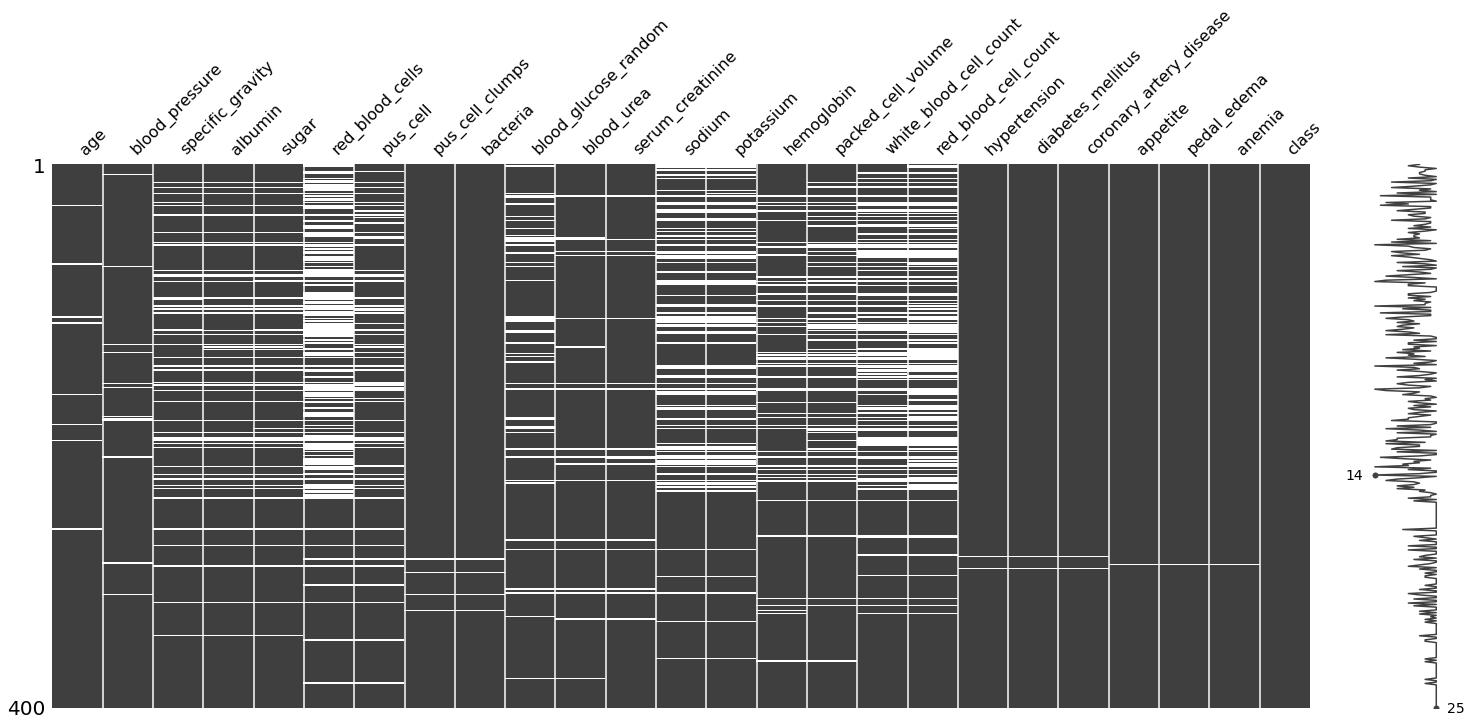

In [10]:
# Visualizing the missing data using a matrix display image
msno.matrix(kidney_data)

In [11]:
kidney_data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
id                                                                           
0   48.0            80.0             1.020      1.0    0.0             NaN   
1    7.0            50.0             1.020      4.0    0.0             NaN   
2   62.0            80.0             1.010      2.0    3.0          normal   
3   48.0            70.0             1.005      4.0    0.0          normal   
4   51.0            80.0             1.010      2.0    0.0          normal   

    pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
id                                                              ...   
0     normal      notpresent  notpresent                 121.0  ...   
1     normal      notpresent  notpresent                   NaN  ...   
2     normal      notpresent  notpresent                 423.0  ...   
3   abnormal         present  notpresent                 117.0  ...   
4     normal      notpresent  notpresent                 106.0  ...   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
id                                                                     
0                   44                    7800                   5.2   
1                   38                    6000                   NaN   
2                   31                    7500                   NaN   
3                   32                    6700                   3.9   
4                   35                    7300                   4.6   

    hypertension  diabetes_mellitus coronary_artery_disease appetite  \
id                                                                     
0            yes                yes                      no     good   
1             no                 no                      no     good   
2             no                yes                      no     poor   
3            yes                 no                      no     poor   
4             no                 no                      no     good   

   pedal_edema anemia class  
id                           
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [11]:
kidney_data.reset_index(drop = True).head(10).transpose() 
# removal of the index id column

0           1           2           3  \
age                            48.0         7.0        62.0        48.0   
blood_pressure                 80.0        50.0        80.0        70.0   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                         1.0         4.0         2.0         4.0   
sugar                           0.0         0.0         3.0         0.0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random          121.0         NaN       423.0       117.0   
blood_urea                     36.0        18.0        53.0        56.0   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN       111.0   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
class                           ckd         ckd         ckd         ckd   

                                  4           5           6           7  \
age                            51.0        60.0        68.0        24.0   
blood_pressure                 80.0        90.0        70.0         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                         2.0         3.0         0.0         2.0   
sugar                           0.0         0.0         0.0         4.0   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random          106.0        74.0       100.0       410.0   
blood_urea                     26.0        25.0        54.0        31.0   
serum_creatinine                1.4         1.1        24.0         1.1   
sodium                          NaN       142.0       104.0         NaN   
potassium                       NaN         3.2         4.0         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
class                           ckd         ckd         ckd         ckd   

                                  8           9  
age                            52.0        53.0  
blood_pressure                10

In [11]:
kidney_data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
id                                                                           
0   48.0            80.0             1.020      1.0    0.0             NaN   
1    7.0            50.0             1.020      4.0    0.0             NaN   
2   62.0            80.0             1.010      2.0    3.0          normal   
3   48.0            70.0             1.005      4.0    0.0          normal   
4   51.0            80.0             1.010      2.0    0.0          normal   

    pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
id                                                              ...   
0     normal      notpresent  notpresent                 121.0  ...   
1     normal      notpresent  notpresent                   NaN  ...   
2     normal      notpresent  notpresent                 423.0  ...   
3   abnormal         present  notpresent                 117.0  ...   
4     normal      notpresent  notpresent                 106.0  ...   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
id                                                                     
0                   44                    7800                   5.2   
1                   38                    6000                   NaN   
2                   31                    7500                   NaN   
3                   32                    6700                   3.9   
4                   35                    7300                   4.6   

    hypertension  diabetes_mellitus coronary_artery_disease appetite  \
id                                                                     
0            yes                yes                      no     good   
1             no                 no                      no     good   
2             no                yes                      no     poor   
3            yes                 no                      no     poor   
4             no                 no                      no     good   

   pedal_edema anemia class  
id                           
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

Carefully considering the categorical and numerical columns of the dataset. The first thing to understand is the type of information under each feature and any unique values present. This would show a somewhat detail of the composition of the data points under each variable. This would eventually be visually shown for easier understanding and readability.

In [12]:
def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'object']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

In [13]:
categorical_col, numerical_col = extract_cat_num(kidney_data)

In [14]:
categorical_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [15]:
numerical_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin']

In [16]:
for col in categorical_col:
    print('\nUnique Values in {} has\n{} '.format(col,kidney_data[col].value_counts()))
    print('\n')


Unique Values in red_blood_cells has
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64 



Unique Values in pus_cell has
normal      259
abnormal     76
Name: pus_cell, dtype: int64 



Unique Values in pus_cell_clumps has
notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64 



Unique Values in bacteria has
notpresent    374
present        22
Name: bacteria, dtype: int64 



Unique Values in packed_cell_volume has
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: packed_cell_volume, dtype: int64 



Unique Values in

In [17]:
for i in kidney_data['packed_cell_volume']:
    print(i)

44
38
31
32
35
39
36
44
33
29
28
32
28
nan
16
24
nan
nan
37
30
24
32
32
nan
39
29
35
37
nan
38
nan
30
34
29
nan
36
32
28
nan
40
32
nan
33
24
28
nan
37
45
29
29
28
33
34
40
40
28
30
nan
33
nan
nan
nan
33
27
nan
48
	?
nan
37
52
44
28
nan
14
29
nan
36
34
30
40
31
29
nan
nan
22
nan
nan
32
nan
nan
40
52
33
30
36
nan
36
32
18
32
nan
33
52
36
nan
42
17
34
37
nan
34
32
33
nan
nan
44
nan
37
nan
nan
nan
46
nan
42
28
nan
37
35
23
nan
22
36
24
37
33
39
nan
29
nan
33
nan
19
nan
nan
33
24
nan
25
nan
32
41
30
32
22
26
36
nan
39
31
35
35
42
37
27
40
nan
nan
42
39
27
33
26
34
41
35
nan
23
41
34
39
28
30
35
nan
31
34
nan
34
38
29
30
26
nan
15
nan
nan
24
nan
30
25
37
21
24
nan
31
43
41
41
41
nan
20
nan
31
34
	43
nan
38
36
34
28
36
nan
nan
38
nan
35
26
36
nan
31
nan
35
nan
nan
44
26
25
40
28
39
36
31
28
47
40
19
26
nan
37
9
48
52
46
42
49
52
41
46
44
45
45
41
43
45
50
48
41
48
53
48
41
42
42
nan
44
43
41
50
44
48
52
41
44
43
52
41
44
43
50
43
52
41
52
48
40
50
41
45
48
52
43
41
48
50
45
41
52
44
48
40
44


In [18]:
kidney_data['packed_cell_volume'] = kidney_data['packed_cell_volume'].replace(["\t43"],[43])

In [19]:
for i in kidney_data['white_blood_cell_count']:
    print(i)

7800
6000
7500
6700
7300
7800
nan
6900
9600
12100
nan
4500
12200
nan
11000
3800
nan
nan
11400
5300
9200
6200
6900
nan
8300
8400
10300
9600
nan
nan
nan
7800
9600
nan
nan
9800
nan
6900
nan
9800
9100
nan
9200
7900
nan
nan
6400
8600
18900
21600
11000
nan
4300
8500
9800
nan
11300
nan
7200
nan
nan
nan
7700
nan
nan
nan
nan
nan
nan
6900
8300
14600
nan
6300
6400
nan
	6200
7100
nan
11800
9400
5500
nan
nan
3800
nan
nan
5800
13200
nan
9800
12500
5600
7000
11900
nan
nan
9100
5800
10400
nan
10700
7000
12700
nan
6800
6500
13600
10200
nan
11400
9000
nan
9800
10300
5600
nan
9800
nan
nan
nan
nan
nan
14900
5500
nan
8200
15200
5000
nan
16300
12400
13200
	8400
10200
nan
nan
9200
nan
nan
nan
6500
nan
nan
10500
4200
nan
15200
nan
nan
6700
nan
nan
14600
nan
4700
nan
7900
nan
10900
9400
10200
6000
8100
9500
nan
nan
2200
6700
nan
9600
12800
12800
11200
8600
4200
12400
nan
9800
nan
nan
19100
nan
nan
5800
	?
nan
12300
nan
7500
16700
9200
nan
2600
nan
nan
9600
4300
26400
10700
7900
nan
nan
nan
nan
nan
nan
10400
69

In [20]:
kidney_data['white_blood_cell_count'] = kidney_data['white_blood_cell_count'].replace(["\t6200","\t8400"],[6200,8400])

In [21]:
# Checking that the numerical data has been correctly re-assigned data type and values
for col in numerical_col:
    print('\nUnique Values in {} has\n{} '.format(col,kidney_data[col].value_counts()))
    print('\n')


Unique Values in age has
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 



Unique Values in blood_pressure has
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: blood_pressure, dtype: int64 



Unique Values in specific_gravity has
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: specific_gravity, dtype: int64 



Unique Values in albumin has
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: albumin, dtype: int64 



Unique Values in sugar has
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: sugar, dtype: int64 



Unique Values in blood_glucose_random has
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: blood_glucose_random, Length: 146,

Some of the variables, such as packed cell volume, white blood cell count and red blood cell count have been considered as objects although they are numerical and contain values that are not numbers. This prompts a conversion of these data types and values.

The same can be seen for the categorical values such as diabetes mellitus that has four unique values of 'no', 'yes', '\tno', '\tyes' and ' yes'. These values can also be converted to satisfy their true meaning.

In [22]:
# deep copy of the dataset to keep the orginal unchanged and manupilate the copy
kidney_data_new = kidney_data.copy()

In [23]:
# categorical features to be converted to numerical recognizable features with the 'NaN' or 'other' previously unrecognizable non-numerical data points are coerced to not a number (NaN) as recognized by the environment
# creating a function to serve that purpose
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce') 

features_to_be_num = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in features_to_be_num:
    convert_dtype(kidney_data_new,i)

In [24]:
# now to edit the categorical data
kidney_data_new['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

kidney_data_new['coronary_artery_disease'] = kidney_data_new['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

kidney_data_new['class'] = kidney_data_new['class'].replace(to_replace = 'ckd\t', value = 'ckd')

kidney_data_new['class'] = kidney_data_new['class'].replace(to_replace = 'notckd', value = 'not ckd')

In [25]:
def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'object']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_col,numerical_col=extract_cat_num(kidney_data_new)

In [26]:
kidney_data_new['albumin'] = pd.Categorical(kidney_data_new['albumin'])
kidney_data_new['sugar'] = pd.Categorical(kidney_data_new['sugar'])
kidney_data_new['specific_gravity'] = pd.Categorical(kidney_data_new['specific_gravity'])

In [27]:
kidney_data_new[categorical_col] = kidney_data_new[categorical_col].astype('category')

In [28]:
def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_columns,numerical_columns=extract_cat_num(kidney_data_new)

In [29]:
# Checking that the numerical data has been correctly re-assigned data type and values
for col in categorical_columns:
    print('\nUnique Values in {} has\n{} '.format(col,kidney_data_new[col].value_counts()))
    print('\n')


Unique Values in specific_gravity has
1.02     106
1.01      84
1.025     81
1.015     75
1.005      7
Name: specific_gravity, dtype: int64 



Unique Values in albumin has
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: albumin, dtype: int64 



Unique Values in sugar has
0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: sugar, dtype: int64 



Unique Values in red_blood_cells has
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64 



Unique Values in pus_cell has
normal      259
abnormal     76
Name: pus_cell, dtype: int64 



Unique Values in pus_cell_clumps has
notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64 



Unique Values in bacteria has
notpresent    374
present        22
Name: bacteria, dtype: int64 



Unique Values in hypertension has
no     251
yes    147
Name: hypertension, dtype: int64 



Unique Values in diabetes_mellitus has
no     261
yes    137
Name: diabetes_mellitus, dtype: int

In [30]:
# Checking that the numerical data has been correctly re-assigned data type and values
for col in numerical_columns:
    print('\nUnique Values in {} has\n{} '.format(col,kidney_data_new[col].value_counts()))
    print('\n')


Unique Values in age has
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 



Unique Values in blood_pressure has
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: blood_pressure, dtype: int64 



Unique Values in blood_glucose_random has
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: blood_glucose_random, Length: 146, dtype: int64 



Unique Values in blood_urea has
46.0     15
25.0     13
19.0     11
40.0     10
50.0      9
         ..
176.0     1
145.0     1
92.0      1
322.0     1
186.0     1
Name: blood_urea, Length: 118, dtype: int64 



Unique Values in serum_creatinine has
1.2     40
1.1     24
0.5     23
1.0     23
0.9     22
        ..
3.8      1
12.2     1
9.2      1
13.8     1
0.4      1
Name:

In [31]:
kidney_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    category
 3   albumin                  354 non-null    category
 4   sugar                    351 non-null    category
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  hemoglobin

In [32]:
# obtain some summary statistics of the columns 
kidney_data_new[categorical_columns].describe().transpose()

count unique         top   freq
specific_gravity         353.0    5.0        1.02  106.0
albumin                  354.0    6.0         0.0  199.0
sugar                    351.0    6.0         0.0  290.0
red_blood_cells            248      2      normal    201
pus_cell                   335      2      normal    259
pus_cell_clumps            396      2  notpresent    354
bacteria                   396      2  notpresent    374
hypertension               398      2          no    251
diabetes_mellitus          398      2          no    261
coronary_artery_disease    398      2          no    364
appetite                   399      2        good    317
pedal_edema                399      2          no    323
anemia                     399      2          no    339
class                      400      2         ckd    250

In [33]:
kidney_data_new[numerical_columns].describe().transpose()

count         mean          std     min     25%  \
age                     391.0    51.483376    17.169714     2.0    42.0   
blood_pressure          388.0    76.469072    13.683637    50.0    70.0   
blood_glucose_random    356.0   148.036517    79.281714    22.0    99.0   
blood_urea              381.0    57.425722    50.503006     1.5    27.0   
serum_creatinine        383.0     3.072454     5.741126     0.4     0.9   
sodium                  313.0   137.528754    10.408752     4.5   135.0   
potassium               312.0     4.627244     3.193904     2.5     3.8   
hemoglobin              348.0    12.526437     2.912587     3.1    10.3   
packed_cell_volume      329.0    38.884498     8.990105     9.0    32.0   
white_blood_cell_count  294.0  8406.122449  2944.474190  2200.0  6500.0   
red_blood_cell_count    269.0     4.707435     1.025323     2.1     3.9   

                            50%     75%      max  
age                       55.00    64.5     90.0  
blood_pressure            80.00    80.0    180.0  
blood_glucose_random     121.00   163.0    490.0  
blood_urea                42.00    66.0    391.0  
serum_creatinine           1.30     2.8     76.0  
sodium                   138.00   142.0    163.0  
potassium                  4.40     4.9     47.0  
hemoglobin                12.65    15.0     17.8  
packed_cell_volume        40.00    45.0     54.0  
white_blood_cell_count  8000.00  9800.0  26400.0  
red_blood_cell_count       4.80     5.4      8.0

In [34]:
# Percentage of missing data per column
(kidney_data_new.isnull().sum() / kidney_data_new.shape[0] * 100.00).round(2)

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

<AxesSubplot:>

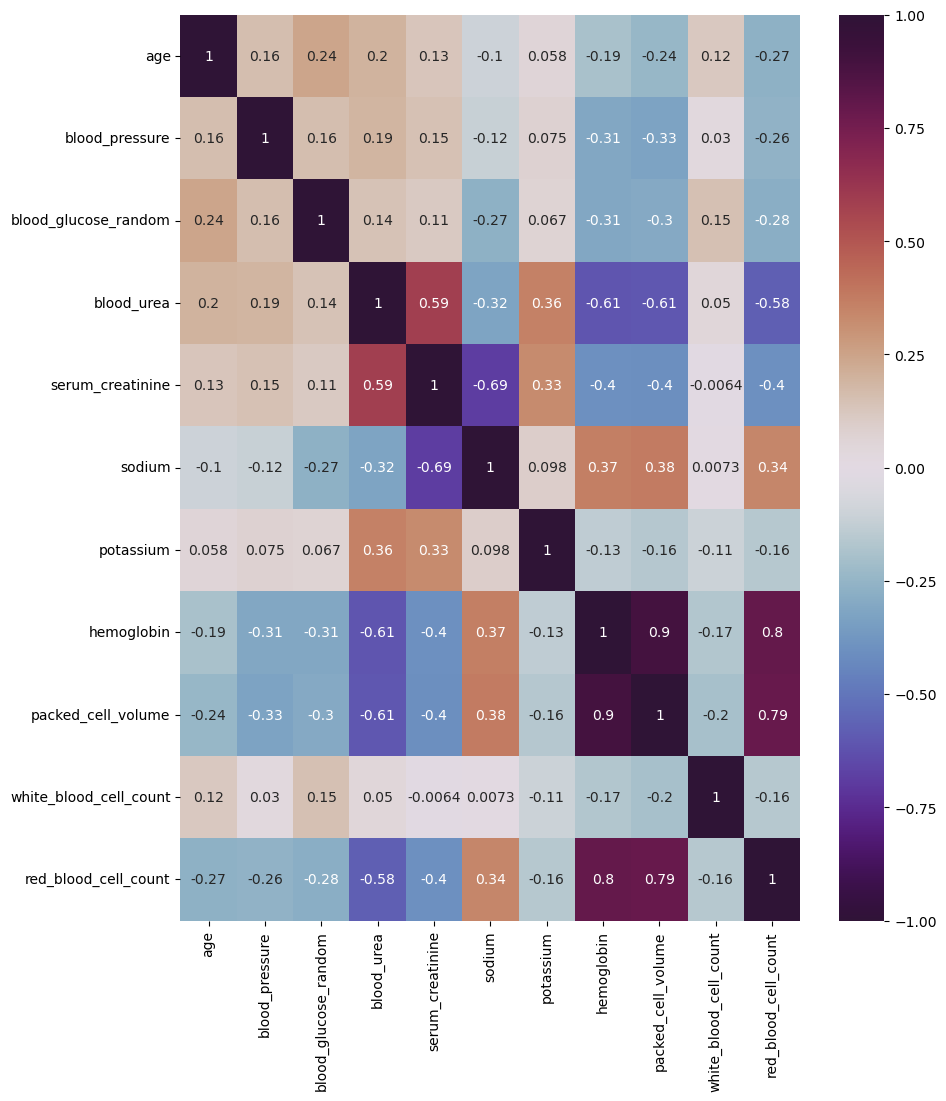

In [35]:
plt.figure(figsize=(10,12), dpi=100);

sns.heatmap(kidney_data_new.corr(),vmin=-1, vmax=1, annot=True, cmap = 'twilight_shifted')

Highly correlating features in the above heatmap are;

- Red blood cell count with hemoglobin at 0.80
- Red blood cell count with packed cell volume at 0.79
- Hemoglobin with packed cell volume at 0.90

# **DATA EXPLORATION**

CATEGORICAL FEATURES

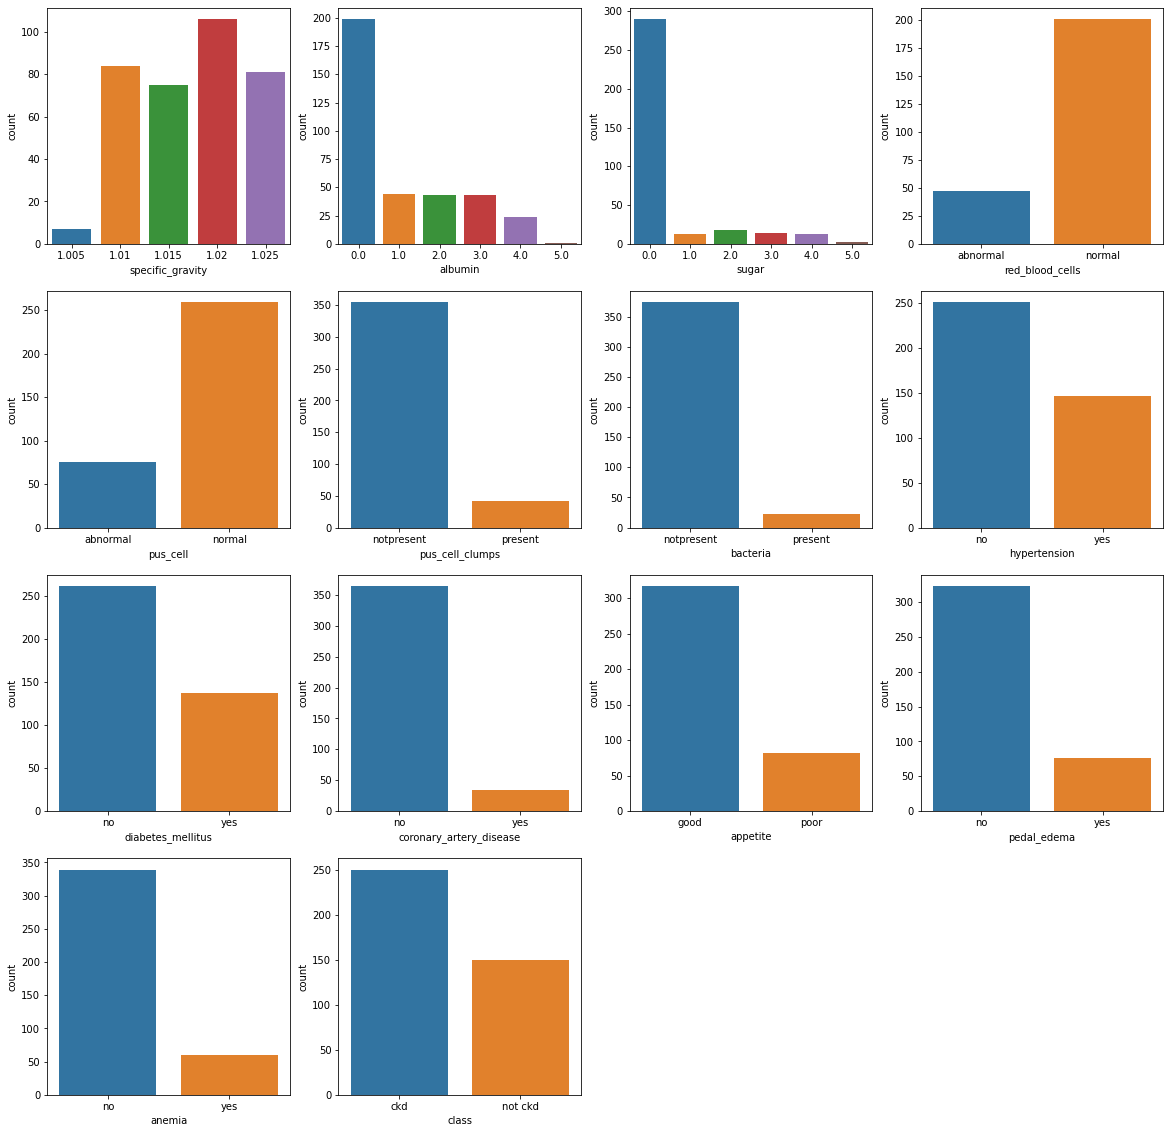

In [36]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(categorical_columns):
    plt.subplot(4,4,i+1)
    sns.countplot(kidney_data_new[feature])

<AxesSubplot:xlabel='class', ylabel='count'>

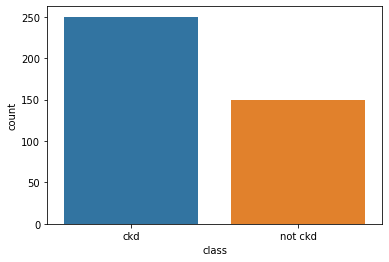

In [35]:
sns.countplot(x = "class", data=kidney_data_new)

## NUMERICAL FEATURES

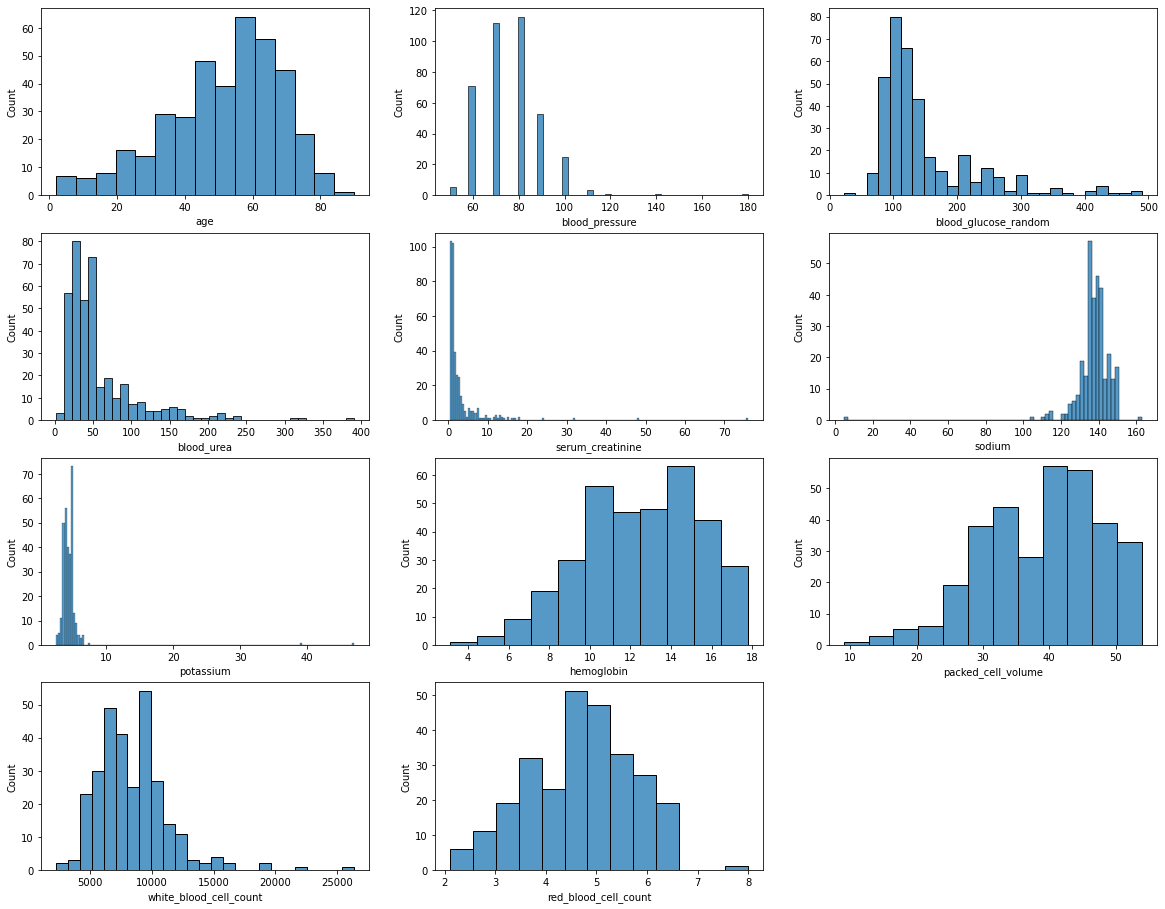

In [37]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(numerical_columns):
    plt.subplot(5,3,i+1)
    sns.histplot(kidney_data_new[feature])

### **Hypertension**

Analysing the hypertension variable

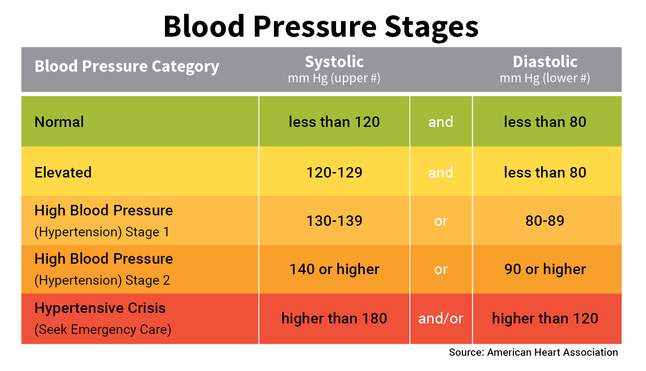

In [38]:
kidney_data_new.groupby(["hypertension", "class"])["age"].count()

hypertension  class  
no            ckd        100
              not ckd    147
yes           ckd        142
              not ckd      0
Name: age, dtype: int64

For patients that have hypertension in the dataset, 100% of them have chronic kidney disease.

<AxesSubplot:xlabel='blood_pressure', ylabel='Count'>

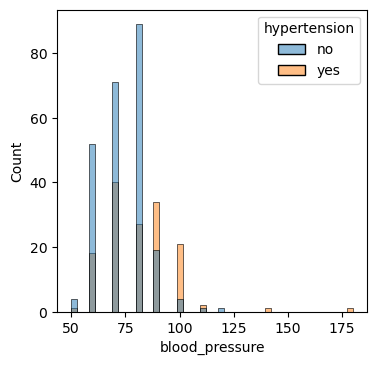

In [40]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="blood_pressure", hue="hypertension")

## Individuals with higher 'blood pressure' values do have hypertension, however, 
## hypertension mostly affects individuals with blood pressure values between 50 - 100

<AxesSubplot:xlabel='age', ylabel='Count'>

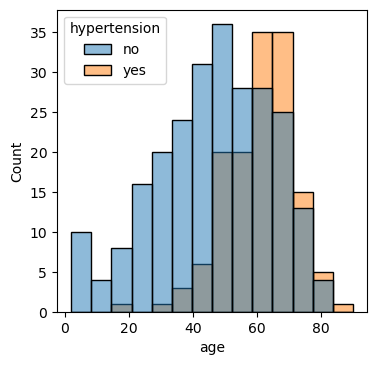

In [42]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="age", hue="hypertension")

## The older population has hypertension in comparison to the younger population. 
## There is one individual below the age of 20 who has hypertension. the rest of the age distribution is from 30 to 90
## Idividuals aged between 55 and 75 are the most with hypertension

<AxesSubplot:xlabel='sodium', ylabel='Count'>

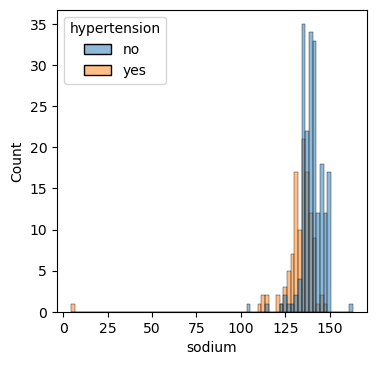

In [51]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="sodium", hue="hypertension")
# consider normalization clipping or outlier removal

<AxesSubplot:xlabel='potassium', ylabel='Count'>

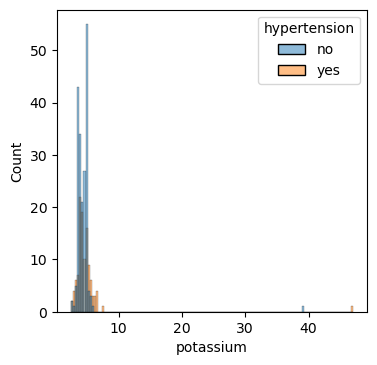

In [53]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="potassium", hue="hypertension")
# consider normalization clipping or outlier removal

### **Anemia**

Analysing the anemia variable

In [46]:
kidney_data_new.groupby(["anemia", "class"])["age"].count()

anemia  class  
no      ckd        185
        not ckd    148
yes     ckd         57
        not ckd      0
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

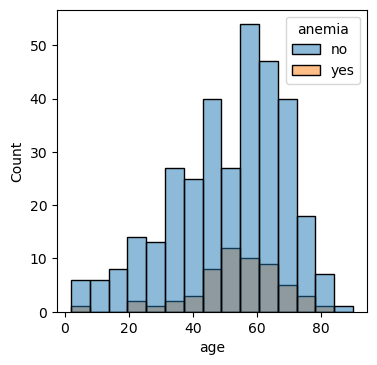

In [47]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="age", hue="anemia")

<AxesSubplot:xlabel='blood_urea', ylabel='Count'>

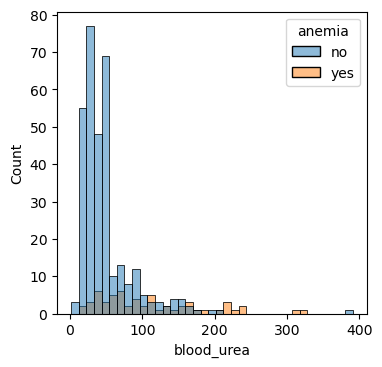

In [49]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="blood_urea", hue="anemia")

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

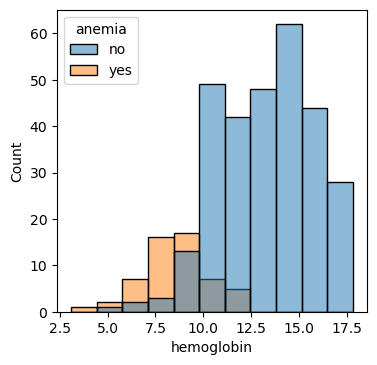

In [52]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="hemoglobin", hue="anemia")

<AxesSubplot:xlabel='red_blood_cell_count', ylabel='Count'>

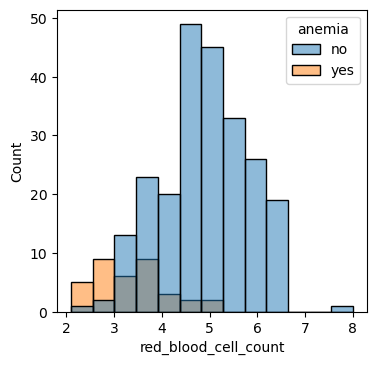

In [54]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="red_blood_cell_count", hue="anemia")

### **Diabetes Mellitus**

Analysing the diabetes variable

In [55]:
kidney_data_new.groupby(["diabetes_mellitus", "class"])["age"].count()

diabetes_mellitus  class  
no                 ckd        109
                   not ckd    147
yes                ckd        133
                   not ckd      0
Name: age, dtype: int64

<AxesSubplot:xlabel='blood_glucose_random', ylabel='Count'>

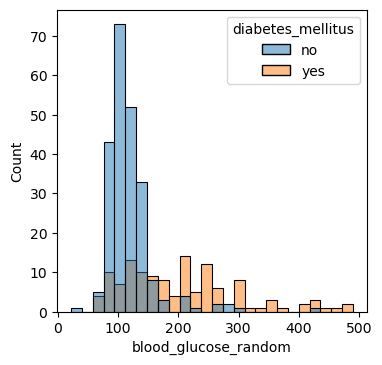

In [56]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="blood_glucose_random", hue="diabetes_mellitus")

Serum creatinine, white blood cells and red blood cells

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

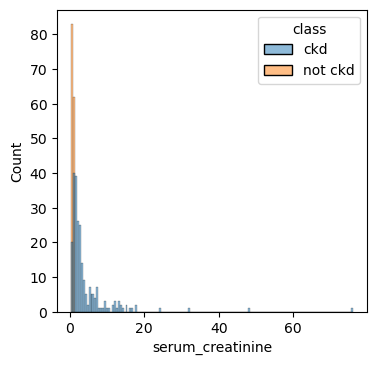

In [60]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="serum_creatinine", hue="class")

<AxesSubplot:xlabel='white_blood_cell_count', ylabel='Count'>

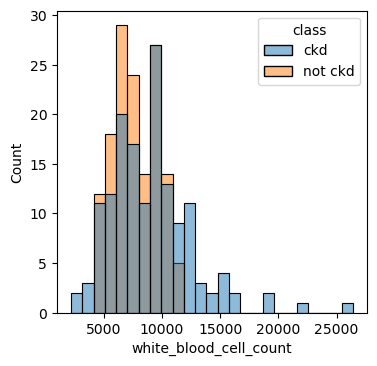

In [61]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="white_blood_cell_count", hue="class")

<AxesSubplot:xlabel='red_blood_cell_count', ylabel='Count'>

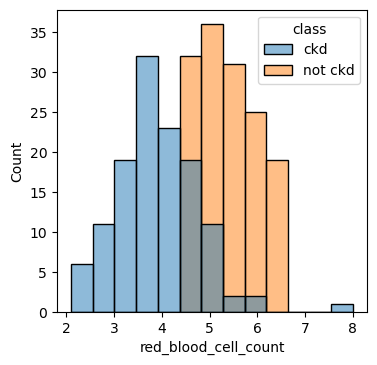

In [62]:
plt.figure(figsize=(4,4), dpi=100);

sns.histplot(data=kidney_data_new, x="red_blood_cell_count", hue="class")

<AxesSubplot:xlabel='age', ylabel='blood_pressure'>

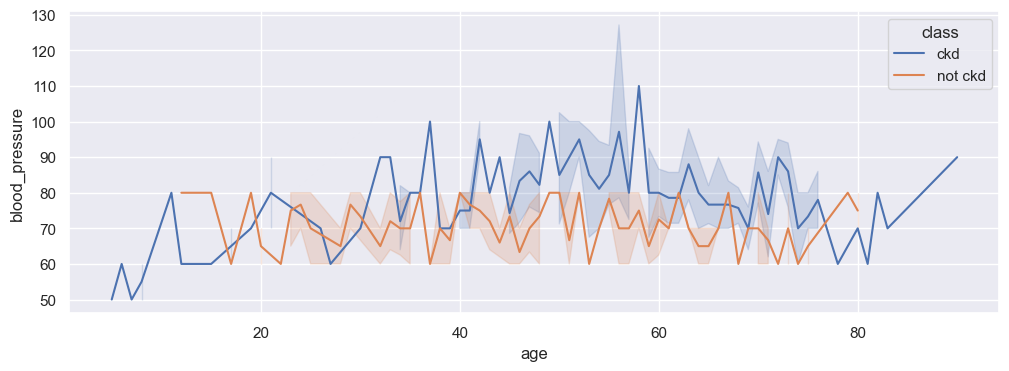

In [40]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=kidney_data_new, x="age", y="blood_pressure", hue="class")
# blood pressure for patients that do not have ckd seems to stay in a certain range of 60 - 80

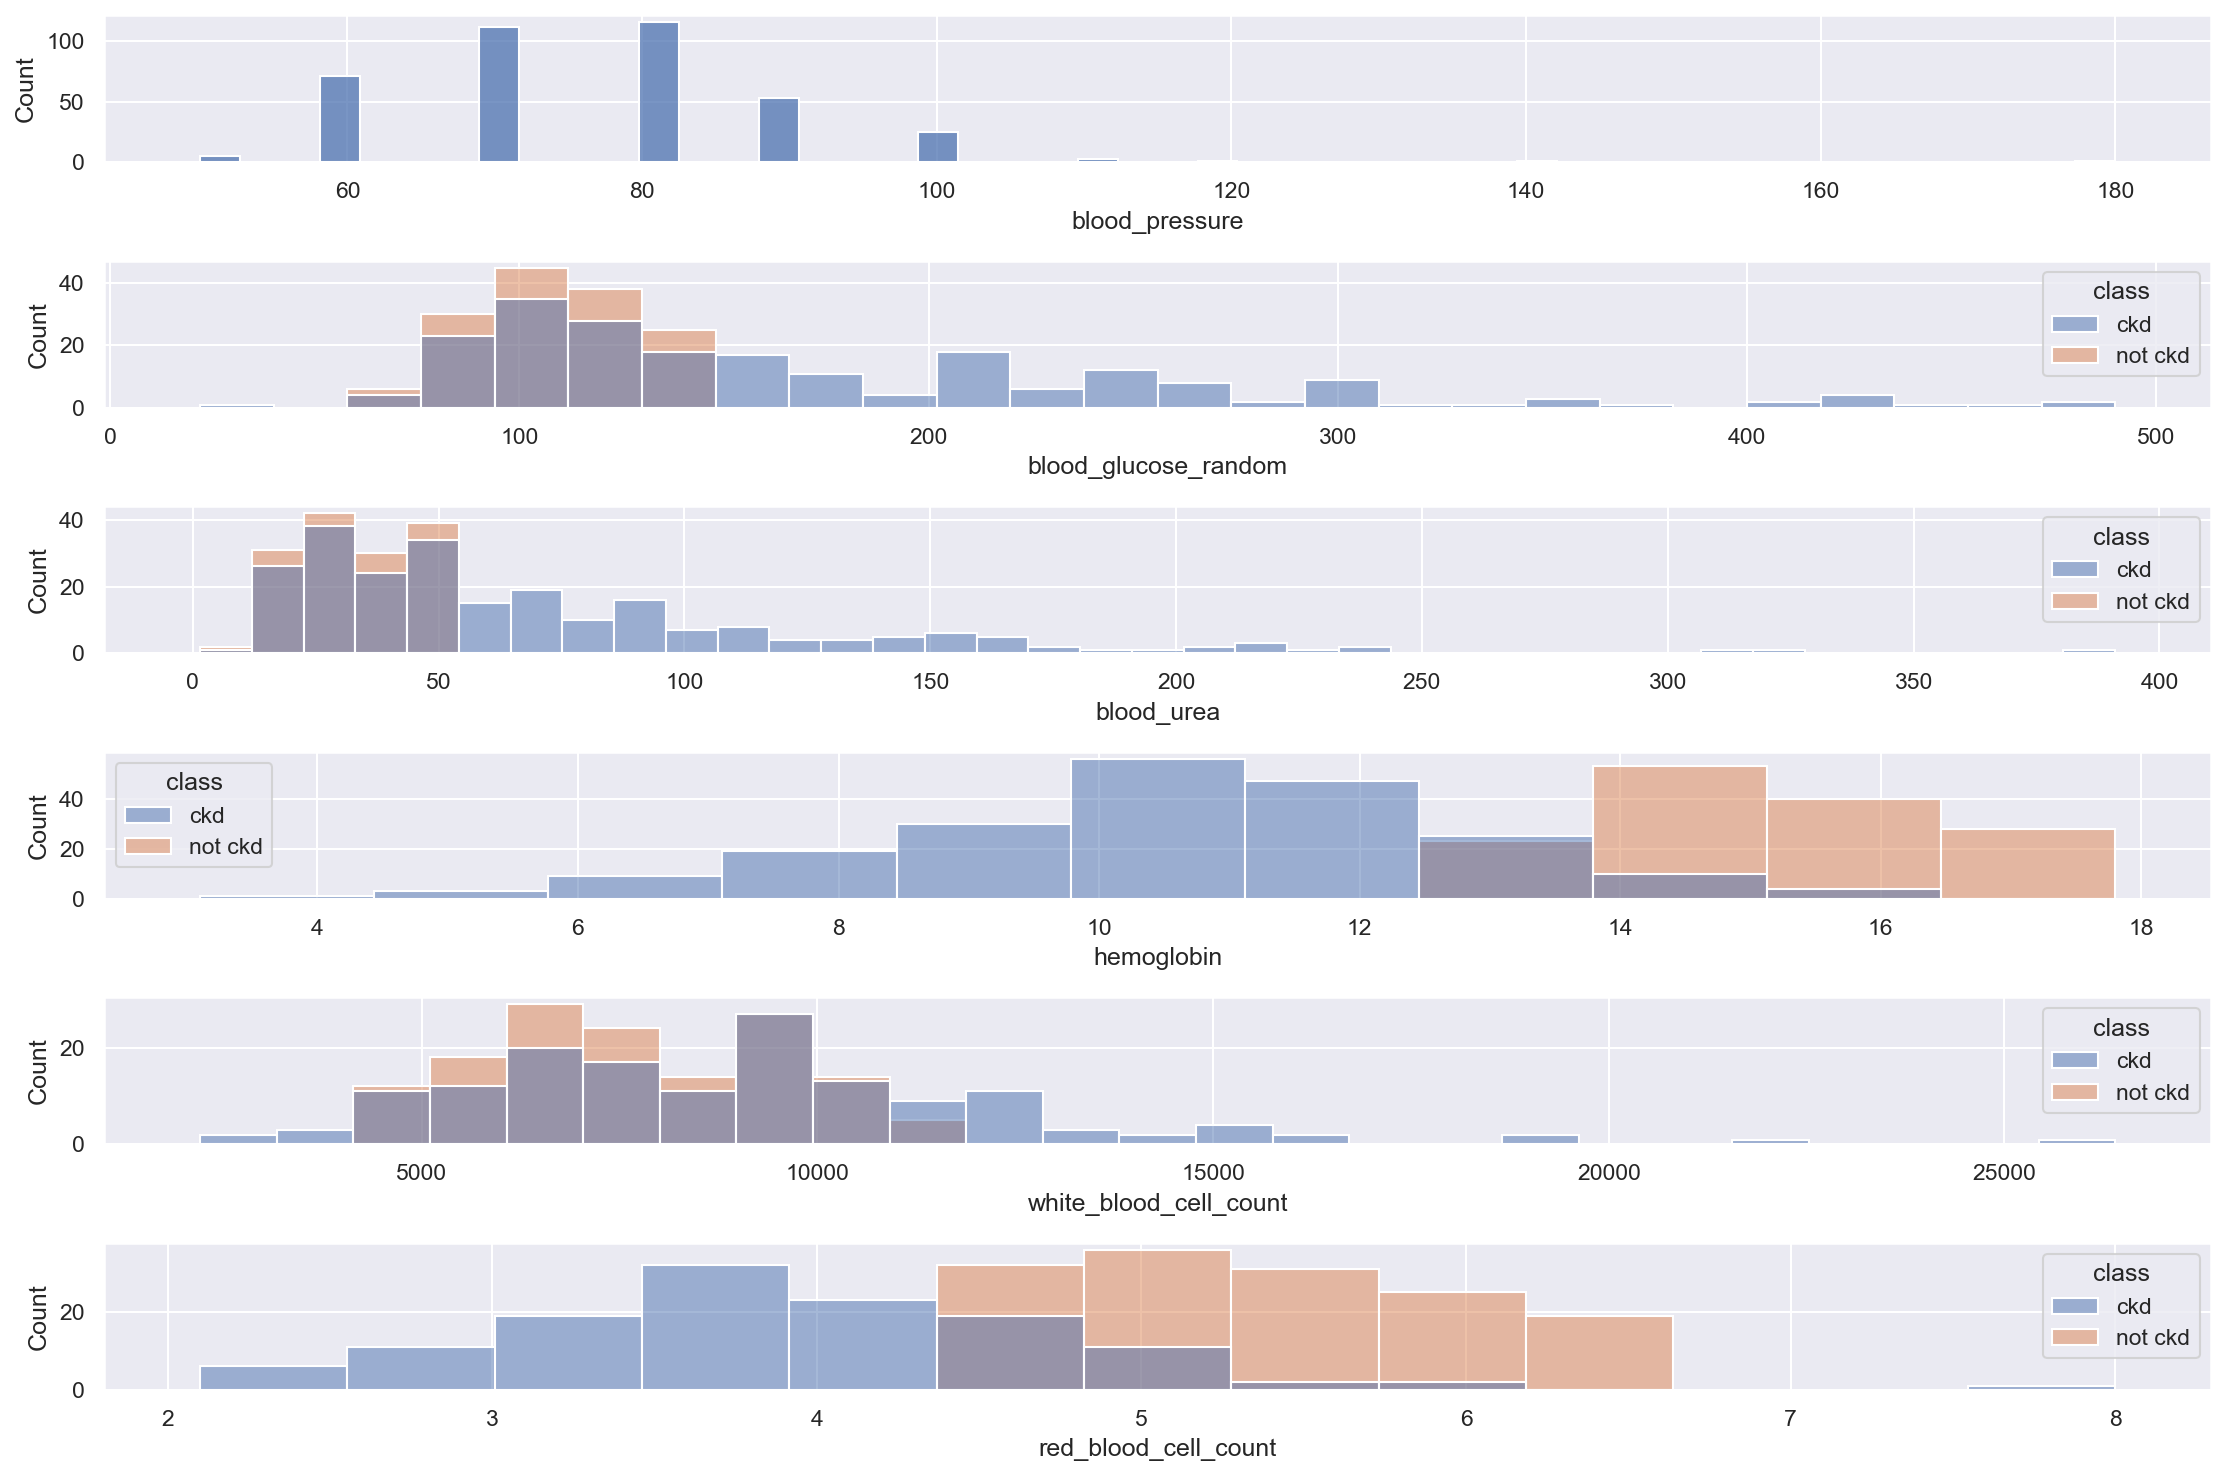

In [41]:
# Effect of seasons, holidays and function day on the bike rentals per hour
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(nrows=6,ncols=1,figsize=(15,10), dpi=150)

sns.histplot(data=kidney_data_new, x="blood_pressure",  ax=axs[0])
sns.histplot(data=kidney_data_new, x="blood_glucose_random", ax=axs[1], 
              hue="class")
sns.histplot(data=kidney_data_new, x="blood_urea", ax=axs[2], 
              hue="class")
sns.histplot(data=kidney_data_new, x="hemoglobin", ax=axs[3], 
              hue="class")
sns.histplot(data=kidney_data_new, x="white_blood_cell_count", ax=axs[4], 
              hue="class")
sns.histplot(data=kidney_data_new, x="red_blood_cell_count", ax=axs[5], 
              hue="class")
plt.tight_layout()

# DATA CLEANING

## Dealing with missing values

Certain features such as red blood cells, red blood cell count, and white blood cell count, have more than 25% in missing features. Other features have varying ranges of missing features. Two types of techniques will be implemented to deal with the dataset and compare the results. The aim is to uphold the data's integrity.

**Method 1:** Delete all missing values and use the resulting dataset.

**Method 2:** Remove the columns with the features that have more than 25% of missing data points, and then remove the rows with missing values from the rest.

**Method 3:** Remove the columns with the features that have more than 25% of missing data points, and imputate the rest.

In [38]:
kidney_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    category
 3   albumin                  354 non-null    category
 4   sugar                    351 non-null    category
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  hemoglobin

In [39]:
kidney_df = kidney_data_new.copy()

In [40]:
kidney_df[numerical_columns].describe().transpose()

count         mean          std     min     25%  \
age                     391.0    51.483376    17.169714     2.0    42.0   
blood_pressure          388.0    76.469072    13.683637    50.0    70.0   
blood_glucose_random    356.0   148.036517    79.281714    22.0    99.0   
blood_urea              381.0    57.425722    50.503006     1.5    27.0   
serum_creatinine        383.0     3.072454     5.741126     0.4     0.9   
sodium                  313.0   137.528754    10.408752     4.5   135.0   
potassium               312.0     4.627244     3.193904     2.5     3.8   
hemoglobin              348.0    12.526437     2.912587     3.1    10.3   
packed_cell_volume      329.0    38.884498     8.990105     9.0    32.0   
white_blood_cell_count  294.0  8406.122449  2944.474190  2200.0  6500.0   
red_blood_cell_count    269.0     4.707435     1.025323     2.1     3.9   

                            50%     75%      max  
age                       55.00    64.5     90.0  
blood_pressure            80.00    80.0    180.0  
blood_glucose_random     121.00   163.0    490.0  
blood_urea                42.00    66.0    391.0  
serum_creatinine           1.30     2.8     76.0  
sodium                   138.00   142.0    163.0  
potassium                  4.40     4.9     47.0  
hemoglobin                12.65    15.0     17.8  
packed_cell_volume        40.00    45.0     54.0  
white_blood_cell_count  8000.00  9800.0  26400.0  
red_blood_cell_count       4.80     5.4      8.0

In [41]:
kidney_df[categorical_columns].describe().transpose()

count unique         top   freq
specific_gravity         353.0    5.0        1.02  106.0
albumin                  354.0    6.0         0.0  199.0
sugar                    351.0    6.0         0.0  290.0
red_blood_cells            248      2      normal    201
pus_cell                   335      2      normal    259
pus_cell_clumps            396      2  notpresent    354
bacteria                   396      2  notpresent    374
hypertension               398      2          no    251
diabetes_mellitus          398      2          no    261
coronary_artery_disease    398      2          no    364
appetite                   399      2        good    317
pedal_edema                399      2          no    323
anemia                     399      2          no    339
class                      400      2         ckd    250

In [42]:
print(kidney_df['red_blood_cells'].unique())

[NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal']


### METHOD 1: Delete all missing values

In [43]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    category
 3   albumin                  354 non-null    category
 4   sugar                    351 non-null    category
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  hemoglobin

In [44]:
kidney_df1 = kidney_df.copy()

In [45]:
kidney_df1 = kidney_df1.dropna(axis = 0)
print(f"Before dropping all NaN values: {kidney_df.shape}")
print(f"After dropping all NaN values: {kidney_df1.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [46]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      158 non-null    float64 
 1   blood_pressure           158 non-null    float64 
 2   specific_gravity         158 non-null    category
 3   albumin                  158 non-null    category
 4   sugar                    158 non-null    category
 5   red_blood_cells          158 non-null    category
 6   pus_cell                 158 non-null    category
 7   pus_cell_clumps          158 non-null    category
 8   bacteria                 158 non-null    category
 9   blood_glucose_random     158 non-null    float64 
 10  blood_urea               158 non-null    float64 
 11  serum_creatinine         158 non-null    float64 
 12  sodium                   158 non-null    float64 
 13  potassium                158 non-null    float64 
 14  hemoglobin

In [47]:
kidney_df1[categorical_columns].describe().transpose()

count unique         top   freq
specific_gravity         158.0    5.0        1.02   61.0
albumin                  158.0    5.0         0.0  116.0
sugar                    158.0    6.0         0.0  140.0
red_blood_cells            158      2      normal    140
pus_cell                   158      2      normal    129
pus_cell_clumps            158      2  notpresent    144
bacteria                   158      2  notpresent    146
hypertension               158      2          no    124
diabetes_mellitus          158      2          no    130
coronary_artery_disease    158      2          no    147
appetite                   158      2        good    139
pedal_edema                158      2          no    138
anemia                     158      2          no    142
class                      158      2     not ckd    115

In [48]:
kidney_df1[numerical_columns].describe().transpose()

count         mean          std     min      25%  \
age                     158.0    49.563291    15.512244     6.0    39.25   
blood_pressure          158.0    74.050633    11.175381    50.0    60.00   
blood_glucose_random    158.0   131.341772    64.939832    70.0    97.00   
blood_urea              158.0    52.575949    47.395382    10.0    26.00   
serum_creatinine        158.0     2.188608     3.077615     0.4     0.70   
sodium                  158.0   138.848101     7.489421   111.0   135.00   
potassium               158.0     4.636709     3.476351     2.5     3.70   
hemoglobin              158.0    13.687342     2.882204     3.1    12.60   
packed_cell_volume      158.0    41.917722     9.105164     9.0    37.50   
white_blood_cell_count  158.0  8475.949367  3126.880181  3800.0  6525.00   
red_blood_cell_count    158.0     4.891772     1.019364     2.1     4.50   

                            50%       75%      max  
age                       50.50    60.000     83.0  
blood_pressure            80.00    80.000    110.0  
blood_glucose_random     115.50   131.750    490.0  
blood_urea                39.50    49.750    309.0  
serum_creatinine           1.10     1.600     15.2  
sodium                   139.00   144.000    150.0  
potassium                  4.50     4.900     47.0  
hemoglobin                14.25    15.775     17.8  
packed_cell_volume        44.00    48.000     54.0  
white_blood_cell_count  7800.00  9775.000  26400.0  
red_blood_cell_count       4.95     5.600      8.0

### Exploration of Outliers for Method 1

                                     Features Distribution                                      


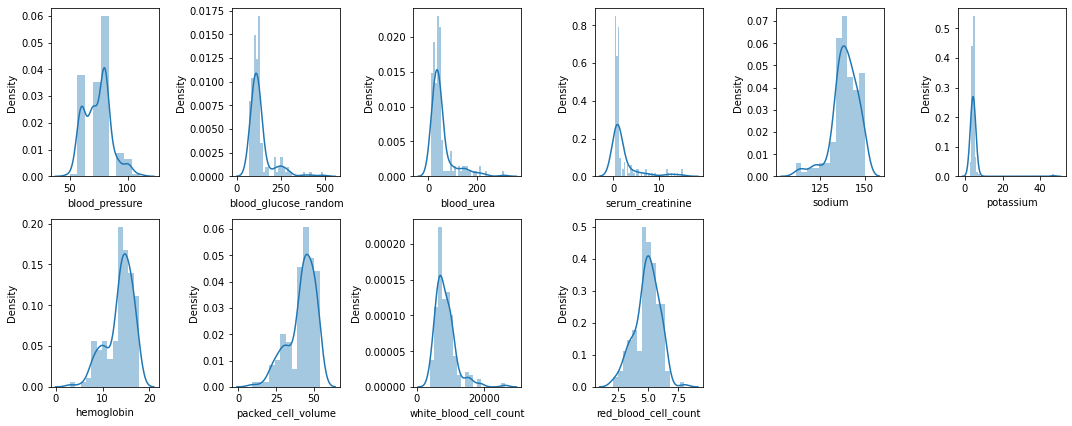

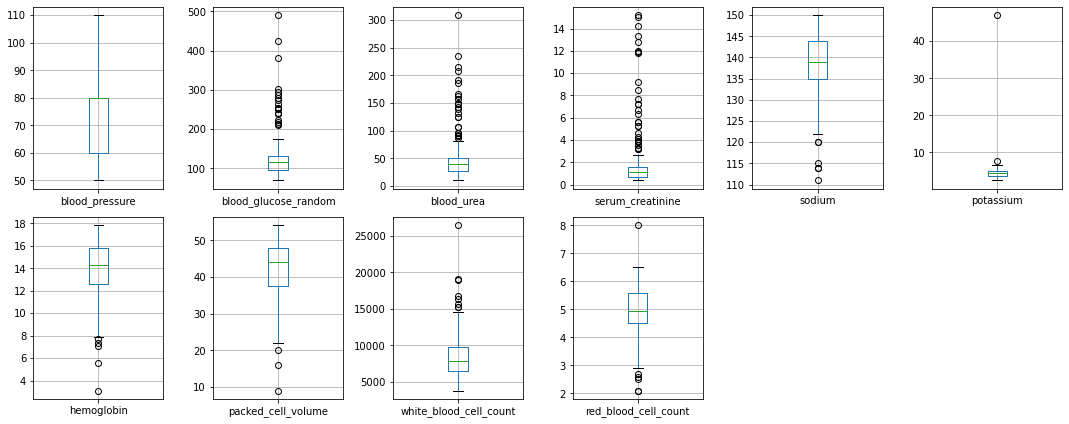

In [111]:
# Visualize the distribution of the data to observe present outliers, skew distributions and noise
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

#numerical_features1 = kidney_df1a[['age', 'blood_pressure', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
             # 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']]
    
numerical_features1 = kidney_df1[numerical_columns]

#numerical_features = pd.DataFrame(data = numerical_features, columns = numerical_features.columns)

n=6
features = [i for i in numerical_features1.columns.values[1:32]]
nf = [i for i in features]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(numerical_features1[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    numerical_features1.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [97]:
# seed the random number generator
seed(1)
# calculate interquartile range
age_q25, age_q75 = percentile(numerical_features1['age'], 25), percentile(numerical_features1['age'], 75)
age_iqr = age_q75 - age_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (age_q25, age_q75, age_iqr))
# calculate the outlier cutoff
cut_off = age_iqr * 1.5
lower, upper = age_q25 - cut_off, age_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['age'] if x < lower or x > upper]
print('Identified outliers in age: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['age'] if x >= lower and x <= upper]
print('Non-outlier observations in age: %d' % len(outliers_removed))

Percentiles: 25th=39.250, 75th=60.000, IQR=20.750
Identified outliers in age: 1
Non-outlier observations in age: 157


In [98]:
# seed the random number generator
seed(1)
# calculate interquartile range
bp_q25, bp_q75 = percentile(numerical_features1['blood_pressure'], 25), percentile(numerical_features1['blood_pressure'], 75)
bp_iqr = bp_q75 - bp_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (bp_q25, bp_q75, bp_iqr))
# calculate the outlier cutoff
cut_off = bp_iqr * 1.5
lower, upper = bp_q25 - cut_off, bp_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['blood_pressure'] if x < lower or x > upper]
print('Identified outliers in blood_pressure: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['blood_pressure'] if x >= lower and x <= upper]
print('Non-outlier observations in blood_pressure: %d' % len(outliers_removed))

Percentiles: 25th=60.000, 75th=80.000, IQR=20.000
Identified outliers in blood_pressure: 0
Non-outlier observations in blood_pressure: 158


In [101]:
# seed the random number generator
seed(1)
# calculate interquartile range
bgr_q25, bgr_q75 = percentile(numerical_features1['blood_glucose_random'], 25), percentile(numerical_features1['blood_glucose_random'], 75)
bgr_iqr = bgr_q75 - bgr_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (bgr_q25, bgr_q75, bgr_iqr))
# calculate the outlier cutoff
cut_off = bgr_iqr * 1.5
lower, upper = bgr_q25 - cut_off, bgr_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['blood_glucose_random'] if x < lower or x > upper]
print('Identified outliers in blood_glucose_random: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['blood_glucose_random'] if x >= lower and x <= upper]
print('Non-outlier observations in blood_glucose_random: %d' % len(outliers_removed))

Percentiles: 25th=97.000, 75th=131.750, IQR=34.750
Identified outliers in blood_glucose_random: 20
Non-outlier observations in blood_glucose_random: 138


In [102]:
# seed the random number generator
seed(1)
# calculate interquartile range
bu_q25, bu_q75 = percentile(numerical_features1['blood_urea'], 25), percentile(numerical_features1['blood_urea'], 75)
bu_iqr = bu_q75 - bu_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (bu_q25, bu_q75, bu_iqr))
# calculate the outlier cutoff
cut_off = bu_iqr * 1.5
lower, upper = bu_q25 - cut_off, bu_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['blood_urea'] if x < lower or x > upper]
print('Identified outliers in blood_urea: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['blood_urea'] if x >= lower and x <= upper]
print('Non-outlier observations in blood_urea: %d' % len(outliers_removed))

Percentiles: 25th=26.000, 75th=49.750, IQR=23.750
Identified outliers in blood_urea: 24
Non-outlier observations in blood_urea: 134


In [103]:
# seed the random number generator
seed(1)
# calculate interquartile range
sec_q25, sec_q75 = percentile(numerical_features1['serum_creatinine'], 25), percentile(numerical_features1['serum_creatinine'], 75)
sec_iqr = sec_q75 - sec_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (sec_q25, sec_q75, sec_iqr))
# calculate the outlier cutoff
cut_off = sec_iqr * 1.5
lower, upper = sec_q25 - cut_off, sec_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['serum_creatinine'] if x < lower or x > upper]
print('Identified outliers in serum_creatinine: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['serum_creatinine'] if x >= lower and x <= upper]
print('Non-outlier observations in serum_creatinine: %d' % len(outliers_removed))

Percentiles: 25th=0.700, 75th=1.600, IQR=0.900
Identified outliers in serum_creatinine: 29
Non-outlier observations in serum_creatinine: 129


In [104]:
# seed the random number generator
seed(1)
# calculate interquartile range
sod_q25, sod_q75 = percentile(numerical_features1['sodium'], 25), percentile(numerical_features1['sodium'], 75)
sod_iqr = sod_q75 - sod_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (sod_q25, sod_q75, sod_iqr))
# calculate the outlier cutoff
cut_off = sod_iqr * 1.5
lower, upper = sod_q25 - cut_off, sod_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['sodium'] if x < lower or x > upper]
print('Identified outliers in sodium: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['sodium'] if x >= lower and x <= upper]
print('Non-outlier observations in sodium: %d' % len(outliers_removed))

Percentiles: 25th=135.000, 75th=144.000, IQR=9.000
Identified outliers in sodium: 6
Non-outlier observations in sodium: 152


In [105]:
# seed the random number generator
seed(1)
# calculate interquartile range
pot_q25, pot_q75 = percentile(numerical_features1['potassium'], 25), percentile(numerical_features1['potassium'], 75)
pot_iqr = pot_q75 - pot_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (pot_q25, pot_q75, pot_iqr))
# calculate the outlier cutoff
cut_off = pot_iqr * 1.5
lower, upper = pot_q25 - cut_off, pot_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['potassium'] if x < lower or x > upper]
print('Identified outliers in potassium: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['potassium'] if x >= lower and x <= upper]
print('Non-outlier observations in potassium: %d' % len(outliers_removed))

Percentiles: 25th=3.700, 75th=4.900, IQR=1.200
Identified outliers in potassium: 2
Non-outlier observations in potassium: 156


In [106]:
# seed the random number generator
seed(1)
# calculate interquartile range
hem_q25, hem_q75 = percentile(numerical_features1['hemoglobin'], 25), percentile(numerical_features1['hemoglobin'], 75)
hem_iqr = hem_q75 - hem_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (hem_q25, hem_q75, hem_iqr))
# calculate the outlier cutoff
cut_off = hem_iqr * 1.5
lower, upper = hem_q25 - cut_off, hem_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['hemoglobin'] if x < lower or x > upper]
print('Identified outliers in hemoglobin: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['hemoglobin'] if x >= lower and x <= upper]
print('Non-outlier observations in hemoglobin: %d' % len(outliers_removed))

Percentiles: 25th=12.600, 75th=15.775, IQR=3.175
Identified outliers in hemoglobin: 5
Non-outlier observations in hemoglobin: 153


In [107]:
# seed the random number generator
seed(1)
# calculate interquartile range
pcv_q25, pcv_q75 = percentile(numerical_features1['packed_cell_volume'], 25), percentile(numerical_features1['packed_cell_volume'], 75)
pcv_iqr = pcv_q75 - pcv_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (pcv_q25, pcv_q75, pcv_iqr))
# calculate the outlier cutoff
cut_off = pcv_iqr * 1.5
lower, upper = pcv_q25 - cut_off, pcv_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['packed_cell_volume'] if x < lower or x > upper]
print('Identified outliers in packed_cell_volume: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['packed_cell_volume'] if x >= lower and x <= upper]
print('Non-outlier observations in packed_cell_volume: %d' % len(outliers_removed))

Percentiles: 25th=37.500, 75th=48.000, IQR=10.500
Identified outliers in packed_cell_volume: 3
Non-outlier observations in packed_cell_volume: 155


In [108]:
# seed the random number generator
seed(1)
# calculate interquartile range
wbc_q25, wbc_q75 = percentile(numerical_features1['white_blood_cell_count'], 25), percentile(numerical_features1['white_blood_cell_count'], 75)
wbc_iqr = wbc_q75 - wbc_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (wbc_q25, wbc_q75, wbc_iqr))
# calculate the outlier cutoff
cut_off = wbc_iqr * 1.5
lower, upper = wbc_q25 - cut_off, wbc_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['white_blood_cell_count'] if x < lower or x > upper]
print('Identified outliers in white_blood_cell_count: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['white_blood_cell_count'] if x >= lower and x <= upper]
print('Non-outlier observations in white_blood_cell_count: %d' % len(outliers_removed))

Percentiles: 25th=6525.000, 75th=9775.000, IQR=3250.000
Identified outliers in white_blood_cell_count: 8
Non-outlier observations in white_blood_cell_count: 150


In [109]:
# seed the random number generator
seed(1)
# calculate interquartile range
rbc_q25, rbc_q75 = percentile(numerical_features1['red_blood_cell_count'], 25), percentile(numerical_features1['red_blood_cell_count'], 75)
rbc_iqr = rbc_q75 - rbc_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (rbc_q25, rbc_q75, rbc_iqr))
# calculate the outlier cutoff
cut_off = rbc_iqr * 1.5
lower, upper = rbc_q25 - cut_off, rbc_q75 + cut_off
# identify outliers
outliers = [x for x in numerical_features1['red_blood_cell_count'] if x < lower or x > upper]
print('Identified outliers in red_blood_cell_count: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in numerical_features1['red_blood_cell_count'] if x >= lower and x <= upper]
print('Non-outlier observations in red_blood_cell_count: %d' % len(outliers_removed))

Percentiles: 25th=4.500, 75th=5.600, IQR=1.100
Identified outliers in red_blood_cell_count: 6
Non-outlier observations in red_blood_cell_count: 152


### **Outliers: To keep or not to keep?**

Perhaps, the outliers can stay because they may be valid outliers. Higher or lower values of any numerical feature that goes beyond the normal values indicates a health issue which would assist in the detection of CKD.

However, removing outliers and analysing the results is worth a try.

Thus 3 versions of the baseline dataset;

- Baseline 1: Outliers kept
- Baseline 2: Outliers kept, removed after split on the training set
- Baseline 3: Outliers removed

Age variable remains with its outliers

In [147]:
kidney_df1a = kidney_df1.copy()
kidney_df1b = kidney_df1.copy()
kidney_df1c = kidney_df1.copy()

In [148]:
# split the descriptive features from the target feature

# Baseline 1: Outliers kept
dfa_x = kidney_df1a.drop(['class'], axis=1)
dfa_y = kidney_df1a['class']

# Baseline 2: Outliers kept, removed after split on the training set
dfb_x = kidney_df1b.drop(['class'], axis=1)
dfb_y = kidney_df1b['class']

# Baseline 3: Outliers removed
dfc_x = kidney_df1c.drop(['class'], axis=1)
dfc_y = kidney_df1c['class']

In [149]:
# Remove outliers from the variable blood_pressure
dfc_x = dfc_x.query('blood_pressure>= (@bp_q25 - @bp_iqr) & blood_pressure <= (@bp_q75 + @bp_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable blood_glucose_random
dfc_x = dfc_x.query('blood_glucose_random>= (@bgr_q25 - @bgr_iqr) & blood_glucose_random <= (@bgr_q75 + @bgr_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable blood_urea
dfc_x = dfc_x.query('blood_urea>= (@bu_q25 - @bu_iqr) & blood_urea <= (@bu_q75 + @bu_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable serum_creatinine
dfc_x = dfc_x.query('serum_creatinine>= (@sec_q25 - @sec_iqr) & serum_creatinine <= (@sec_q75 + @sec_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable sodium
dfc_x = dfc_x.query('sodium>= (@sod_q25 - @sod_iqr) & sodium <= (@sod_q75 + @sod_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable potassium
dfc_x = dfc_x.query('potassium>= (@pot_q25 - @pot_iqr) & potassium <= (@pot_q75 + @pot_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable hemoglobin
dfc_x = dfc_x.query('hemoglobin>= (@hem_q25 - @hem_iqr) & hemoglobin <= (@hem_q75 + @hem_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable packed_cell_volume
dfc_x = dfc_x.query('packed_cell_volume>= (@pcv_q25 - @pcv_iqr) & packed_cell_volume <= (@pcv_q75 + @pcv_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable white_blood_cell_count
dfc_x = dfc_x.query('white_blood_cell_count>= (@wbc_q25 - @wbc_iqr) & white_blood_cell_count<= (@wbc_q75 + @wbc_iqr) ')
dfc_y = dfc_y[dfc_x.index]

# Remove outliers from the variable red_blood_cell_count
dfc_x = dfc_x.query('red_blood_cell_count>= (@rbc_q25 - @rbc_iqr) & red_blood_cell_count<= (@rbc_q75 + @rbc_iqr) ')
dfc_y = dfc_y[dfc_x.index]


In [150]:
dfc_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 144 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      117 non-null    float64 
 1   blood_pressure           117 non-null    float64 
 2   specific_gravity         117 non-null    category
 3   albumin                  117 non-null    category
 4   sugar                    117 non-null    category
 5   red_blood_cells          117 non-null    category
 6   pus_cell                 117 non-null    category
 7   pus_cell_clumps          117 non-null    category
 8   bacteria                 117 non-null    category
 9   blood_glucose_random     117 non-null    float64 
 10  blood_urea               117 non-null    float64 
 11  serum_creatinine         117 non-null    float64 
 12  sodium                   117 non-null    float64 
 13  potassium                117 non-null    float64 
 14  hemoglob

                        Features Distribution after removal of Outliers                         


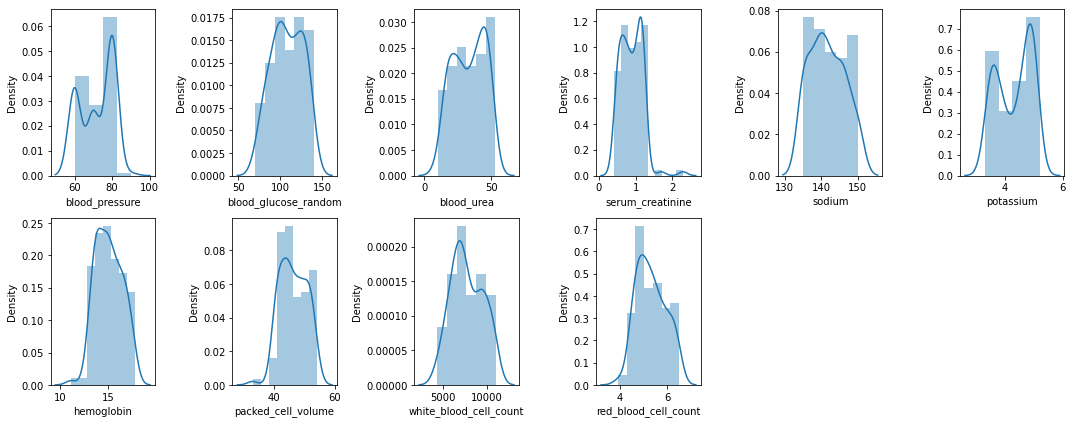

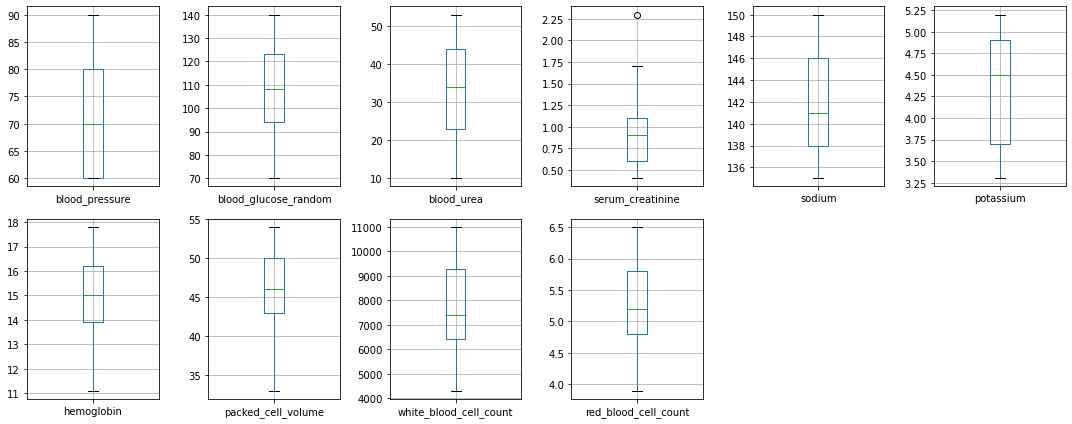

In [151]:
# Visualize the distribution of the data to observe present outliers, skew distributions and noise
#Understanding the feature set

print('\033[1mFeatures Distribution after removal of Outliers'.center(100))

#numerical_features1 = kidney_df1a[['age', 'blood_pressure', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
             # 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']]
    
nums = dfc_x[numerical_columns]

#numerical_features = pd.DataFrame(data = numerical_features, columns = numerical_features.columns)

n=6
features = [i for i in nums.columns.values[1:32]]
nf = [i for i in features]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(nums[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    nums.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [152]:
dfc_x["class"] = dfc_y

kidney_df1c = dfc_x.copy()

kidney_df1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 144 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      117 non-null    float64 
 1   blood_pressure           117 non-null    float64 
 2   specific_gravity         117 non-null    category
 3   albumin                  117 non-null    category
 4   sugar                    117 non-null    category
 5   red_blood_cells          117 non-null    category
 6   pus_cell                 117 non-null    category
 7   pus_cell_clumps          117 non-null    category
 8   bacteria                 117 non-null    category
 9   blood_glucose_random     117 non-null    float64 
 10  blood_urea               117 non-null    float64 
 11  serum_creatinine         117 non-null    float64 
 12  sodium                   117 non-null    float64 
 13  potassium                117 non-null    float64 
 14  hemoglob

In [161]:
# summarize class distribution
print("Class distribution after outlier removal: ",Counter(dfc_y))

Class distribution after outlier removal:  Counter({0: 115, 1: 2})


This then proves that outliers are valid and thus must not be removed.

### Method 1 Data: All missing values removed.

In [49]:
kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      158 non-null    float64 
 1   blood_pressure           158 non-null    float64 
 2   specific_gravity         158 non-null    category
 3   albumin                  158 non-null    category
 4   sugar                    158 non-null    category
 5   red_blood_cells          158 non-null    category
 6   pus_cell                 158 non-null    category
 7   pus_cell_clumps          158 non-null    category
 8   bacteria                 158 non-null    category
 9   blood_glucose_random     158 non-null    float64 
 10  blood_urea               158 non-null    float64 
 11  serum_creatinine         158 non-null    float64 
 12  sodium                   158 non-null    float64 
 13  potassium                158 non-null    float64 
 14  hemoglobin

### METHOD 2: Remove columns with 25% missing values, and remove rows with missing values from the rest

In [50]:
kidney_df2 = kidney_df.copy()

In [51]:
kidney_df2 = kidney_df2.drop(['red_blood_cells'], axis=1) # 38% missing values
kidney_df2 = kidney_df2.drop(['red_blood_cell_count'], axis=1) # 26.5% missing values 
kidney_df2 = kidney_df2.drop(['white_blood_cell_count'], axis=1) # 32.75% missing values

In [52]:
kidney_df2 = kidney_df2.dropna(axis = 0)
print(f"Before dropping all NaN values: {kidney_df.shape}")
print(f"After dropping all NaN values: {kidney_df2.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (209, 22)


In [53]:
cate_columns,nume_columns=extract_cat_num(kidney_df2)

In [54]:
kidney_df2[nume_columns].describe().transpose()

count        mean        std    min    25%    50%  \
age                   209.0   51.043062  15.949833    6.0   41.0   54.0   
blood_pressure        209.0   75.167464  11.481410   50.0   70.0   80.0   
blood_glucose_random  209.0  140.291866  76.409990   22.0   97.0  118.0   
blood_urea            209.0   53.672249  45.176779    1.5   26.0   41.0   
serum_creatinine      209.0    2.517703   3.479282    0.4    0.8    1.2   
sodium                209.0  138.387560   7.203634  104.0  135.0  139.0   
potassium             209.0    4.562201   3.041564    2.5    3.8    4.4   
hemoglobin            209.0   13.122488   2.836019    3.1   10.9   13.6   
packed_cell_volume    209.0   40.196172   8.970292    9.0   33.0   42.0   

                        75%    max  
age                    63.0   90.0  
blood_pressure         80.0  110.0  
blood_glucose_random  139.0  490.0  
blood_urea             54.0  309.0  
serum_creatinine        2.4   24.0  
sodium                142.0  150.0  
potassium               4.9   47.0  
hemoglobin             15.2   17.8  
packed_cell_volume     48.0   54.0

In [55]:
kidney_df2[cate_columns].describe().transpose()

count unique         top   freq
specific_gravity         209.0    5.0        1.02   68.0
albumin                  209.0    5.0         0.0  139.0
sugar                    209.0    6.0         0.0  177.0
pus_cell                   209      2      normal    170
pus_cell_clumps            209      2  notpresent    187
bacteria                   209      2  notpresent    196
hypertension               209      2          no    145
diabetes_mellitus          209      2          no    153
coronary_artery_disease    209      2          no    192
appetite                   209      2        good    177
pedal_edema                209      2          no    178
anemia                     209      2          no    184
class                      209      2     not ckd    118

### METHOD 3: Remove columns with 25% missing values and imputate the rest

In [56]:
kidney_df3 = kidney_df.copy()

In [57]:
kidney_df3 = kidney_df3.drop(['red_blood_cells'], axis=1) # 38% missing values
kidney_df3 = kidney_df3.drop(['red_blood_cell_count'], axis=1) # 26.5% missing values 
kidney_df3 = kidney_df3.drop(['white_blood_cell_count'], axis=1) # 32.75% missing values

In [58]:
def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_col, numerical_col = extract_cat_num(kidney_data)

In [59]:
kidney_df3[nume_columns].describe().transpose()

count        mean        std   min    25%     50%  \
age                   391.0   51.483376  17.169714   2.0   42.0   55.00   
blood_pressure        388.0   76.469072  13.683637  50.0   70.0   80.00   
blood_glucose_random  356.0  148.036517  79.281714  22.0   99.0  121.00   
blood_urea            381.0   57.425722  50.503006   1.5   27.0   42.00   
serum_creatinine      383.0    3.072454   5.741126   0.4    0.9    1.30   
sodium                313.0  137.528754  10.408752   4.5  135.0  138.00   
potassium             312.0    4.627244   3.193904   2.5    3.8    4.40   
hemoglobin            348.0   12.526437   2.912587   3.1   10.3   12.65   
packed_cell_volume    329.0   38.884498   8.990105   9.0   32.0   40.00   

                        75%    max  
age                    64.5   90.0  
blood_pressure         80.0  180.0  
blood_glucose_random  163.0  490.0  
blood_urea             66.0  391.0  
serum_creatinine        2.8   76.0  
sodium                142.0  163.0  
potassium               4.9   47.0  
hemoglobin             15.0   17.8  
packed_cell_volume     45.0   54.0

In [60]:
kidney_df3[cate_columns].describe().transpose()

count unique         top   freq
specific_gravity         353.0    5.0        1.02  106.0
albumin                  354.0    6.0         0.0  199.0
sugar                    351.0    6.0         0.0  290.0
pus_cell                   335      2      normal    259
pus_cell_clumps            396      2  notpresent    354
bacteria                   396      2  notpresent    374
hypertension               398      2          no    251
diabetes_mellitus          398      2          no    261
coronary_artery_disease    398      2          no    364
appetite                   399      2        good    317
pedal_edema                399      2          no    323
anemia                     399      2          no    339
class                      400      2         ckd    250

In [61]:
# Imputation with the median because of the presence of outliers in the data
# Using median to impute the missing values for numeric features

for i in nume_columns:
 kidney_df3.loc[kidney_df3.loc[:,i].isnull(),i]=kidney_df3.loc[:,i].median()
 
print("Count of NULL values after imputation\n")
kidney_df3.isnull().sum()

Count of NULL values after imputation



age                         0
blood_pressure              0
specific_gravity           47
albumin                    46
sugar                      49
pus_cell                   65
pus_cell_clumps             4
bacteria                    4
blood_glucose_random        0
blood_urea                  0
serum_creatinine            0
sodium                      0
potassium                   0
hemoglobin                  0
packed_cell_volume          0
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
pedal_edema                 1
anemia                      1
class                       0
dtype: int64

In [62]:
# Using mode to impute the missing values for categorical features
def imputate_cat(kidney):
    for column in kidney:
        
        kidney[column] = kidney[column].fillna(kidney[column].mode()[0])
    
    return kidney

In [63]:
kidney_df3 = imputate_cat(kidney_df3)
print("Count of NULL values after imputation\n")
kidney_df3.isnull().sum()

Count of NULL values after imputation



age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [64]:
kidney_df3[cate_columns].describe().transpose()

count unique         top   freq
specific_gravity         400.0    5.0        1.02  153.0
albumin                  400.0    6.0         0.0  245.0
sugar                    400.0    6.0         0.0  339.0
pus_cell                   400      2      normal    324
pus_cell_clumps            400      2  notpresent    358
bacteria                   400      2  notpresent    378
hypertension               400      2          no    253
diabetes_mellitus          400      2          no    263
coronary_artery_disease    400      2          no    366
appetite                   400      2        good    318
pedal_edema                400      2          no    324
anemia                     400      2          no    340
class                      400      2         ckd    250

In [65]:
kidney_df3[nume_columns].describe().transpose()

count        mean        std   min      25%     50%  \
age                   400.0   51.562500  16.982996   2.0   42.000   55.00   
blood_pressure        400.0   76.575000  13.489785  50.0   70.000   80.00   
blood_glucose_random  400.0  145.062500  75.260774  22.0  101.000  121.00   
blood_urea            400.0   56.693000  49.395258   1.5   27.000   42.00   
serum_creatinine      400.0    2.997125   5.628886   0.4    0.900    1.30   
sodium                400.0  137.631250   9.206332   4.5  135.000  138.00   
potassium             400.0    4.577250   2.821357   2.5    4.000    4.40   
hemoglobin            400.0   12.542500   2.716490   3.1   10.875   12.65   
packed_cell_volume    400.0   39.082500   8.162245   9.0   34.000   40.00   

                          75%    max  
age                    64.000   90.0  
blood_pressure         80.000  180.0  
blood_glucose_random  150.000  490.0  
blood_urea             61.750  391.0  
serum_creatinine        2.725   76.0  
sodium                141.000  163.0  
potassium               4.800   47.0  
hemoglobin             14.625   17.8  
packed_cell_volume     44.000   54.0

In [66]:
kidney_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      400 non-null    float64 
 1   blood_pressure           400 non-null    float64 
 2   specific_gravity         400 non-null    category
 3   albumin                  400 non-null    category
 4   sugar                    400 non-null    category
 5   pus_cell                 400 non-null    category
 6   pus_cell_clumps          400 non-null    category
 7   bacteria                 400 non-null    category
 8   blood_glucose_random     400 non-null    float64 
 9   blood_urea               400 non-null    float64 
 10  serum_creatinine         400 non-null    float64 
 11  sodium                   400 non-null    float64 
 12  potassium                400 non-null    float64 
 13  hemoglobin               400 non-null    float64 
 14  packed_cel

# FEATURE ENGINEERING

Converting all categorical variables to numerical

Application to dataset 1

In [67]:
# Categorical label encoding
## First revert previously converted categorical columns to numerical

# Specific Gravity(nominal)
# sg - (1.005,1.010,1.015,1.020,1.025)
kidney_df1['specific_gravity']=pd.to_numeric(kidney_df1['specific_gravity']) 

# Albumin(nominal)
# al - (0,1,2,3,4,5)
kidney_df1['albumin']=pd.to_numeric(kidney_df1['albumin']) 

# Sugar(nominal)
# su - (0,1,2,3,4,5)
kidney_df1['sugar']=pd.to_numeric(kidney_df1['sugar']) 

kidney_df1['red_blood_cells'] = kidney_df1['red_blood_cells'].map({'abnormal':0,'normal':1})
kidney_df1['pus_cell'] = kidney_df1['pus_cell'].map({'abnormal':0,'normal':1})
kidney_df1['pus_cell_clumps'] = kidney_df1['pus_cell_clumps'].map({'notpresent':0,'present':1})
kidney_df1['bacteria'] = kidney_df1['bacteria'].map({'notpresent':0,'present':1})
kidney_df1['hypertension'] = kidney_df1['hypertension'].map({'no':0,'yes':1})
kidney_df1['diabetes_mellitus'] = kidney_df1['diabetes_mellitus'].map({'no':0,'yes':1})
kidney_df1['appetite'] = kidney_df1['appetite'].map({'poor':0,'good':1})
kidney_df1['pedal_edema'] = kidney_df1['pedal_edema'].map({'no':0,'yes':1})
kidney_df1['coronary_artery_disease'] = kidney_df1['coronary_artery_disease'].map({'no':0,'yes':1})
kidney_df1['anemia'] = kidney_df1['anemia'].map({'no':0,'yes':1})
kidney_df1['class'] = kidney_df1['class'].map({'not ckd':0,'ckd':1})

kidney_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      158 non-null    float64 
 1   blood_pressure           158 non-null    float64 
 2   specific_gravity         158 non-null    float64 
 3   albumin                  158 non-null    float64 
 4   sugar                    158 non-null    float64 
 5   red_blood_cells          158 non-null    category
 6   pus_cell                 158 non-null    category
 7   pus_cell_clumps          158 non-null    category
 8   bacteria                 158 non-null    category
 9   blood_glucose_random     158 non-null    float64 
 10  blood_urea               158 non-null    float64 
 11  serum_creatinine         158 non-null    float64 
 12  sodium                   158 non-null    float64 
 13  potassium                158 non-null    float64 
 14  hemoglobin

Application to datasets 2 and 3

In [68]:
# Categorical label encoding
## First revert previously converted categorical columns to numerical

kidney_df2['pus_cell'] = kidney_df2['pus_cell'].map({'abnormal':0,'normal':1})
kidney_df2['pus_cell_clumps'] = kidney_df2['pus_cell_clumps'].map({'notpresent':0,'present':1})
kidney_df2['bacteria'] = kidney_df2['bacteria'].map({'notpresent':0,'present':1})
kidney_df2['hypertension'] = kidney_df2['hypertension'].map({'no':0,'yes':1})
kidney_df2['diabetes_mellitus'] = kidney_df2['diabetes_mellitus'].map({'no':0,'yes':1})
kidney_df2['appetite'] = kidney_df2['appetite'].map({'poor':0,'good':1})
kidney_df2['pedal_edema'] = kidney_df2['pedal_edema'].map({'no':0,'yes':1})
kidney_df2['coronary_artery_disease'] = kidney_df2['coronary_artery_disease'].map({'no':0,'yes':1})
kidney_df2['anemia'] = kidney_df2['anemia'].map({'no':0,'yes':1})
kidney_df2['class'] = kidney_df2['class'].map({'not ckd':0,'ckd':1})

# Specific Gravity(nominal)
# sg - (1.005,1.010,1.015,1.020,1.025)
kidney_df2['specific_gravity']=pd.to_numeric(kidney_df2['specific_gravity']) 

# Albumin(nominal)
# al - (0,1,2,3,4,5)
kidney_df2['albumin']=pd.to_numeric(kidney_df2['albumin']) 

# Sugar(nominal)
# su - (0,1,2,3,4,5)
kidney_df2['sugar']=pd.to_numeric(kidney_df2['sugar']) 

#kidney_df2 = pd.get_dummies(kidney_df2, columns=['specific_gravity', 'albumin', 'sugar'], drop_first=False)

In [69]:
kidney_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 3 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      209 non-null    float64 
 1   blood_pressure           209 non-null    float64 
 2   specific_gravity         209 non-null    float64 
 3   albumin                  209 non-null    float64 
 4   sugar                    209 non-null    float64 
 5   pus_cell                 209 non-null    category
 6   pus_cell_clumps          209 non-null    category
 7   bacteria                 209 non-null    category
 8   blood_glucose_random     209 non-null    float64 
 9   blood_urea               209 non-null    float64 
 10  serum_creatinine         209 non-null    float64 
 11  sodium                   209 non-null    float64 
 12  potassium                209 non-null    float64 
 13  hemoglobin               209 non-null    float64 
 14  packed_cel

In [70]:
# Categorical label encoding
## First revert previously converted categorical columns to numerical

kidney_df3['pus_cell'] = kidney_df3['pus_cell'].map({'abnormal':0,'normal':1})
kidney_df3['pus_cell_clumps'] = kidney_df3['pus_cell_clumps'].map({'notpresent':0,'present':1})
kidney_df3['bacteria'] = kidney_df3['bacteria'].map({'notpresent':0,'present':1})
kidney_df3['hypertension'] = kidney_df3['hypertension'].map({'no':0,'yes':1})
kidney_df3['diabetes_mellitus'] = kidney_df3['diabetes_mellitus'].map({'no':0,'yes':1})
kidney_df3['appetite'] = kidney_df3['appetite'].map({'poor':0,'good':1})
kidney_df3['pedal_edema'] = kidney_df3['pedal_edema'].map({'no':0,'yes':1})
kidney_df3['coronary_artery_disease'] = kidney_df3['coronary_artery_disease'].map({'no':0,'yes':1})
kidney_df3['anemia'] = kidney_df3['anemia'].map({'no':0,'yes':1})
kidney_df3['class'] = kidney_df3['class'].map({'not ckd':0,'ckd':1})

# Specific Gravity(nominal)
# sg - (1.005,1.010,1.015,1.020,1.025)
kidney_df3['specific_gravity']=pd.to_numeric(kidney_df3['specific_gravity']) 

# Albumin(nominal)
# al - (0,1,2,3,4,5)
kidney_df3['albumin']=pd.to_numeric(kidney_df3['albumin']) 

# Sugar(nominal)
# su - (0,1,2,3,4,5)
kidney_df3['sugar']=pd.to_numeric(kidney_df3['sugar']) 

kidney_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      400 non-null    float64 
 1   blood_pressure           400 non-null    float64 
 2   specific_gravity         400 non-null    float64 
 3   albumin                  400 non-null    float64 
 4   sugar                    400 non-null    float64 
 5   pus_cell                 400 non-null    category
 6   pus_cell_clumps          400 non-null    category
 7   bacteria                 400 non-null    category
 8   blood_glucose_random     400 non-null    float64 
 9   blood_urea               400 non-null    float64 
 10  serum_creatinine         400 non-null    float64 
 11  sodium                   400 non-null    float64 
 12  potassium                400 non-null    float64 
 13  hemoglobin               400 non-null    float64 
 14  packed_cel

## OVERSAMPLING & UNDERSAMPLING TECHNIQUES

### Oversampling: SMOTE

In [71]:
print("Oversampling on METHOD 1 data")

# data split
X_df1 = kidney_df1.drop(['class'], axis=1)
y_df1 = kidney_df1['class']

# summarize class distribution
print("Before oversampling: ",Counter(y_df1))

# define oversampling strategy
oversampling1 = SMOTENC(random_state=42, categorical_features=[2,3,4,5,6,7,8,18,19,20,21,22,23])

# fit and apply the transform
X_df1_SMOTE, y_df1_SMOTE = oversampling1.fit_resample(X_df1, y_df1)
print("After oversampling: ",Counter(y_df1_SMOTE))


Oversampling on METHOD 1 data
Before oversampling:  Counter({0: 115, 1: 43})
After oversampling:  Counter({1: 115, 0: 115})


In [72]:
X_df1_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      230 non-null    float64 
 1   blood_pressure           230 non-null    float64 
 2   specific_gravity         230 non-null    float64 
 3   albumin                  230 non-null    float64 
 4   sugar                    230 non-null    float64 
 5   red_blood_cells          230 non-null    category
 6   pus_cell                 230 non-null    category
 7   pus_cell_clumps          230 non-null    category
 8   bacteria                 230 non-null    category
 9   blood_glucose_random     230 non-null    float64 
 10  blood_urea               230 non-null    float64 
 11  serum_creatinine         230 non-null    float64 
 12  sodium                   230 non-null    float64 
 13  potassium                230 non-null    float64 
 14  hemoglobin

In [73]:
# METHOD 2 DATA
print("Oversampling on the METHOD 2 data")

# data split
X_df2 = kidney_df2.drop(['class'], axis=1)
y_df2 = kidney_df2['class']

# summarize class distribution
print("\nBefore oversampling: ",Counter(y_df2))

# define oversampling strategy
oversampling2 = SMOTENC(random_state=42, categorical_features=[2,3,4,5,6,7,15,16,17,18,19,20])

# fit and apply the transform
X_df2_SMOTE, y_df2_SMOTE = oversampling2.fit_resample(X_df2, y_df2)

# summarize class distribution
print("After oversampling: ",Counter(y_df2_SMOTE))

Oversampling on the METHOD 2 data

Before oversampling:  Counter({0: 118, 1: 91})
After oversampling:  Counter({1: 118, 0: 118})


In [74]:
# METHOD 3 DATA
print("Oversampling on the METHOD 3 data")

# data split
X_df3 = kidney_df3.drop(['class'], axis=1)
y_df3 = kidney_df3['class']

# summarize class distribution
print("\nBefore oversampling: ",Counter(y_df3))

# define oversampling strategy
oversampling3 = SMOTENC(random_state=42, categorical_features=[2,3,4,5,6,7,15,16,17,18,19,20])

# fit and apply the transform
X_df3_SMOTE, y_df3_SMOTE = oversampling3.fit_resample(X_df3, y_df3)

# summarize class distribution
print("After oversampling: ",Counter(y_df3_SMOTE))

Oversampling on the METHOD 3 data

Before oversampling:  Counter({1: 250, 0: 150})
After oversampling:  Counter({1: 250, 0: 250})


### Undersampling: Tomek links

In [75]:
# define undersampling strategy
undersample = TomekLinks()

In [76]:
# METHOD 1 DATA
print("Undersampling on the METHOD 1 data")

# summarize class distribution
print("Before undersampling: ",Counter(y_df1))

# fit and apply the transform
X_df1_TK, y_df1_TK = undersample.fit_resample(X_df1, y_df1)

# summarize class distribution
print("After undersampling: ",Counter(y_df1_TK))

Undersampling on the METHOD 1 data
Before undersampling:  Counter({0: 115, 1: 43})
After undersampling:  Counter({0: 112, 1: 43})


In [77]:
# METHOD 2 DATA
print("Undersampling on the METHOD 2 data")

# summarize class distribution
print("\nBefore undersampling: ",Counter(y_df2))

# fit and apply the transform
X_df2_TK, y_df2_TK = undersample.fit_resample(X_df2, y_df2)

# summarize class distribution
print("After undersampling: ",Counter(y_df2_TK))

Undersampling on the METHOD 2 data

Before undersampling:  Counter({0: 118, 1: 91})
After undersampling:  Counter({0: 116, 1: 91})


In [78]:
# METHOD 3 DATA
print("Undersampling on the METHOD 3 data")

# summarize class distribution
print("\nBefore undersampling: ",Counter(y_df3))

# fit and apply the transform
X_df3_TK, y_df3_TK = undersample.fit_resample(X_df3, y_df3)

# summarize class distribution
print("After undersampling: ",Counter(y_df3_TK))

Undersampling on the METHOD 3 data

Before undersampling:  Counter({1: 250, 0: 150})
After undersampling:  Counter({1: 239, 0: 150})


# Feature Selection: Oversampled Data

Feature selection that is done according to 
- pearsons correlation of the heatmap and 
- backward feature elimination (falls under wrapper method)

Also considering
- forward feature elimination (falls under wrapper method)

### Feature selection method: Pearsons Correlation

Dataframe 1A

In [79]:
cat_col1, num_col1 = extract_cat_num(kidney_df1)

<AxesSubplot:>

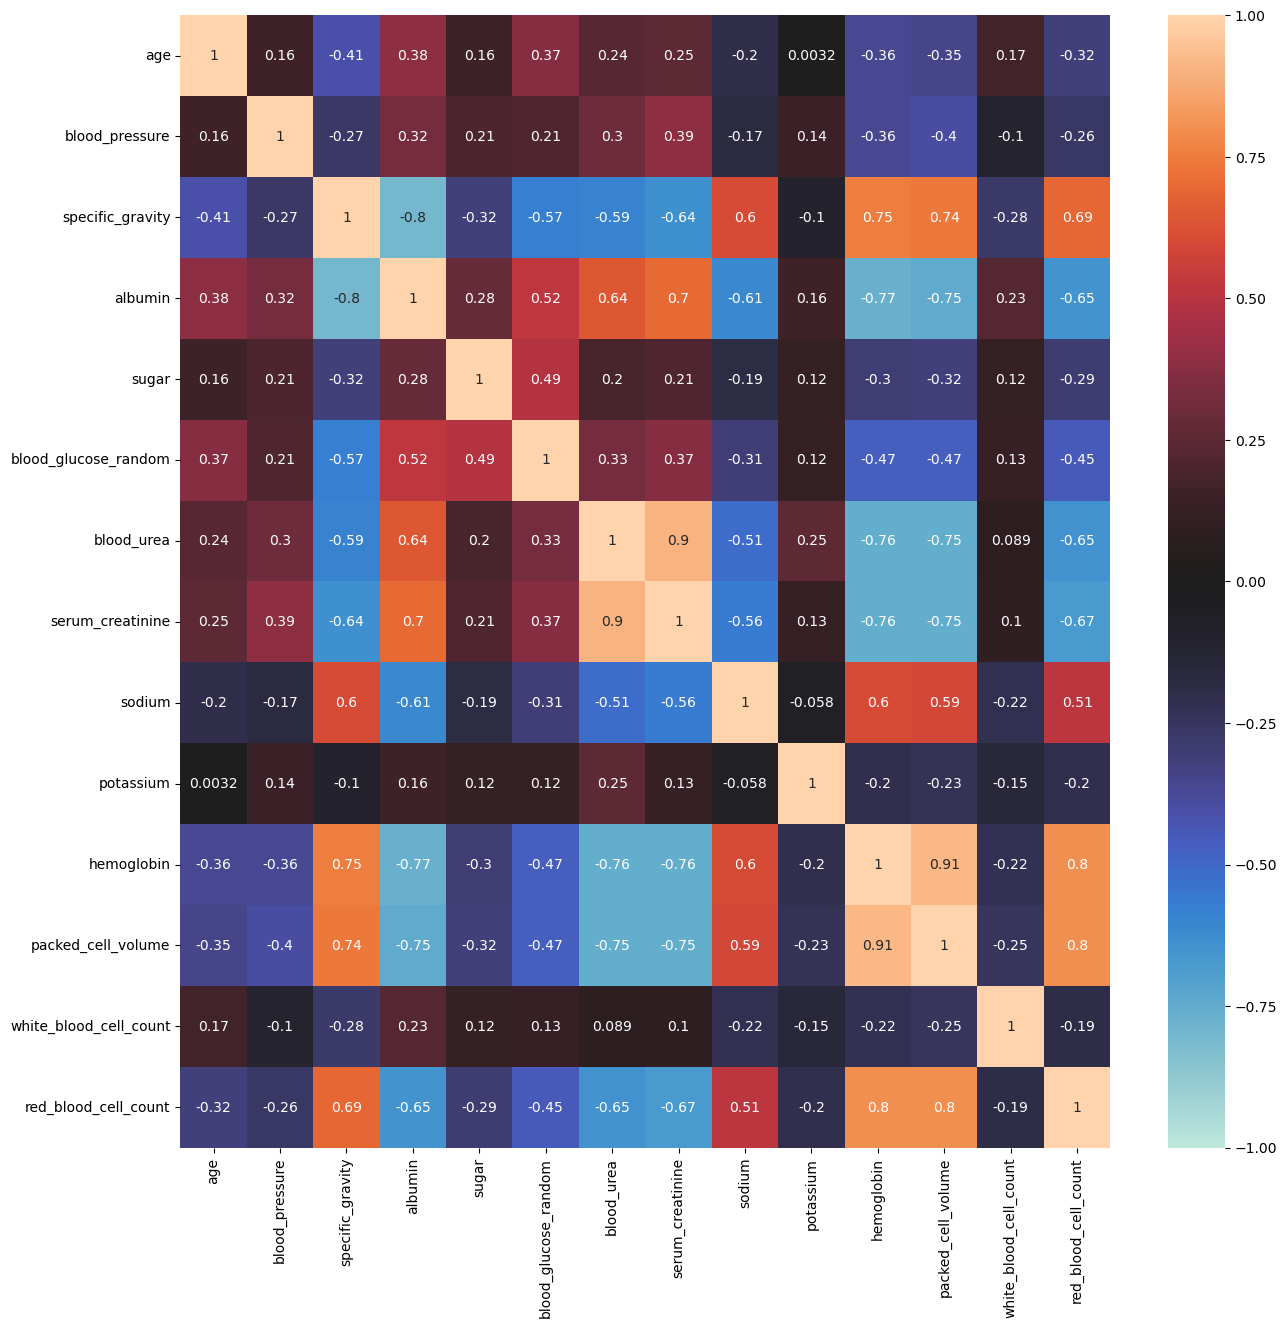

In [80]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df1_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

In [81]:
# Copy of oversampled set 1
X_df1a_SMOTE = X_df1_SMOTE.copy()
X_df1b_SMOTE = X_df1_SMOTE.copy()
X_df1c_SMOTE = X_df1_SMOTE.copy()
X_df1d_SMOTE = X_df1_SMOTE.copy()

In [82]:
# blood urea and serum creatinine have high correlation value of 0.9
X_df1a_SMOTE = X_df1a_SMOTE.drop(['blood_urea'], axis=1) # dropping blood urea

# hemoglobin has high correlation values with packed cell volume at 0.91 and red_blood_cell_count at 0.8
X_df1a_SMOTE = X_df1a_SMOTE.drop(['hemoglobin'], axis=1) # dropping hemoglobin
X_df1a_SMOTE = X_df1a_SMOTE.drop(['red_blood_cell_count'], axis=1) # dropping red_blood_cell count

# dropping blood pressure because it relates closely to hypertension
X_df1a_SMOTE = X_df1a_SMOTE.drop(['blood_pressure'], axis=1) 

<AxesSubplot:>

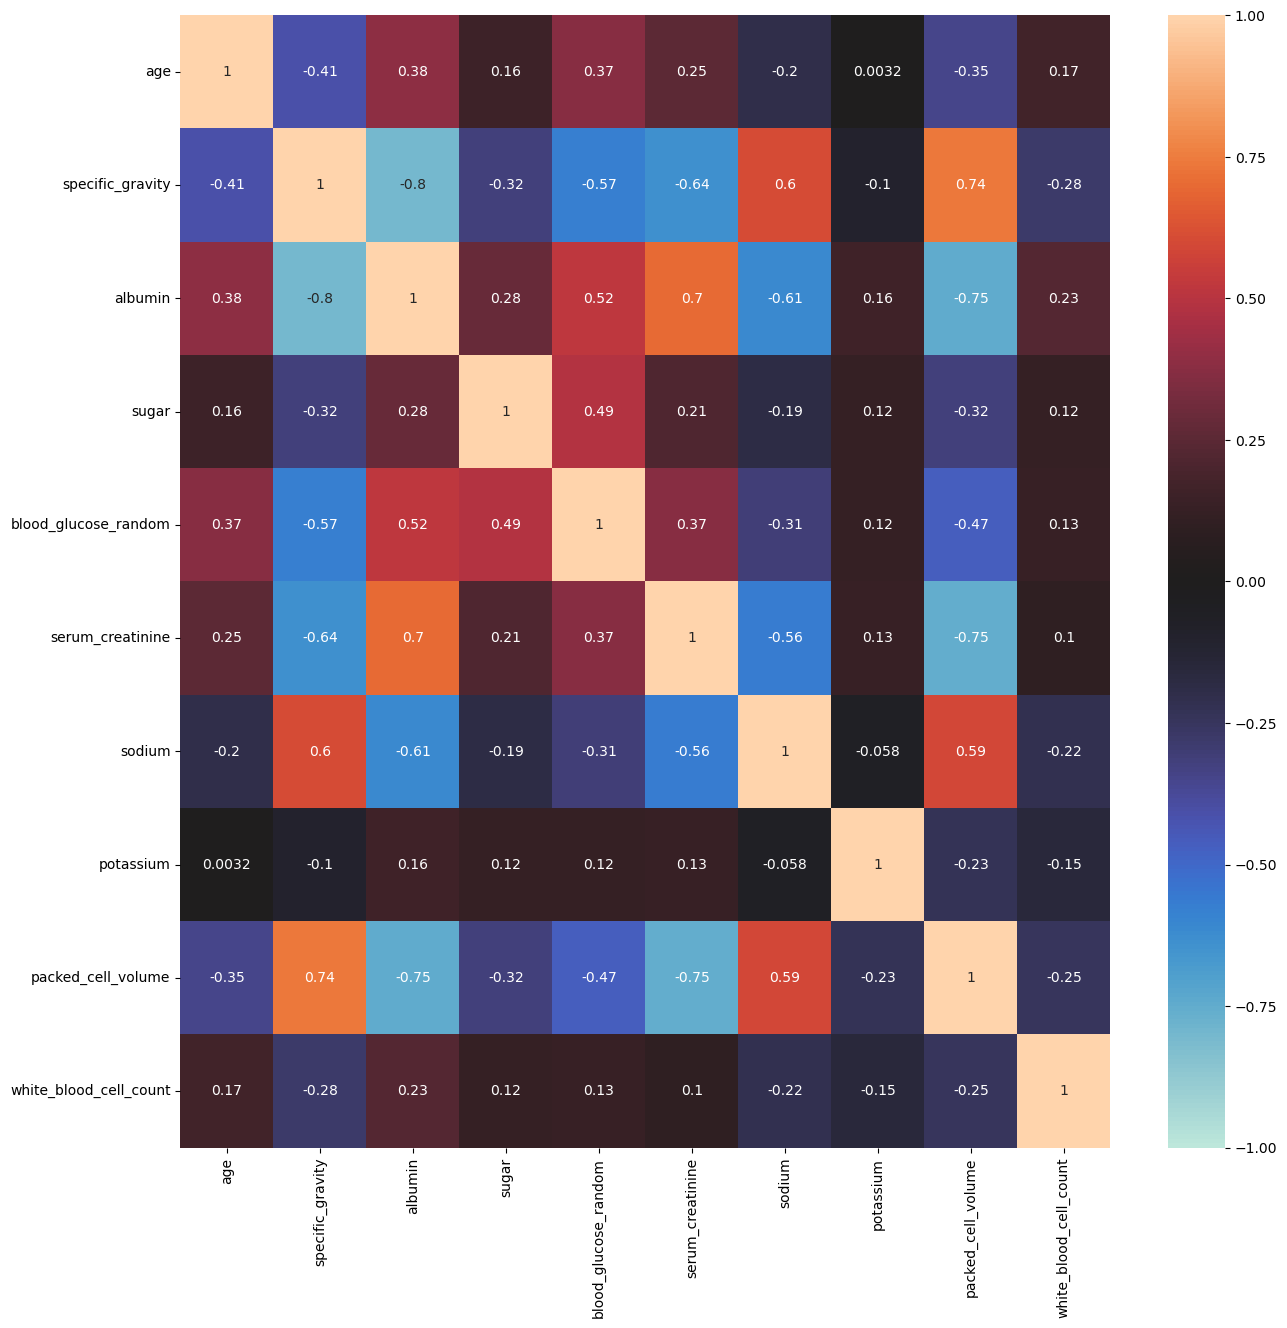

In [83]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df1a_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

Dataframe 2A

In [84]:
cat_col2, num_col2 = extract_cat_num(kidney_df2)

<AxesSubplot:>

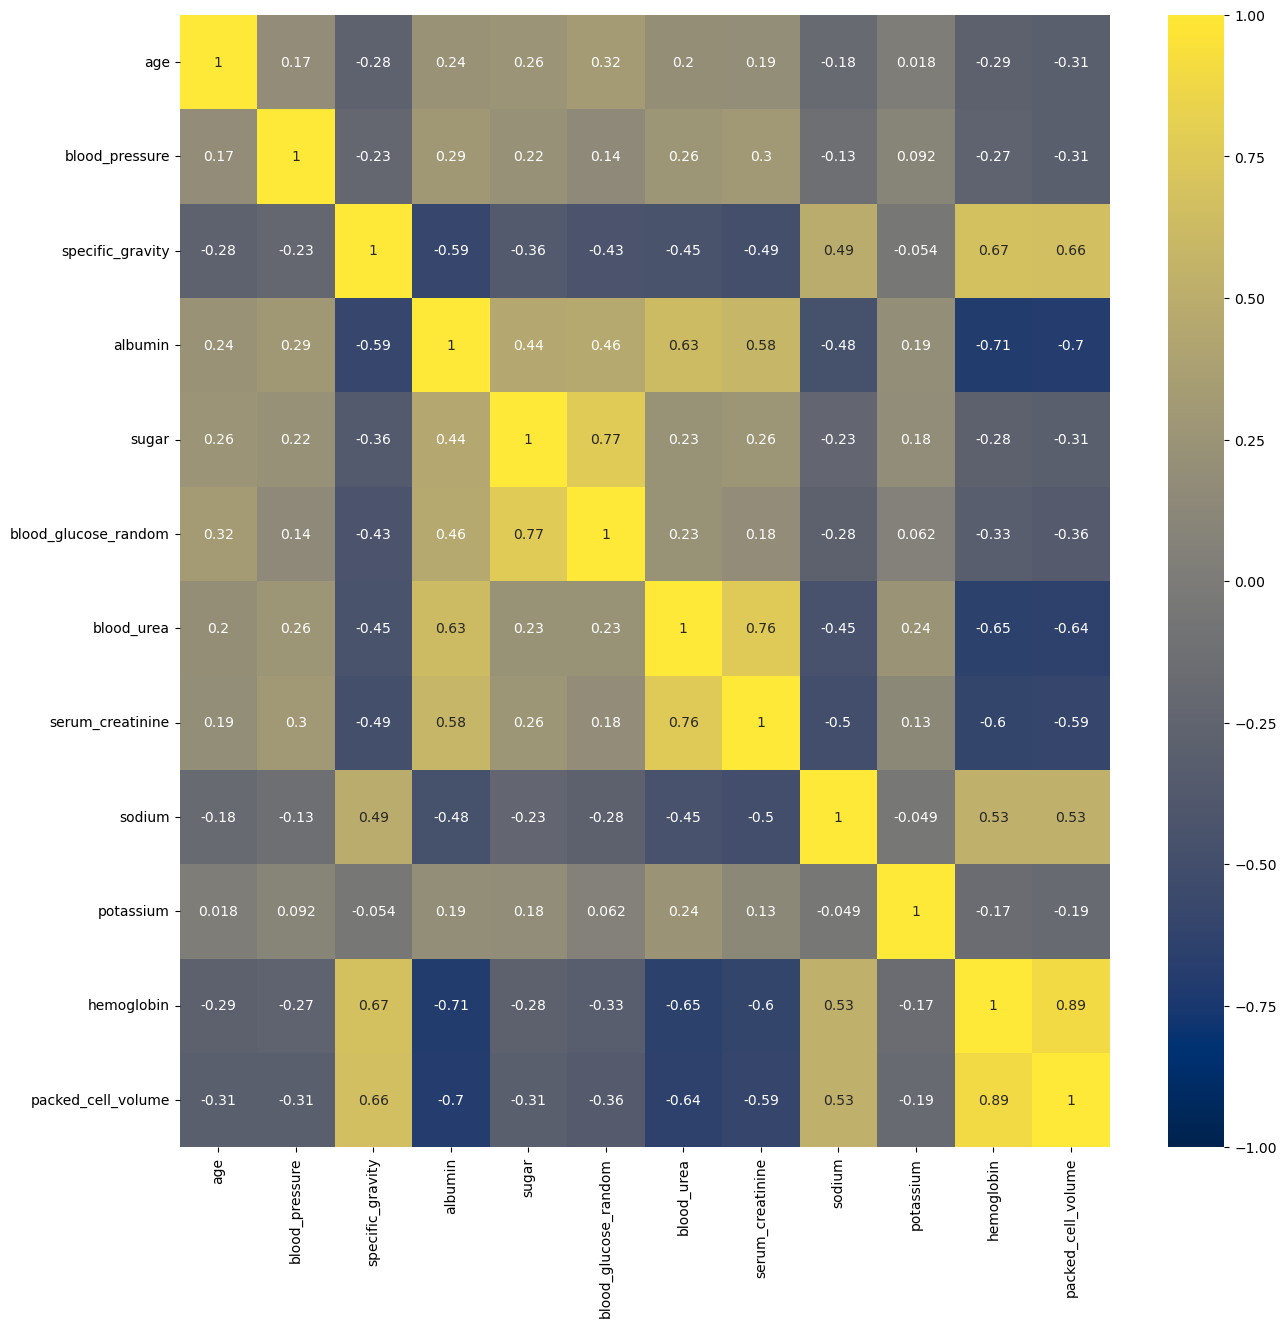

In [85]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df2_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'cividis')

In [86]:
# Copy of oversampled set 1
X_df2a_SMOTE = X_df2_SMOTE.copy()
X_df2b_SMOTE = X_df2_SMOTE.copy()
X_df2c_SMOTE = X_df2_SMOTE.copy()
X_df2d_SMOTE = X_df2_SMOTE.copy()

In [87]:
# hemoglobin has high correlation with packed cell volume at 0.89
X_df2a_SMOTE = X_df2a_SMOTE.drop(['hemoglobin'], axis=1) # dropping hemoglobin

<AxesSubplot:>

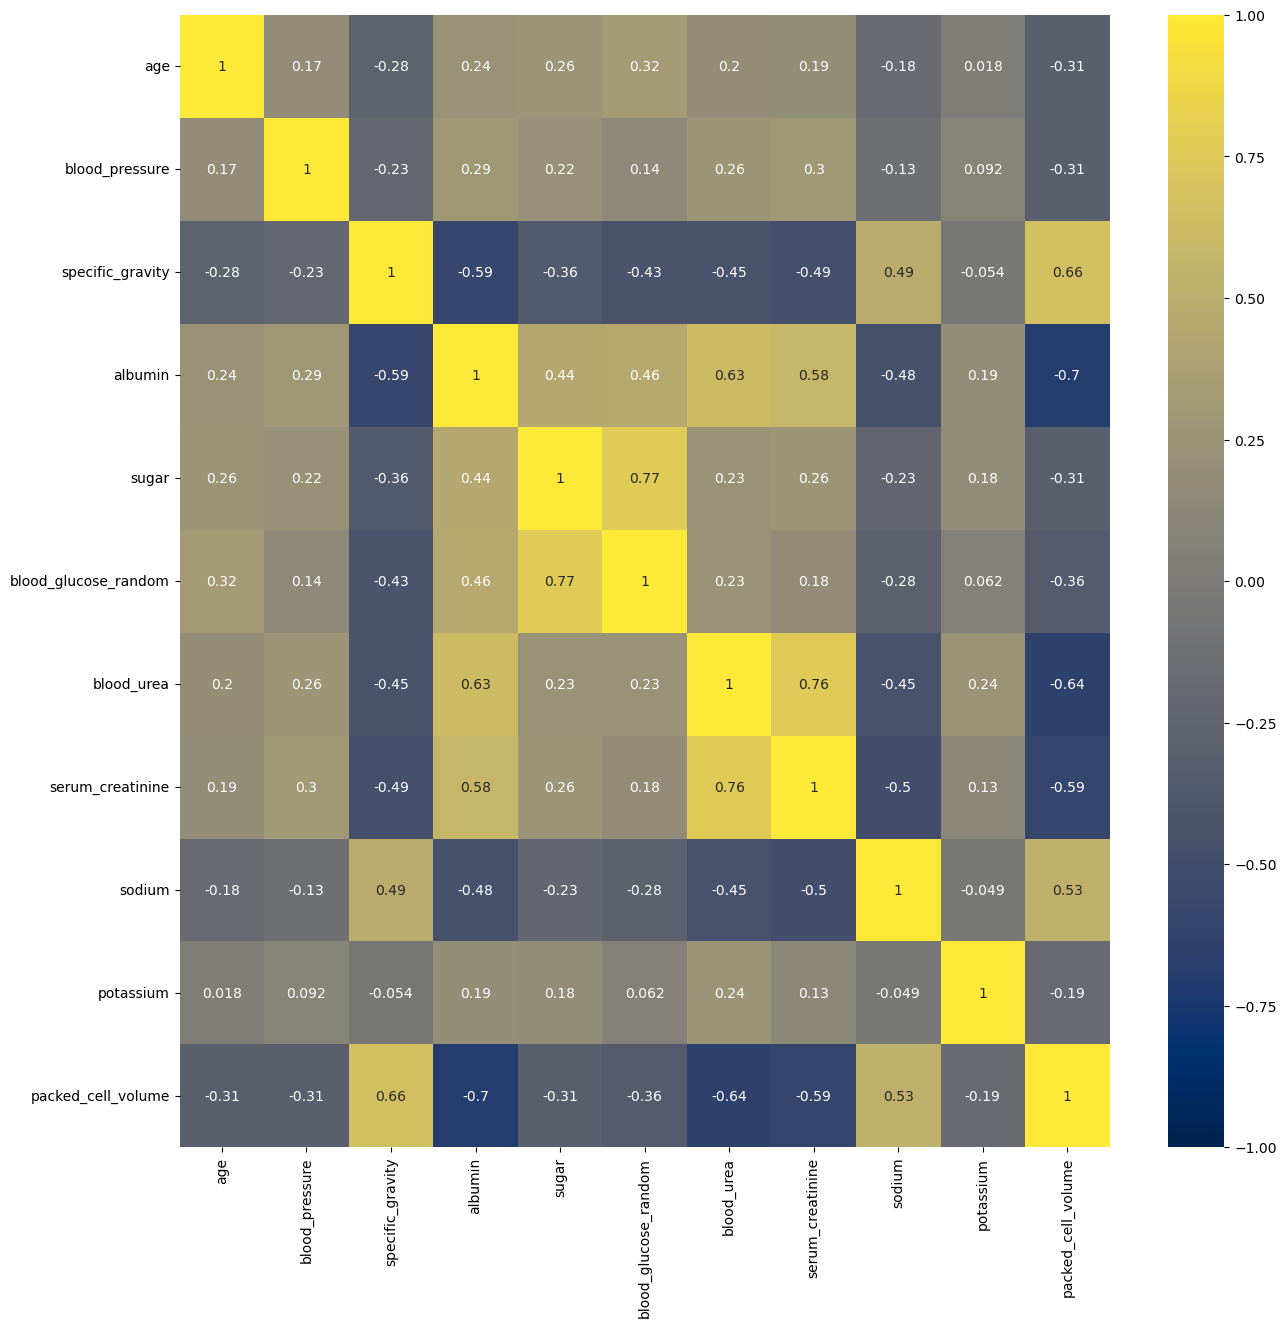

In [81]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df2a_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'cividis')

Dataframe 3A

In [88]:
cat_col3, num_col3 = extract_cat_num(kidney_df3)

<AxesSubplot:>

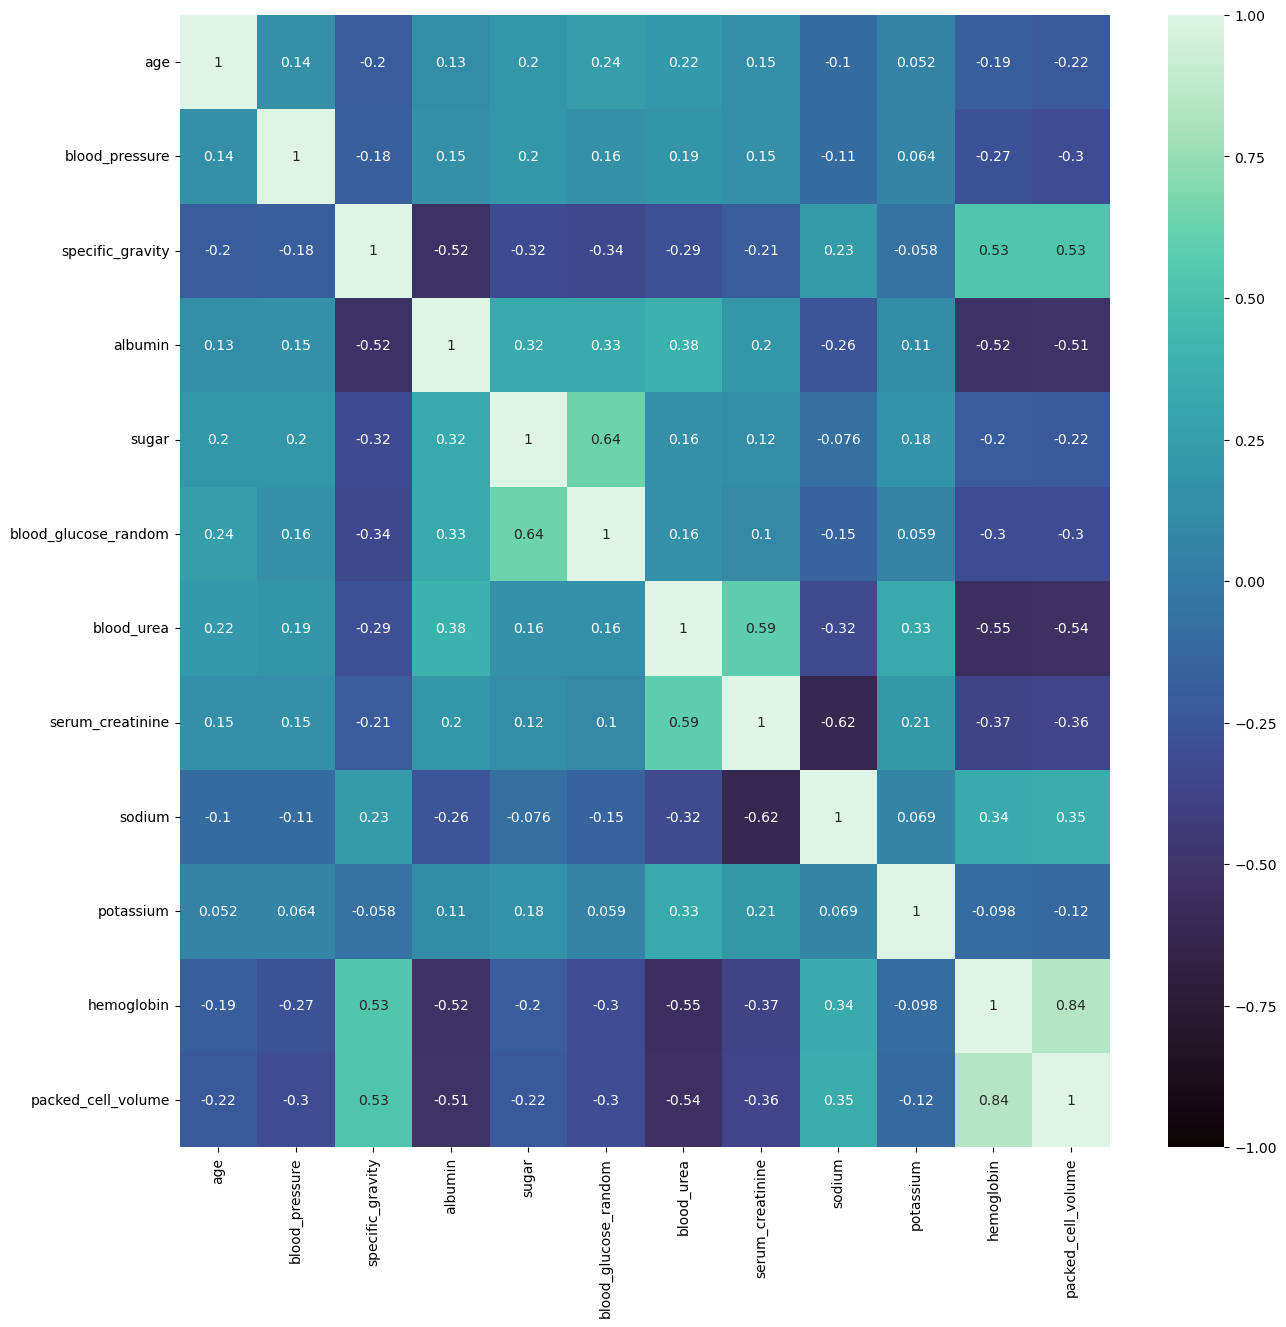

In [83]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df3_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'mako')

In [89]:
# Copy of oversampled set 3
X_df3a_SMOTE = X_df3_SMOTE.copy()
X_df3b_SMOTE = X_df3_SMOTE.copy()
X_df3c_SMOTE = X_df3_SMOTE.copy()
X_df3d_SMOTE = X_df3_SMOTE.copy()

In [90]:
# high correlation between hemoglobin and packed cell volume at 0.84
X_df3a_SMOTE = X_df3a_SMOTE.drop(['packed_cell_volume'], axis=1) # dropping hemoglobin

<AxesSubplot:>

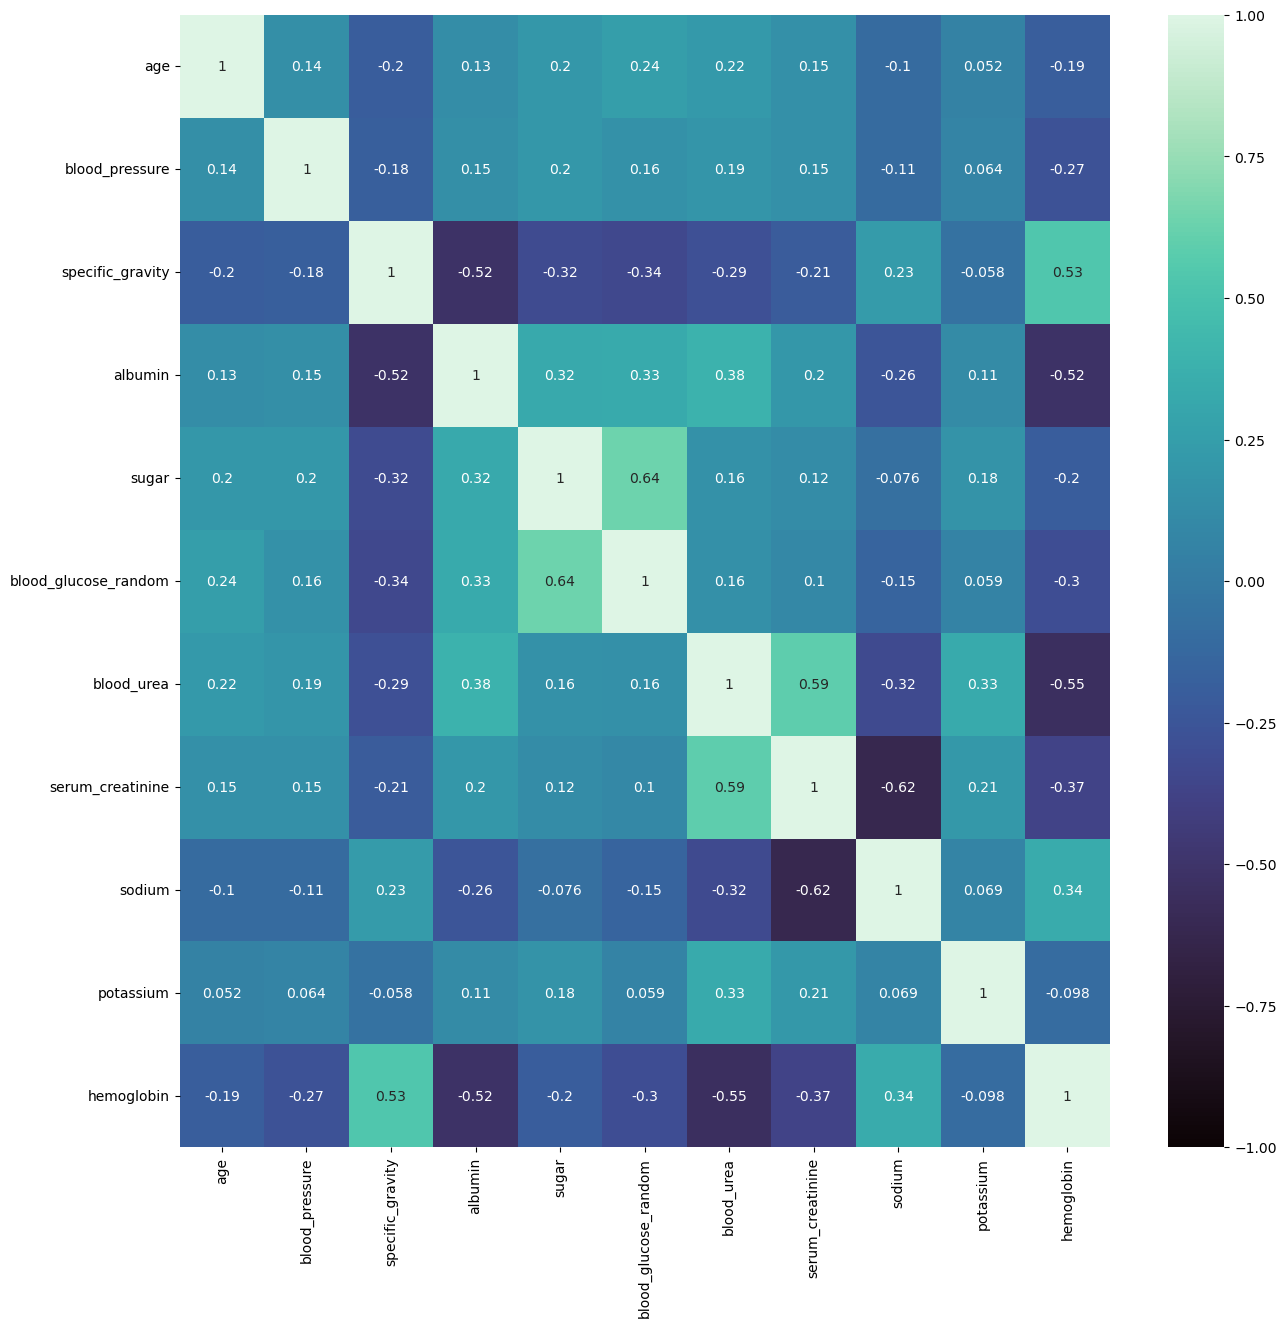

In [86]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df3a_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'mako')

### Feature selection method: Backward Elimination

In [100]:
## backward elimination
# backward regression
Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")

Dataset 1B

In [92]:
# Application of the backward regression function on the data
# Dont use correlation before backward regression
backward_regression(X_df1b_SMOTE, y_df1_SMOTE)

worst_feature : serum_creatinine, 0.9988216911124113 
worst_feature : potassium, 0.9850117976970664 
worst_feature : blood_urea, 0.9571968789295456 
worst_feature : diabetes_mellitus, 0.9244300794231937 
worst_feature : age, 0.8086867346564696 
worst_feature : appetite, 0.7208112891055287 
worst_feature : sugar, 0.527729085255682 
worst_feature : pedal_edema, 0.29187412393349293 
worst_feature : pus_cell_clumps, 0.30573804578654185 
worst_feature : red_blood_cell_count, 0.35916337114514096 
worst_feature : packed_cell_volume, 0.1883217176484637 
worst_feature : anemia, 0.15477481918206076 

Selected Features:
['blood_pressure', 'specific_gravity', 'albumin', 'red_blood_cells', 'pus_cell', 'bacteria', 'blood_glucose_random', 'sodium', 'hemoglobin', 'white_blood_cell_count', 'hypertension', 'coronary_artery_disease']


In [93]:
# Keep the selected features only
X_df1b_SMOTE = X_df1b_SMOTE.loc[:, Selected_Features[0]]

In [94]:
# dropping blood pressure because it relates closely to hypertension
X_df1b_SMOTE = X_df1b_SMOTE.drop(['blood_pressure'], axis=1) 

In [95]:
X_df1b_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   specific_gravity         230 non-null    float64 
 1   albumin                  230 non-null    float64 
 2   red_blood_cells          230 non-null    category
 3   pus_cell                 230 non-null    category
 4   bacteria                 230 non-null    category
 5   blood_glucose_random     230 non-null    float64 
 6   sodium                   230 non-null    float64 
 7   hemoglobin               230 non-null    float64 
 8   white_blood_cell_count   230 non-null    float64 
 9   hypertension             230 non-null    category
 10  coronary_artery_disease  230 non-null    category
dtypes: category(5), float64(6)
memory usage: 12.6 KB


Dataset 2B

In [97]:
# Application of the backward regression function on the data
backward_regression(X_df2b_SMOTE, y_df2_SMOTE)

worst_feature : appetite, 0.8972793752811244 
worst_feature : serum_creatinine, 0.7675747948259852 
worst_feature : sugar, 0.6387264644762567 
worst_feature : age, 0.6170774176072137 
worst_feature : coronary_artery_disease, 0.5283973587931717 
worst_feature : pus_cell_clumps, 0.42101779611386947 
worst_feature : pus_cell, 0.3015752469287647 
worst_feature : blood_glucose_random, 0.2997357167400853 
worst_feature : blood_urea, 0.21407857299329966 
worst_feature : bacteria, 0.23806908137484117 
worst_feature : potassium, 0.13211060945429848 
worst_feature : packed_cell_volume, 0.08055627256011336 
worst_feature : anemia, 0.0991885983559263 
worst_feature : sodium, 0.09619477593428268 
worst_feature : blood_pressure, 0.07268883139000326 

Selected Features:
['specific_gravity', 'albumin', 'hemoglobin', 'hypertension', 'diabetes_mellitus', 'pedal_edema']


In [98]:
# Keep the selected features only
X_df2b_SMOTE = X_df2b_SMOTE.loc[:, Selected_Features[0]]

In [99]:
X_df2b_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   specific_gravity   236 non-null    float64 
 1   albumin            236 non-null    float64 
 2   hemoglobin         236 non-null    float64 
 3   hypertension       236 non-null    category
 4   diabetes_mellitus  236 non-null    category
 5   pedal_edema        236 non-null    category
dtypes: category(3), float64(3)
memory usage: 6.7 KB


Dataset 3B

In [101]:
# Application of the backward regression function on the data
backward_regression(X_df3b_SMOTE, y_df3_SMOTE)

worst_feature : sugar, 0.9346912829470986 
worst_feature : potassium, 0.8358730019071595 
worst_feature : age, 0.628922856038086 
worst_feature : pus_cell, 0.5453888368662124 
worst_feature : pedal_edema, 0.5485922084568675 
worst_feature : pus_cell_clumps, 0.31450527225020264 
worst_feature : packed_cell_volume, 0.3168153519838421 
worst_feature : coronary_artery_disease, 0.30067918974328434 
worst_feature : blood_glucose_random, 0.2832584699789817 
worst_feature : sodium, 0.24890931720854287 
worst_feature : bacteria, 0.20073730403232545 
worst_feature : anemia, 0.22982940017258102 

Selected Features:
['blood_pressure', 'specific_gravity', 'albumin', 'blood_urea', 'serum_creatinine', 'hemoglobin', 'hypertension', 'diabetes_mellitus', 'appetite']


In [102]:
# Keep the selected features only
X_df3b_SMOTE = X_df3b_SMOTE.loc[:, Selected_Features[0]]

In [103]:
# dropping blood pressure because it relates closely to hypertension
X_df3b_SMOTE = X_df3b_SMOTE.drop(['blood_pressure'], axis=1) 

In [104]:
X_df3b_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   specific_gravity   500 non-null    float64 
 1   albumin            500 non-null    float64 
 2   blood_urea         500 non-null    float64 
 3   serum_creatinine   500 non-null    float64 
 4   hemoglobin         500 non-null    float64 
 5   hypertension       500 non-null    category
 6   diabetes_mellitus  500 non-null    category
 7   appetite           500 non-null    category
dtypes: category(3), float64(5)
memory usage: 21.5 KB


## Feature selection wrapper methods: Sequential Feature Selection

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. 

### Backward Elimination

In [ ]:
backward_sfs = SequentialFeatureSelector('estimator', n_features_to_select='auto', 
                          tol=None, direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(X,y)

In [ ]:
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[backward_sfs.get_support()]}"
)

In [ ]:
# Keep the selected features only
X_df3c_SMOTE = X_df3c_SMOTE.loc[:, feature_names[backward_sfs.get_support()]]

### Forward Elimination

In [ ]:
forward_sfs = SequentialFeatureSelector('estimator', n_features_to_select='auto', 
                          tol=None, direction='forward', scoring='accuracy', cv=5, n_jobs=-1).fit(X,y)

In [ ]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[forward_sfs.get_support()]}"
)

In [ ]:
# Keep the selected features only
X_df3d_SMOTE = X_df3d_SMOTE.loc[:, feature_names[forward_sfs.get_support()]]

# Feature Selection: Undersampled Data

## Feature Selection 

Feature selection that is done according to 
- pearsons correlation of the heatmap and 
- backward elimination

### Feature selection method: Pearsons Correlation

Dataframe 1A

In [105]:
cat_col1, num_col1 = extract_cat_num(kidney_df1)

<AxesSubplot:>

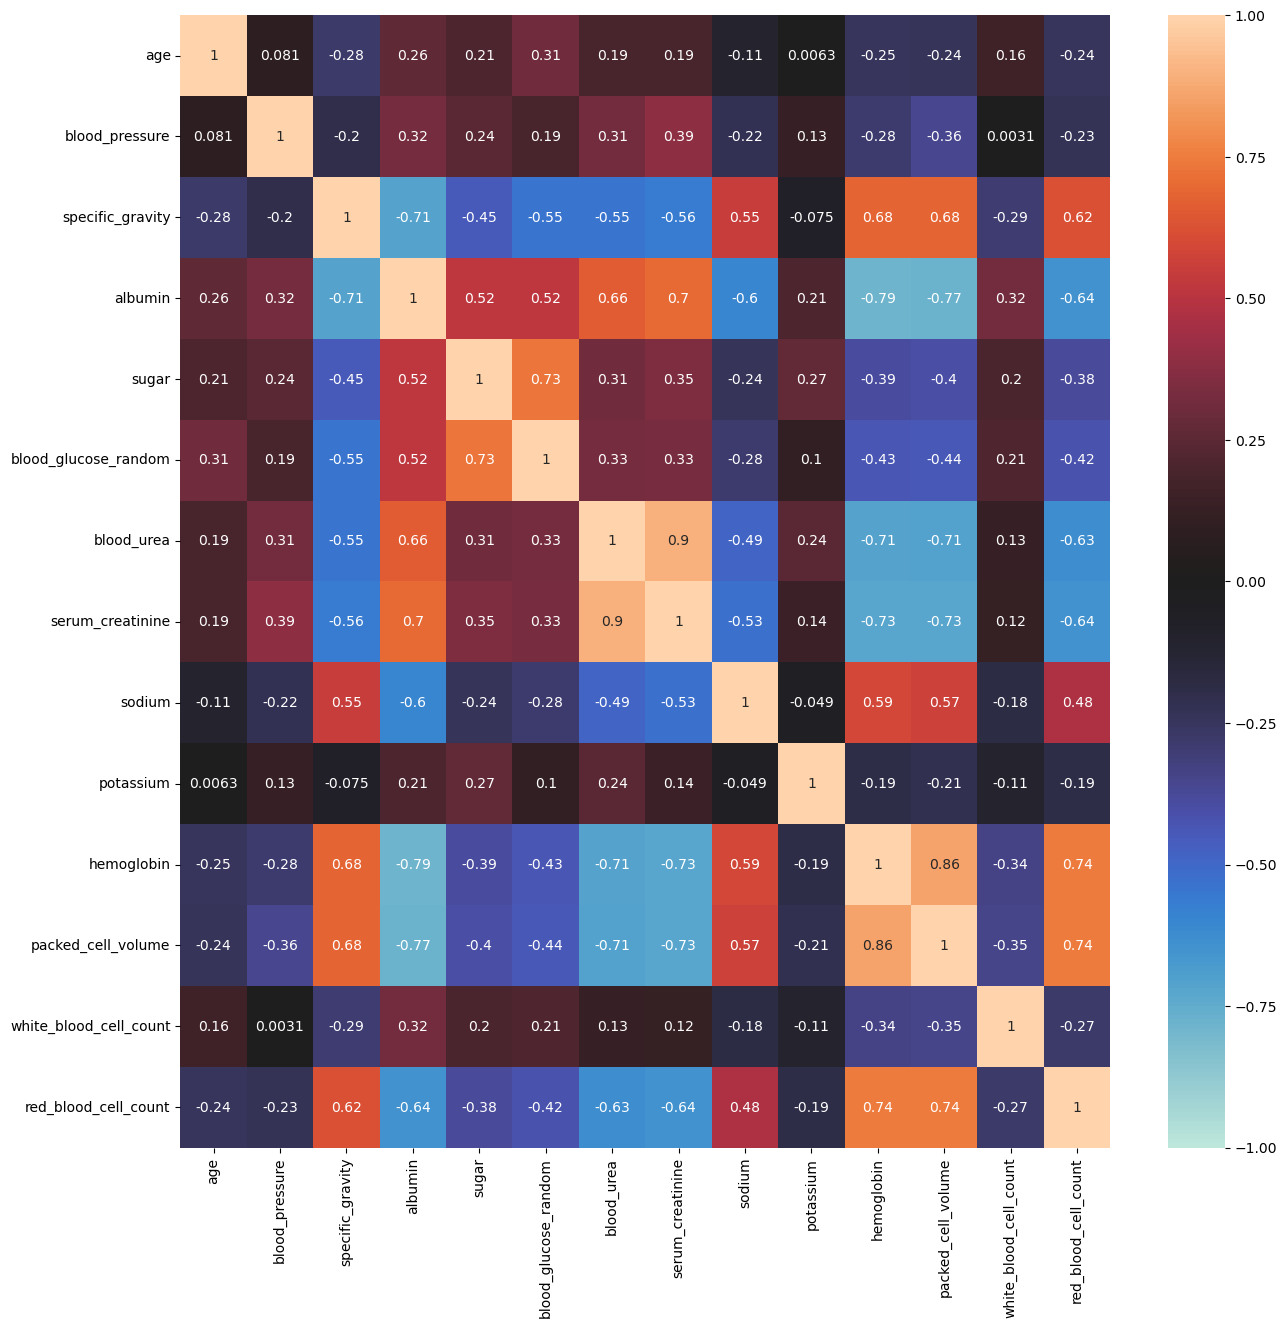

In [102]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df1_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

In [106]:
# Copy of undersampled set 1
X_df1a_TK = X_df1_TK.copy()
X_df1b_TK = X_df1_TK.copy()
X_df1c_TK = X_df1_TK.copy()
X_df1d_TK = X_df1_TK.copy()

In [107]:
# blood urea and serum creatinine have high correlation value of 0.9
X_df1a_TK = X_df1a_TK.drop(['blood_urea'], axis=1) # dropping blood urea

# hemoglobin has high correlation values with packed cell volume at 0.86
X_df1a_TK = X_df1a_TK.drop(['hemoglobin'], axis=1) # dropping hemoglobin

# dropping blood pressure because it relates closely to hypertension
X_df1a_TK = X_df1a_TK.drop(['blood_pressure'], axis=1) 

<AxesSubplot:>

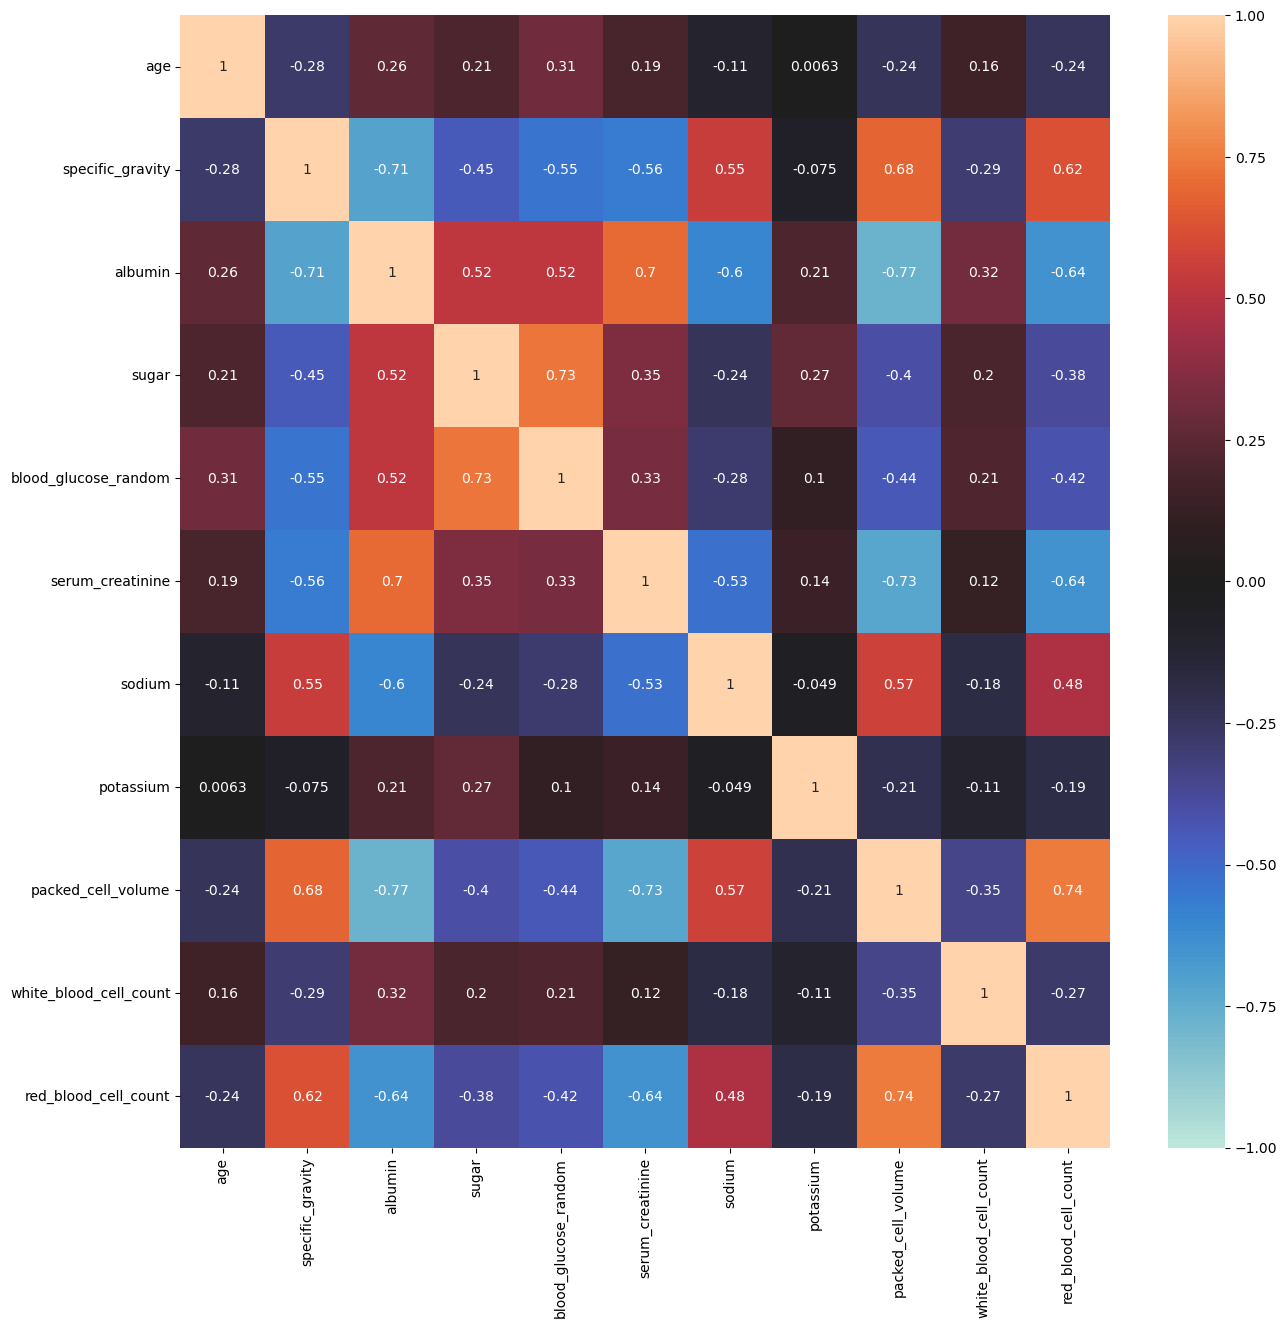

In [105]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df1a_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

Dataframe 2A

In [108]:
cat_col2, num_col2 = extract_cat_num(kidney_df2)

<AxesSubplot:>

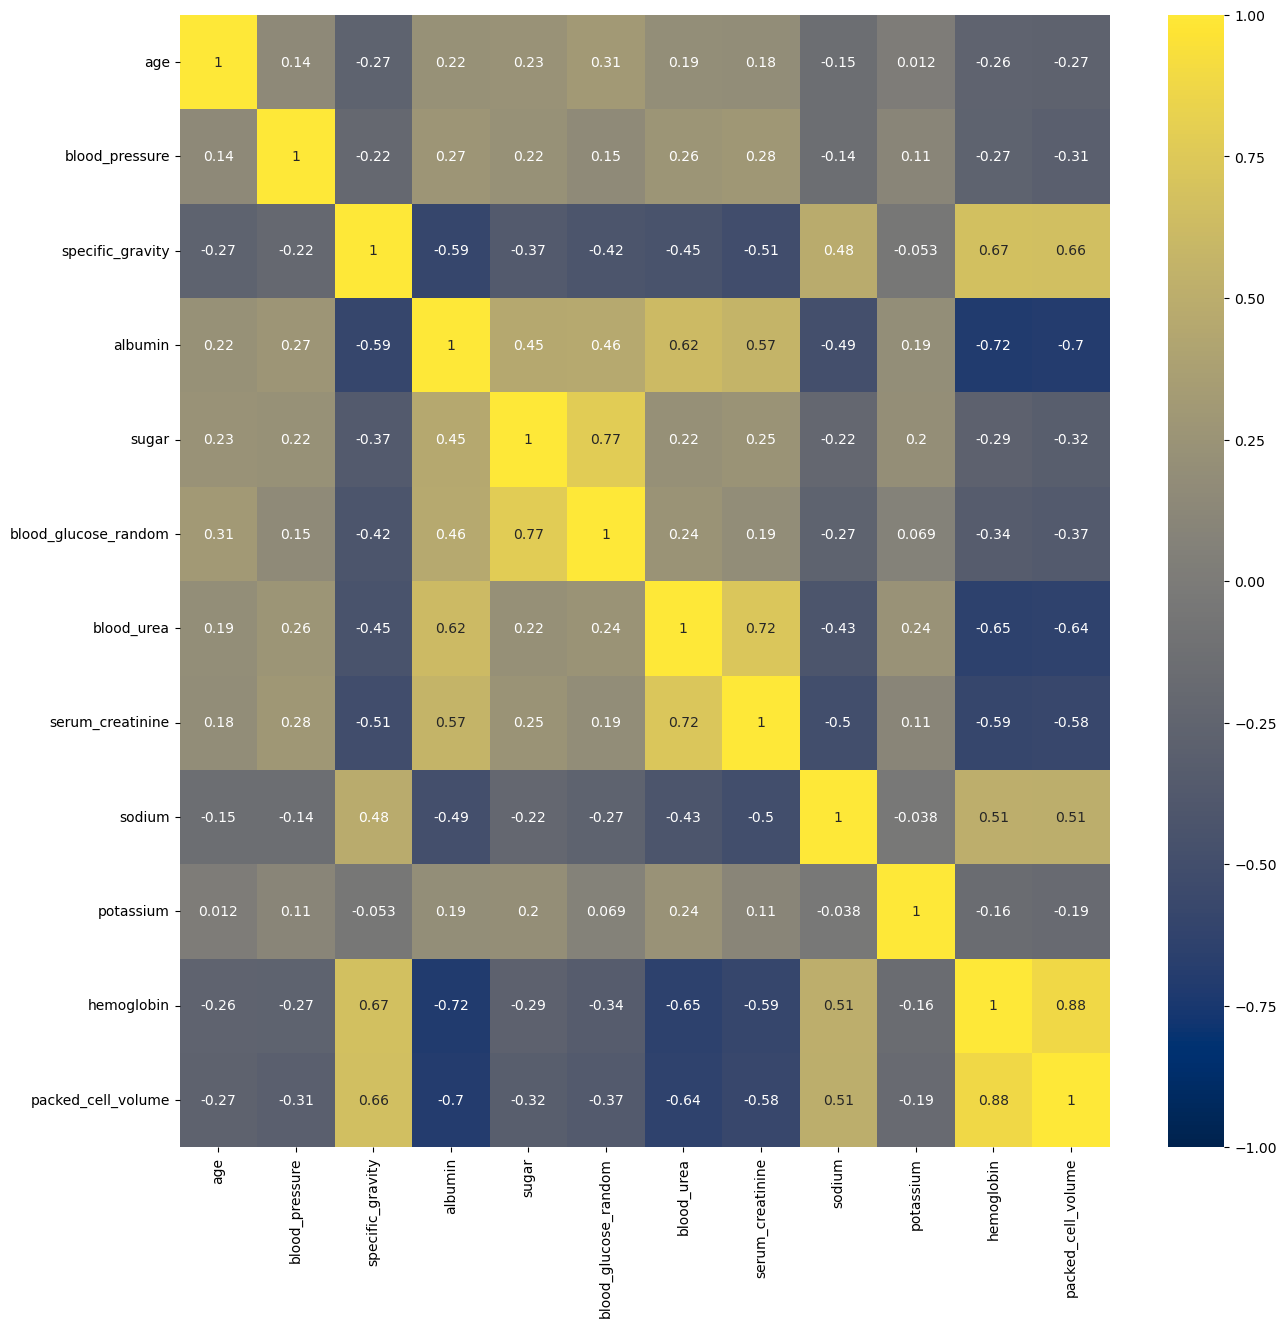

In [109]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df2_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'cividis')

In [110]:
# Copy of undersampled set 2
X_df2a_TK = X_df2_TK.copy()
X_df2b_TK = X_df2_TK.copy()
X_df2c_TK = X_df2_TK.copy()
X_df2d_TK = X_df2_TK.copy()

In [111]:
# hemoglobin has high correlation with packed cell volume at 0.88
X_df2a_TK = X_df2a_TK.drop(['hemoglobin'], axis=1) # dropping hemoglobin

<AxesSubplot:>

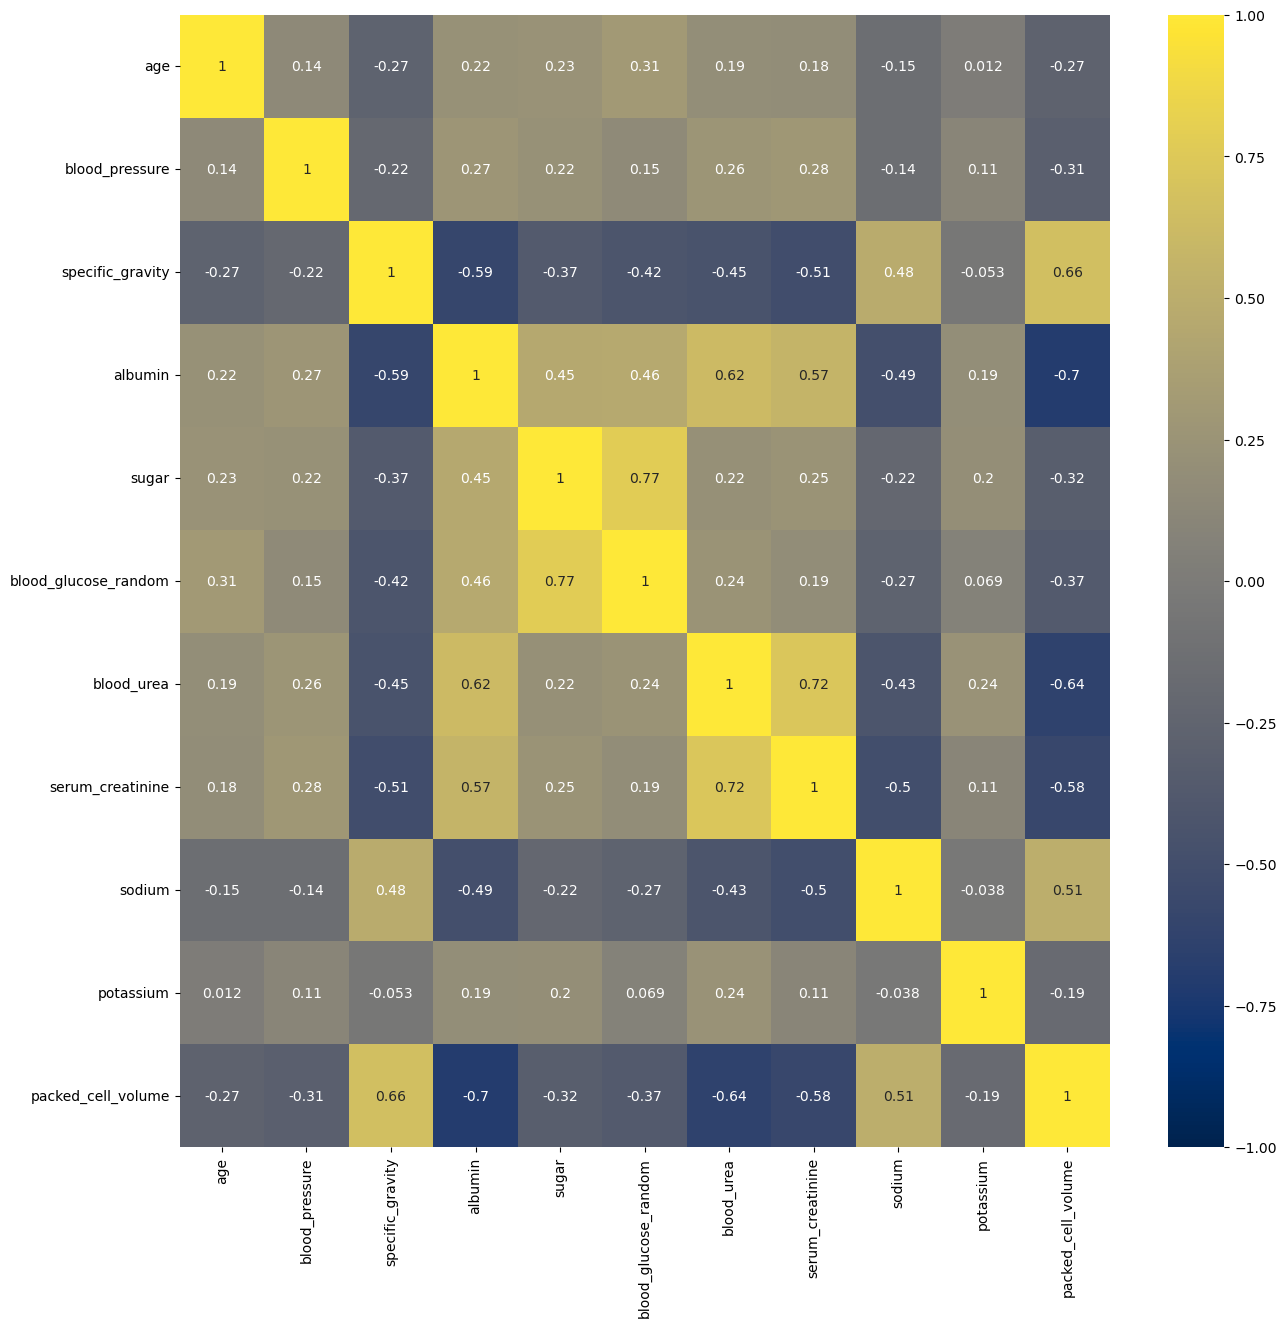

In [110]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df2a_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'cividis')

Dataframe 3A

In [112]:
cat_col3, num_col3 = extract_cat_num(kidney_df3)

<AxesSubplot:>

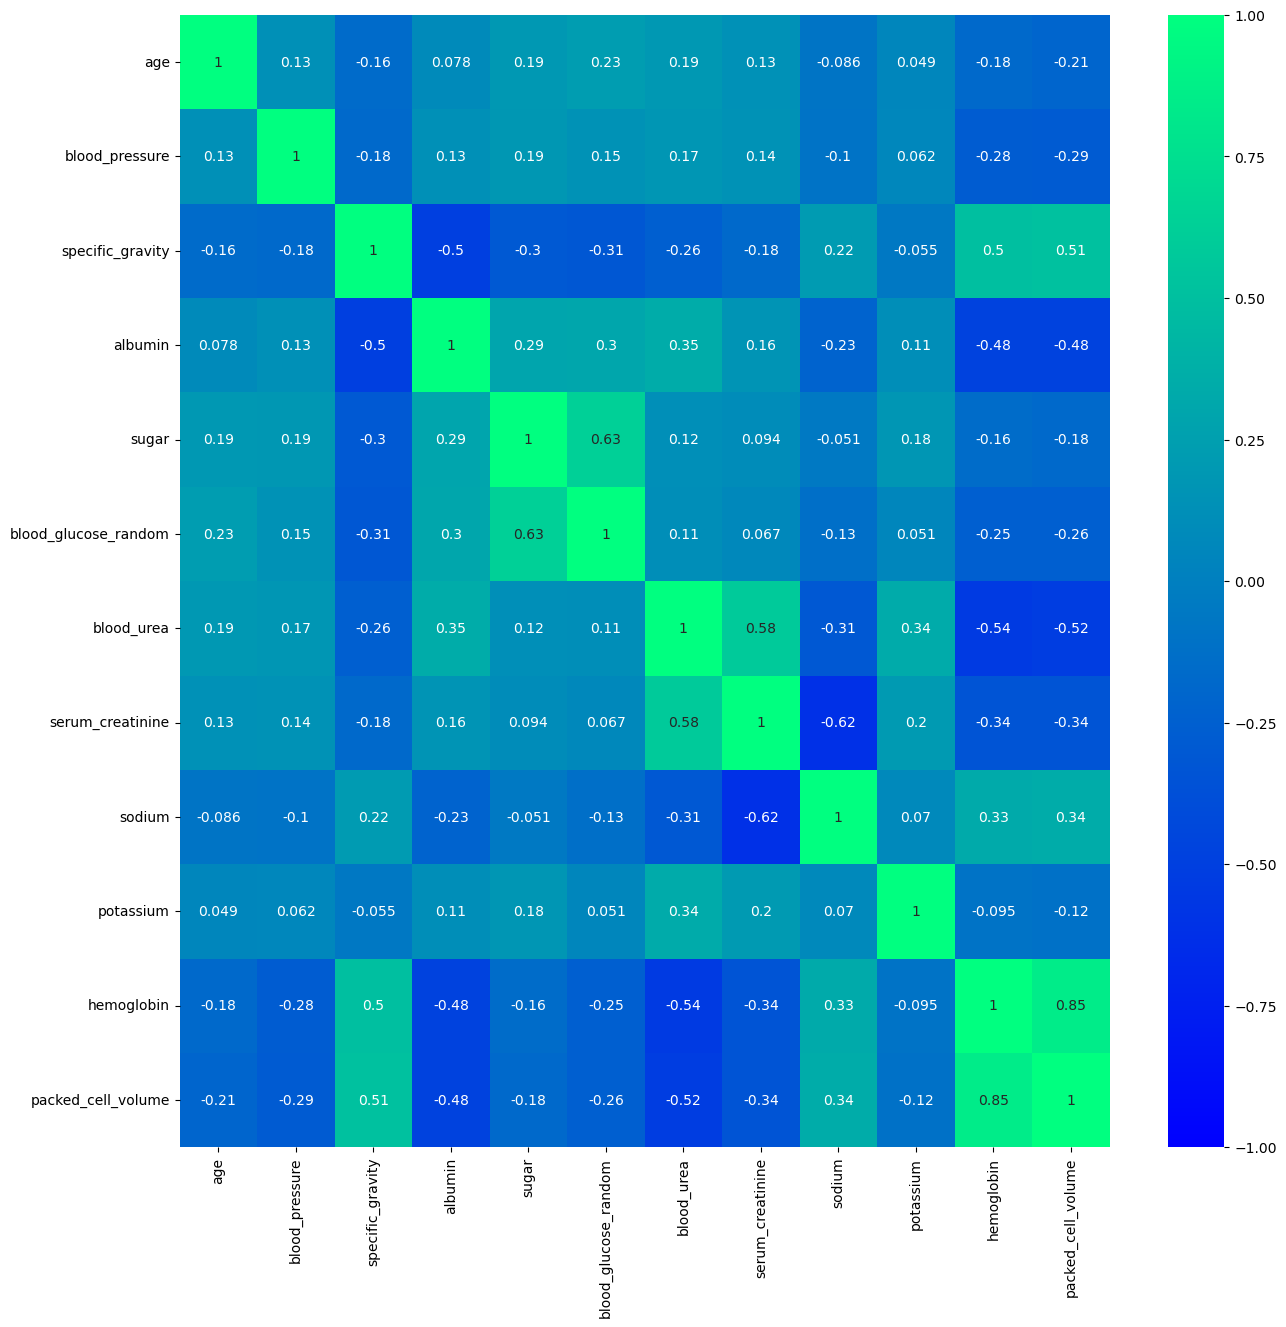

In [112]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df3_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'winter')

In [113]:
# Copy of oversampled set 1
X_df3a_TK = X_df3_TK.copy()
X_df3b_TK = X_df3_TK.copy()
X_df3c_TK = X_df3_TK.copy()
X_df3d_TK = X_df3_TK.copy()

In [114]:
# high correlation between hemoglobin and packed cell volume at 0.85
X_df3a_TK = X_df3a_TK.drop(['packed_cell_volume'], axis=1) # dropping hemoglobin

<AxesSubplot:>

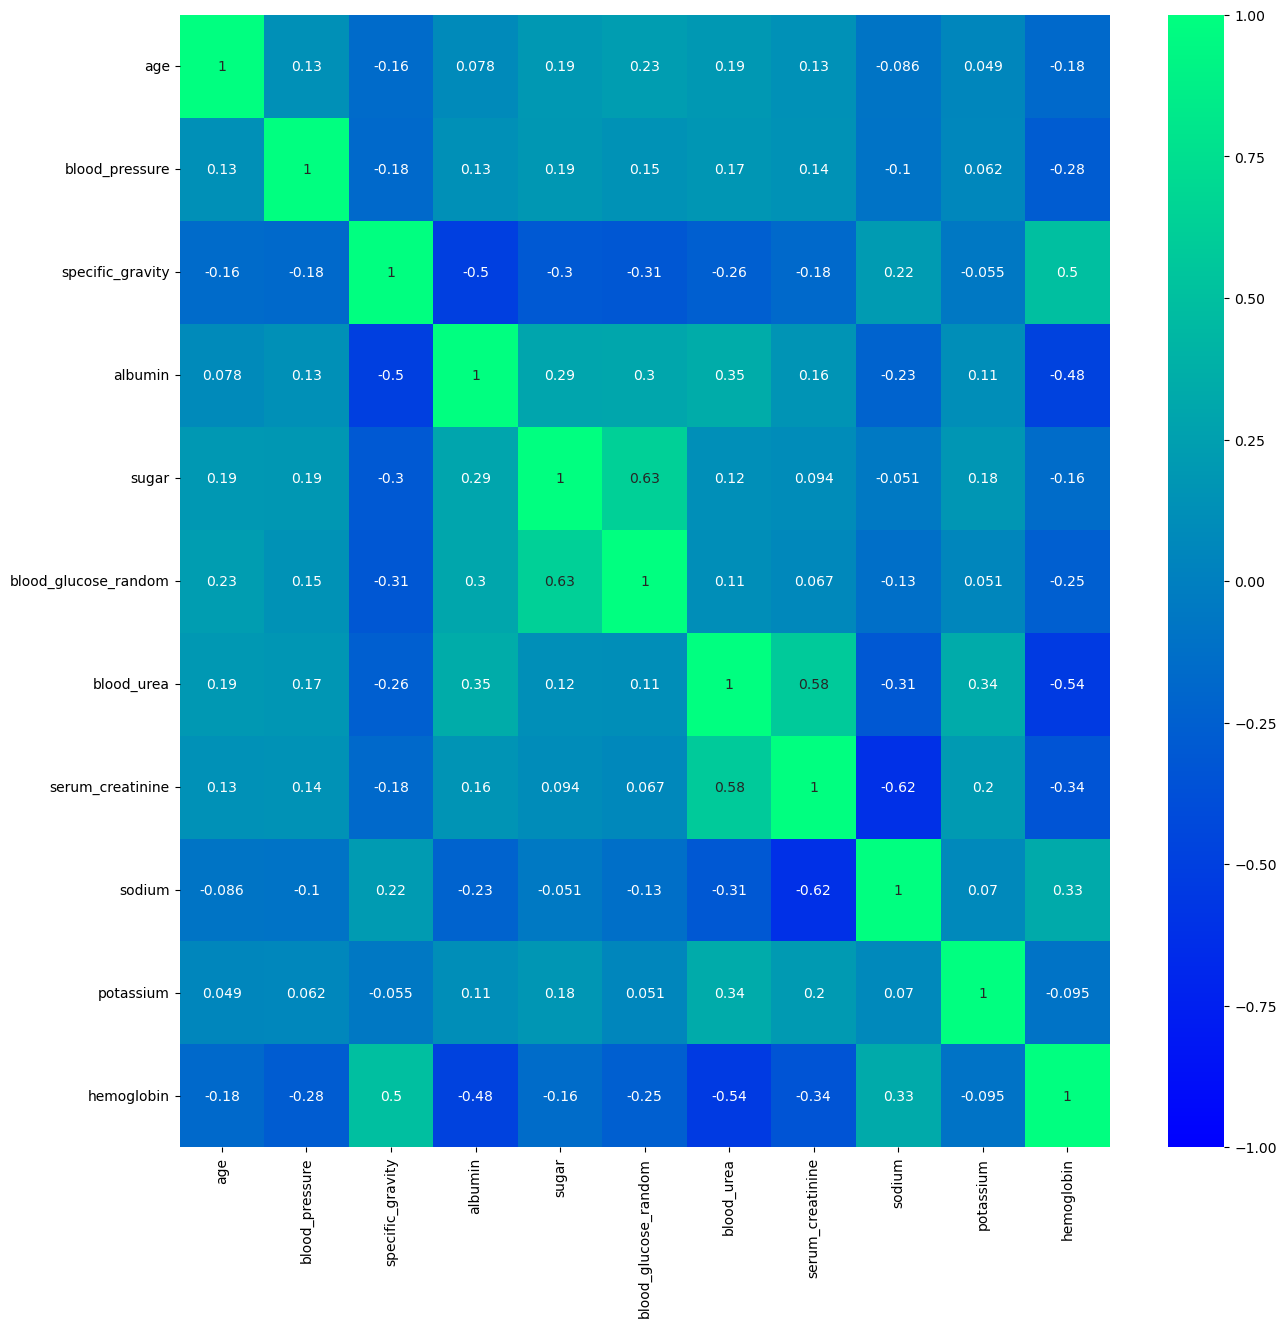

In [115]:
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df3a_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'winter')

### Feature selection method: Backward Elimination

In [123]:
## backward elimination
# backward regression
Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")

Dataset 1B

In [116]:
# Application of the backward regression function on the data
# Dont use correlation before backward regression
backward_regression(X_df1b_TK, y_df1_TK)

worst_feature : potassium, 0.9867296878304304 
worst_feature : serum_creatinine, 0.9774629730177564 
worst_feature : diabetes_mellitus, 0.9204676583952704 
worst_feature : age, 0.8209354470074768 
worst_feature : blood_pressure, 0.6914563166301979 
worst_feature : pus_cell_clumps, 0.69896543674843 
worst_feature : bacteria, 0.593657124235206 
worst_feature : hemoglobin, 0.4566639362396989 
worst_feature : coronary_artery_disease, 0.4304771470460391 
worst_feature : blood_glucose_random, 0.2002334942815117 
worst_feature : appetite, 0.14792577271338408 
worst_feature : packed_cell_volume, 0.09821887421871896 
worst_feature : sugar, 0.08383743725466823 

Selected Features:
['specific_gravity', 'albumin', 'red_blood_cells', 'pus_cell', 'blood_urea', 'sodium', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'pedal_edema', 'anemia']


In [117]:
# Keep the selected features only
X_df1b_TK = X_df1b_TK.loc[:, Selected_Features[0]]

In [118]:
X_df1b_TK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   specific_gravity        155 non-null    float64 
 1   albumin                 155 non-null    float64 
 2   red_blood_cells         155 non-null    category
 3   pus_cell                155 non-null    category
 4   blood_urea              155 non-null    float64 
 5   sodium                  155 non-null    float64 
 6   white_blood_cell_count  155 non-null    float64 
 7   red_blood_cell_count    155 non-null    float64 
 8   hypertension            155 non-null    category
 9   pedal_edema             155 non-null    category
 10  anemia                  155 non-null    category
dtypes: category(5), float64(6)
memory usage: 8.8 KB


Dataset 2B

In [120]:
# Application of the backward regression function on the data
backward_regression(X_df2b_TK, y_df2_TK)

worst_feature : appetite, 0.8516136372868446 
worst_feature : pus_cell_clumps, 0.7316972502809198 
worst_feature : sugar, 0.6745205285039761 
worst_feature : serum_creatinine, 0.4645056713083331 
worst_feature : coronary_artery_disease, 0.40288650793736325 
worst_feature : age, 0.3940607456530596 
worst_feature : pus_cell, 0.33095059385523684 
worst_feature : blood_glucose_random, 0.27483986007218814 
worst_feature : blood_urea, 0.20733297693484173 
worst_feature : sodium, 0.21915824597198644 
worst_feature : bacteria, 0.11592991787801575 
worst_feature : anemia, 0.09865626130079375 
worst_feature : blood_pressure, 0.10050968970908643 

Selected Features:
['specific_gravity', 'albumin', 'potassium', 'hemoglobin', 'packed_cell_volume', 'hypertension', 'diabetes_mellitus', 'pedal_edema']


In [121]:
# Keep the selected features only
X_df2b_TK = X_df2b_TK.loc[:, Selected_Features[0]]

In [122]:
X_df2b_TK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   specific_gravity    207 non-null    float64 
 1   albumin             207 non-null    float64 
 2   potassium           207 non-null    float64 
 3   hemoglobin          207 non-null    float64 
 4   packed_cell_volume  207 non-null    float64 
 5   hypertension        207 non-null    category
 6   diabetes_mellitus   207 non-null    category
 7   pedal_edema         207 non-null    category
dtypes: category(3), float64(5)
memory usage: 9.2 KB


Dataset 3B

In [124]:
# Application of the backward regression function on the data
backward_regression(X_df3b_TK, y_df3_TK)

worst_feature : age, 0.9953249172879161 
worst_feature : sugar, 0.9380934633311458 
worst_feature : potassium, 0.756622960292859 
worst_feature : pedal_edema, 0.7221071310459335 
worst_feature : pus_cell_clumps, 0.6088133758531693 
worst_feature : packed_cell_volume, 0.4907831708053718 
worst_feature : pus_cell, 0.43922155538494534 
worst_feature : coronary_artery_disease, 0.4019584886087888 
worst_feature : sodium, 0.3682041035038369 
worst_feature : bacteria, 0.28650862416823786 
worst_feature : anemia, 0.17095744821885875 
worst_feature : blood_glucose_random, 0.13671815973209078 

Selected Features:
['blood_pressure', 'specific_gravity', 'albumin', 'blood_urea', 'serum_creatinine', 'hemoglobin', 'hypertension', 'diabetes_mellitus', 'appetite']


In [125]:
# Keep the selected features only
X_df3b_TK = X_df3b_TK.loc[:, Selected_Features[0]]

In [126]:
# dropping blood pressure because it relates closely to hypertension
X_df3b_TK = X_df3b_TK.drop(['blood_pressure'], axis=1) 

In [128]:
X_df3b_TK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   specific_gravity   389 non-null    float64 
 1   albumin            389 non-null    float64 
 2   blood_urea         389 non-null    float64 
 3   serum_creatinine   389 non-null    float64 
 4   hemoglobin         389 non-null    float64 
 5   hypertension       389 non-null    category
 6   diabetes_mellitus  389 non-null    category
 7   appetite           389 non-null    category
dtypes: category(3), float64(5)
memory usage: 16.8 KB


Dataset for Method 1

# ALGORITHM IMPLEMENTATION: OVERSAMPLED DATA

## ALGORITHM: Decision Tree

#### BASELINE: RAW CLEAN DATA
Data that has not undergone feature selection and class distribution sampling

In [129]:
kidney_df0 = kidney_df.copy()

print(f"Before dropping all NaN values: {kidney_df0.shape}")
kidney_df0 = kidney_df0.dropna(axis = 0)
print(f"After dropping all NaN values: {kidney_df0.shape}")

# Categorical label encoding
## First revert previously converted categorical columns to numerical

# Specific Gravity(nominal)
# sg - (1.005,1.010,1.015,1.020,1.025)
kidney_df0['specific_gravity']=pd.to_numeric(kidney_df0['specific_gravity']) 

# Albumin(nominal)
# al - (0,1,2,3,4,5)
kidney_df0['albumin']=pd.to_numeric(kidney_df0['albumin']) 

# Sugar(nominal)
# su - (0,1,2,3,4,5)
kidney_df0['sugar']=pd.to_numeric(kidney_df0['sugar']) 

kidney_df0['red_blood_cells'] = kidney_df0['red_blood_cells'].map({'abnormal':0,'normal':1})
kidney_df0['pus_cell'] = kidney_df0['pus_cell'].map({'abnormal':0,'normal':1})
kidney_df0['pus_cell_clumps'] = kidney_df0['pus_cell_clumps'].map({'notpresent':0,'present':1})
kidney_df0['bacteria'] = kidney_df0['bacteria'].map({'notpresent':0,'present':1})
kidney_df0['hypertension'] = kidney_df0['hypertension'].map({'no':0,'yes':1})
kidney_df0['diabetes_mellitus'] = kidney_df0['diabetes_mellitus'].map({'no':0,'yes':1})
kidney_df0['appetite'] = kidney_df0['appetite'].map({'poor':0,'good':1})
kidney_df0['pedal_edema'] = kidney_df0['pedal_edema'].map({'no':0,'yes':1})
kidney_df0['coronary_artery_disease'] = kidney_df0['coronary_artery_disease'].map({'no':0,'yes':1})
kidney_df0['anemia'] = kidney_df0['anemia'].map({'no':0,'yes':1})
kidney_df0['class'] = kidney_df0['class'].map({'not ckd':0,'ckd':1})

def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_col,numerical_col=extract_cat_num(kidney_df0)

for col in categorical_col:
    le = preprocessing.LabelEncoder()
    le.fit_transform(kidney_df0[col])


kidney_X0 = kidney_df0.drop(['class'], axis=1)
kidney_y0 = kidney_df0['class']

train_X0, test_X0, train_Y0, test_Y0 = train_test_split(kidney_X0, kidney_y0, test_size=0.3, random_state=1234)
#test_X0, validation_X0, test_Y0, validation_Y0 = train_test_split(val_X0, val_Y0, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0.shape)
print("Magnitude of the target training features:", train_Y0.shape)
#print("\nMagnitude of the descriptive validation features:", validation_X0.shape)
#print("Magnitude of the target validation features:", validation_Y0.shape)
print("\nMagnitude of the descriptive test features:", test_X0.shape)
print("Magnitude of the target test features:", test_Y0.shape)

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)

Magnitude of the descriptive training features: (110, 24)
Magnitude of the target training features: (110,)

Magnitude of the descriptive test features: (48, 24)
Magnitude of the target test features: (48,)


In [130]:
# Algorithm
classification_tree = DecisionTreeClassifier(random_state=42)

In [133]:
# Fitting the decision tree
classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_tree_prediction0 = classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X0, test_Y0)))

recall_sensitivity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[77  0]
 [ 0 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        33

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

AUC for our sample data is 1.0


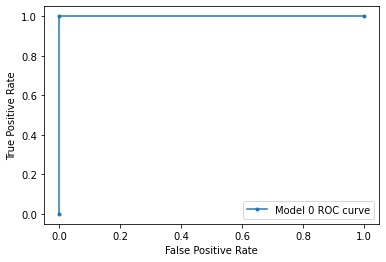

In [186]:
# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_tree_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

dt0_fpr, dt0_tpr, _ = roc_curve(test_Y0, test_tree_prediction0)

# plot the roc curve for the model
plt.plot(dt0_fpr, dt0_tpr, marker='.', label='Model 0 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


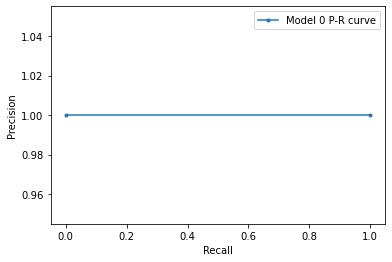

In [187]:
# Precision-Recall Curve
dt0_precision, dt0_recall, _ = precision_recall_curve(test_Y0, test_tree_prediction0)
F1_Score0 = f1_score(test_Y0, test_tree_prediction0) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score0, auc0))

# plot the precision-recall curves
plt.plot(dt0_recall, dt0_precision, marker='.', label='Model 0 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### VALIDATION STRATEGY

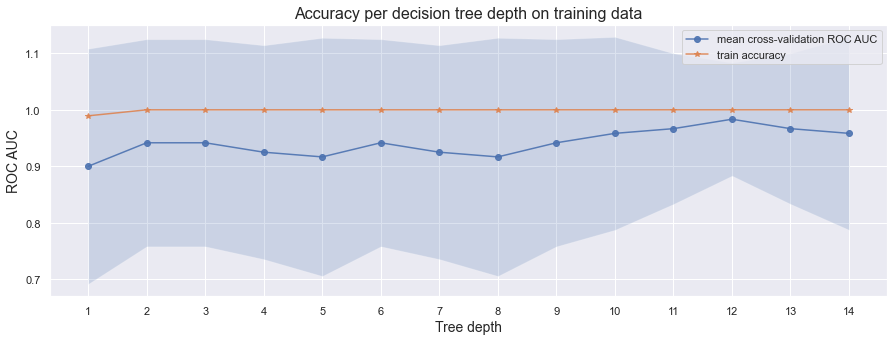

In [188]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation ROC AUC', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('ROC AUC', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X0, train_Y0, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [189]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-12 tree achieves the best mean cross-validation accuracy 98.33333 +/- 5.0% on training dataset


In [190]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Train Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(train_X0, train_Y0, 
                                                                          test_X0, test_Y0, 
                                                                          sm_best_tree_depth)

Single tree depth:  12
Accuracy, Train Set:  100.0 %
Accuracy, Test Set:  100.0 %


In [191]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Test Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Validation Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(test_X0, test_Y0, 
                                                                          validation_X0, validation_Y0, 
                                                                          sm_best_tree_depth)

Single tree depth:  12
Accuracy, Test Set:  100.0 %
Accuracy, Validation Set:  100.0 %


#### METHOD 1 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [140]:
## DATA 1 A

train_X1, test_X1, train_Y1, test_Y1 = train_test_split(X_df1_SMOTE, y_df1_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)

Magnitude of the descriptive training features: (161, 24)
Magnitude of the target training features: (161,)

Magnitude of the descriptive test features: (69, 24)
Magnitude of the target test features: (69,)


**SPLITTING DATA: TRAIN + TEST**

In [141]:
## DATA 1 A

train_X1a, test_X1a, train_Y1a, test_Y1a = train_test_split(X_df1a_SMOTE, y_df1_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1a.shape)
print("Magnitude of the target training features:", train_Y1a.shape)
print("\nMagnitude of the descriptive test features:", test_X1a.shape)
print("Magnitude of the target test features:", test_Y1a.shape)

Magnitude of the descriptive training features: (161, 20)
Magnitude of the target training features: (161,)

Magnitude of the descriptive test features: (69, 20)
Magnitude of the target test features: (69,)


In [142]:
## DATA 1 B

train_X1b, test_X1b, train_Y1b, test_Y1b = train_test_split(X_df1b_SMOTE, y_df1_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1b.shape)
print("Magnitude of the target training features:", train_Y1b.shape)
print("\nMagnitude of the descriptive test features:", test_X1b.shape)
print("Magnitude of the target test features:", test_Y1b.shape)

Magnitude of the descriptive training features: (161, 11)
Magnitude of the target training features: (161,)

Magnitude of the descriptive test features: (69, 11)
Magnitude of the target test features: (69,)


In [143]:
## DATA 1 C

train_X1c, test_X1c, train_Y1c, test_Y1c = train_test_split(X_df1c_SMOTE, y_df1_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1c.shape)
print("Magnitude of the target training features:", train_Y1c.shape)
print("\nMagnitude of the descriptive test features:", test_X1c.shape)
print("Magnitude of the target test features:", test_Y1c.shape)

Magnitude of the descriptive training features: (161, 24)
Magnitude of the target training features: (161,)

Magnitude of the descriptive test features: (69, 24)
Magnitude of the target test features: (69,)


In [144]:
## DATA 1 D

train_X1d, test_X1d, train_Y1d, test_Y1d = train_test_split(X_df1d_SMOTE, y_df1_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1d.shape)
print("Magnitude of the target training features:", train_Y1d.shape)
print("\nMagnitude of the descriptive test features:", test_X1d.shape)
print("Magnitude of the target test features:", test_Y1d.shape)

Magnitude of the descriptive training features: (161, 24)
Magnitude of the target training features: (161,)

Magnitude of the descriptive test features: (69, 24)
Magnitude of the target test features: (69,)


In [146]:
# Fitting the decision tree
classification_tree.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_tree_prediction1 = classification_tree.predict(train_X1)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
classification_tree.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = classification_tree.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:{}'. format(classification_tree.score(test_X1, test_Y1)))


# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_tree_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[38  0]
 [ 3 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.90      0.95        31

    accuracy                           0.96        69
   macro avg       0.96      0.95      0.96        69
weighted avg       0.96      0.96      0.96        69

Accuracy Score on test data:0.9565217391304348
AUC for our sample data is 0.952
Sensitivity Score on test data

In [147]:
# Fitting the decision tree
classification_tree.fit(train_X1a, train_Y1a)

# Performance of the tree on the train data
train_tree_prediction1a = classification_tree.predict(train_X1a)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, train_tree_prediction1a))

print('\nClassification Report:')
print(classification_report(train_Y1a, train_tree_prediction1a))

print('Accuracy Score on train data:')
classification_tree.score(train_X1a, train_Y1a)

# Performance of the tree on the test data
test_tree_prediction1a = classification_tree.predict(test_X1a)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, test_tree_prediction1a))

print('\nClassification Report:')
print(classification_report(test_Y1a, test_tree_prediction1a))

print('Accuracy Score on test data:')
classification_tree.score(test_X1a, test_Y1a)

recall_sensitivity = metrics.recall_score(test_Y1a, test_tree_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, test_tree_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[38  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy Score on test data:
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


AUC for our sample data is 1.0


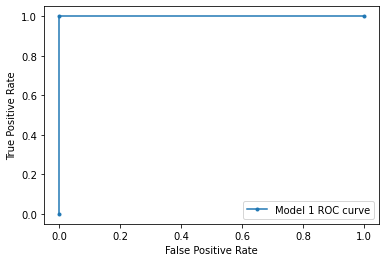

In [271]:
# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, test_tree_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

dt1_fpr, dt1_tpr, _ = roc_curve(test_Y1a, test_tree_prediction1a)

# plot the roc curve for the model
plt.plot(dt1_fpr, dt1_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


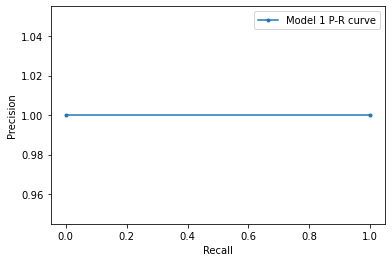

In [287]:
# Precision-Recall Curve
dt1_precision, dt1_recall, _ = precision_recall_curve(test_Y1a, test_tree_prediction1a)
F1_Score1 = f1_score(test_Y1a, test_tree_prediction1a) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score1, auc1a))

# plot the precision-recall curves
plt.plot(dt1_recall, dt1_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [148]:
# Fitting classifier
classification_tree.fit(train_X1b, train_Y1b)

# Performance of the tree on the train data
train_tree_prediction1b = classification_tree.predict(train_X1b)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, train_tree_prediction1b))

print('\nClassification Report:')
print(classification_report(train_Y1b, train_tree_prediction1b))

print('Accuracy Score on train data:')
classification_tree.score(train_X1b, train_Y1b)

# Performance of the tree on the test data
test_tree_prediction1b = classification_tree.predict(test_X1b)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, test_tree_prediction1b))

print('\nClassification Report:')
print(classification_report(test_Y1b, test_tree_prediction1b))

print('Accuracy Score on test data:')
classification_tree.score(test_X1b, test_Y1b)

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, test_tree_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, test_tree_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, test_tree_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[38  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

## Feature selection using wrapper methods: Sequential Feature Selection

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. 

### Backward Elimination

In [160]:
backward_sfs = SequentialFeatureSelector(classification_tree, n_features_to_select=0.8, 
                          direction='backward', scoring= 'accuracy', cv=5, n_jobs=-1).fit(X_df1c_SMOTE, y_df1_SMOTE)

In [171]:
backward_sfs = SFS(classification_tree, 
           k_features=(5,24), 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=5, n_jobs=-1)

backward_sfs = backward_sfs.fit(X_df1c_SMOTE, y_df1_SMOTE)

In [172]:
print('\nSequential Backward Selection (k=5 to k=24):')
print(backward_sfs.k_feature_idx_)
print('CV Score:')
print(backward_sfs.k_score_)


Sequential Backward Selection (k=5 to k=24):
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
CV Score:
1.0


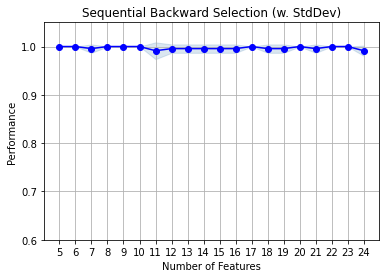

In [180]:
fig = plot_sfs(backward_sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1.05])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# Keep the selected features only
X_df3c_SMOTE = X_df3c_SMOTE.loc[:, feature_names[backward_sfs.get_support()]]

### Forward Elimination

In [176]:
forward_sfs = SFS(classification_tree, 
           k_features=(5,24), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5, n_jobs=-1)

forward_sfs = forward_sfs.fit(X_df1d_SMOTE, y_df1_SMOTE)

In [177]:
print('\nSequential Backward Selection (k=5 to k=24):')
print(forward_sfs.k_feature_idx_)
print('CV Score:')
print(forward_sfs.k_score_)


Sequential Backward Selection (k=5 to k=24):
(0, 1, 2, 3, 4)
CV Score:
0.9956521739130434


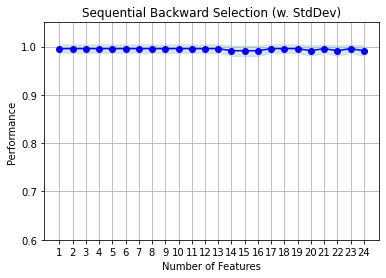

In [179]:
fig = plot_sfs(forward_sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1.05])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# Keep the selected features only
X_df3d_SMOTE = X_df3d_SMOTE.loc[:, feature_names[forward_sfs.get_support()]]

#### METHOD 2  DATA


In [149]:
kidney_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 3 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      209 non-null    float64 
 1   blood_pressure           209 non-null    float64 
 2   specific_gravity         209 non-null    float64 
 3   albumin                  209 non-null    float64 
 4   sugar                    209 non-null    float64 
 5   pus_cell                 209 non-null    category
 6   pus_cell_clumps          209 non-null    category
 7   bacteria                 209 non-null    category
 8   blood_glucose_random     209 non-null    float64 
 9   blood_urea               209 non-null    float64 
 10  serum_creatinine         209 non-null    float64 
 11  sodium                   209 non-null    float64 
 12  potassium                209 non-null    float64 
 13  hemoglobin               209 non-null    float64 
 14  packed_cel

In [150]:
# No data transformations except missing data removed
train_X0a, test_X0a, train_Y0a, test_Y0a = train_test_split(X_df2, y_df2, test_size=0.3, random_state=1234)

print("\nMagnitude of the descriptive training features:", train_X0a.shape)
print("Magnitude of the target training features:", train_Y0a.shape)
print("\nMagnitude of the descriptive test features:", test_X0a.shape)
print("Magnitude of the target test features:", test_Y0a.shape)


Magnitude of the descriptive training features: (146, 21)
Magnitude of the target training features: (146,)

Magnitude of the descriptive test features: (63, 21)
Magnitude of the target test features: (63,)


In [151]:
# Oversampled data only 
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_df2_SMOTE, y_df2_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)

Magnitude of the descriptive training features: (165, 21)
Magnitude of the target training features: (165,)

Magnitude of the descriptive test features: (71, 21)
Magnitude of the target test features: (71,)


Data that has undergone feature selection and oversampling of the majority class

In [152]:
train_X2a, test_X2a, train_Y2a, test_Y2a = train_test_split(X_df2a_SMOTE, y_df2_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2a.shape)
print("Magnitude of the target training features:", train_Y2a.shape)
print("\nMagnitude of the descriptive test features:", test_X2a.shape)
print("Magnitude of the target test features:", test_Y2a.shape)

Magnitude of the descriptive training features: (165, 20)
Magnitude of the target training features: (165,)

Magnitude of the descriptive test features: (71, 20)
Magnitude of the target test features: (71,)


In [153]:
train_X2b, test_X2b, train_Y2b, test_Y2b = train_test_split(X_df2b_SMOTE, y_df2_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2b.shape)
print("Magnitude of the target training features:", train_Y2b.shape)
print("\nMagnitude of the descriptive test features:", test_X2b.shape)
print("Magnitude of the target test features:", test_Y2b.shape)

Magnitude of the descriptive training features: (165, 6)
Magnitude of the target training features: (165,)

Magnitude of the descriptive test features: (71, 6)
Magnitude of the target test features: (71,)


In [ ]:
train_X2c, test_X2c, train_Y2c, test_Y2c = train_test_split(X_df2c_SMOTE, y_df2_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2c.shape)
print("Magnitude of the target training features:", train_Y2c.shape)
print("\nMagnitude of the descriptive test features:", test_X2c.shape)
print("Magnitude of the target test features:", test_Y2c.shape)

In [ ]:
train_X2d, test_X2d, train_Y2d, test_Y2d = train_test_split(X_df2d_SMOTE, y_df2_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2d.shape)
print("Magnitude of the target training features:", train_Y2d.shape)
print("\nMagnitude of the descriptive test features:", test_X2d.shape)
print("Magnitude of the target test features:", test_Y2d.shape)

In [154]:
# Fitting the decision tree
classification_tree.fit(train_X0a, train_Y0a)

# Performance of the tree on the train data
train_tree_prediction0a = classification_tree.predict(train_X0a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0a, train_tree_prediction0a))

print('\nClassification Report:')
print(classification_report(train_Y0a, train_tree_prediction0a))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X0a, train_Y0a)))


# Performance of the tree on the test data
test_tree_prediction0a = classification_tree.predict(test_X0a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0a, test_tree_prediction0a))

print('\nClassification Report:')
print(classification_report(test_Y0a, test_tree_prediction0a))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X0a, test_Y0a)))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, test_tree_prediction0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, test_tree_prediction0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, test_tree_prediction0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[79  0]
 [ 0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        67

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[39  0]
 [ 0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        24

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Spec

In [155]:
# Fitting the decision tree
classification_tree.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = classification_tree.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = classification_tree.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2, test_Y2)))

recall_sensitivity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[36  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

In [156]:
# Fitting the decision tree
classification_tree.fit(train_X2a, train_Y2a)

# Performance of the tree on the train data
train_tree_prediction2a = classification_tree.predict(train_X2a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2a, train_tree_prediction2a))

print('\nClassification Report:')
print(classification_report(train_Y2a, train_tree_prediction2a))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2a, train_Y2a)))


# Performance of the tree on the test data
test_tree_prediction2a = classification_tree.predict(test_X2a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2a, test_tree_prediction2a))

print('\nClassification Report:')
print(classification_report(test_Y2a, test_tree_prediction2a))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2a, test_Y2a)))

recall_sensitivity = metrics.recall_score(test_Y2a, test_tree_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, test_tree_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[36  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

AUC for our sample data is 1.0


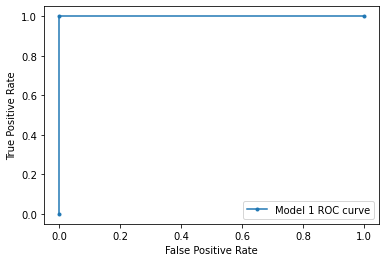

In [292]:
# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, test_tree_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

dt2_fpr, dt2_tpr, _ = roc_curve(test_Y2a, test_tree_prediction2a)

# plot the roc curve for the model
plt.plot(dt2_fpr, dt2_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


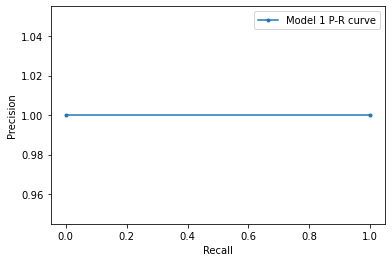

In [293]:
# Precision-Recall Curve
dt2_precision, dt2_recall, _ = precision_recall_curve(test_Y2a, test_tree_prediction2a)
F1_Score2 = f1_score(test_Y2a, test_tree_prediction2a) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score2, auc2a))

# plot the precision-recall curves
plt.plot(dt2_recall, dt2_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [157]:
# Fitting the decision tree
classification_tree.fit(train_X2b, train_Y2b)

# Performance of the tree on the train data
train_tree_prediction2b = classification_tree.predict(train_X2b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2b, train_tree_prediction2b))

print('\nClassification Report:')
print(classification_report(train_Y2b, train_tree_prediction2b))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2b, train_Y2b)))


# Performance of the tree on the test data
test_tree_prediction2b = classification_tree.predict(test_X2b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2b, test_tree_prediction2b))

print('\nClassification Report:')
print(classification_report(test_Y2b, test_tree_prediction2b))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2b, test_Y2b)))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, test_tree_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, test_tree_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, test_tree_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[36  0]
 [ 1 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        35

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71

Accuracy Score on test data: 0.9859154929577465
AUC for our sample data is 0.986
Sensitivity Score on te

#### METHOD 3 CLEAN DATA


In [158]:
train_X0b, test_X0b, train_Y0b, test_Y0b = train_test_split(X_df3, y_df3, test_size=0.3, random_state=1234)

print("\nMagnitude of the descriptive training features:", train_X0b.shape)
print("Magnitude of the target training features:", train_Y0b.shape)
print("\nMagnitude of the descriptive test features:", test_X0b.shape)
print("Magnitude of the target test features:", test_Y0b.shape)


Magnitude of the descriptive training features: (280, 21)
Magnitude of the target training features: (280,)

Magnitude of the descriptive test features: (120, 21)
Magnitude of the target test features: (120,)


In [159]:
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(X_df3_SMOTE, y_df3_SMOTE, test_size=0.3, random_state=1234)

print("\nMagnitude of the descriptive training features:", train_X3.shape)
print("Magnitude of the target training features:", train_Y3.shape)
print("\nMagnitude of the descriptive test features:", test_X3.shape)
print("Magnitude of the target test features:", test_Y3.shape)


Magnitude of the descriptive training features: (350, 21)
Magnitude of the target training features: (350,)

Magnitude of the descriptive test features: (150, 21)
Magnitude of the target test features: (150,)


Data that has undergone feature selection and oversampling of the majority class

In [160]:
train_X3a, test_X3a, train_Y3a, test_Y3a = train_test_split(X_df3a_SMOTE, y_df3_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X3a.shape)
print("Magnitude of the target training features:", train_Y3a.shape)
print("\nMagnitude of the descriptive test features:", test_X3a.shape)
print("Magnitude of the target test features:", test_Y3a.shape)

Magnitude of the descriptive training features: (350, 20)
Magnitude of the target training features: (350,)

Magnitude of the descriptive test features: (150, 20)
Magnitude of the target test features: (150,)


In [161]:
train_X3b, test_X3b, train_Y3b, test_Y3b = train_test_split(X_df3b_SMOTE, y_df3_SMOTE, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X3b.shape)
print("Magnitude of the target training features:", train_Y3b.shape)
print("\nMagnitude of the descriptive test features:", test_X3b.shape)
print("Magnitude of the target test features:", test_Y3b.shape)

Magnitude of the descriptive training features: (350, 8)
Magnitude of the target training features: (350,)

Magnitude of the descriptive test features: (150, 8)
Magnitude of the target test features: (150,)


In [162]:
# Fitting the decision tree
classification_tree.fit(train_X0b, train_Y0b)

# Performance of the tree on the train data
train_tree_prediction0b = classification_tree.predict(train_X0b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0b, train_tree_prediction0b))

print('\nClassification Report:')
print(classification_report(train_Y0b, train_tree_prediction0b))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X0b, train_Y0b)))


# Performance of the tree on the test data
test_tree_prediction0b = classification_tree.predict(test_X0b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0b, test_tree_prediction0b))

print('\nClassification Report:')
print(classification_report(test_Y0b, test_tree_prediction0b))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X0b, test_Y0b)))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, test_tree_prediction0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, test_tree_prediction0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, test_tree_prediction0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[109   0]
 [  0 171]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       171

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[40  1]
 [ 3 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        79

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120

Accuracy Score on test data: 0.9666666666666667
AUC for our sample data is 0.969
Sensitivity Score o

In [163]:
# Fitting the decision tree
classification_tree.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_tree_prediction3 = classification_tree.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_tree_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_tree_prediction3))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_tree_prediction3 = classification_tree.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_tree_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_tree_prediction3))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_tree_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[174   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       176

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[74  2]
 [ 2 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.97      0.97      0.97        74

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy Score on test data: 0.9733333333333334
AUC for our sample data is 0.973
Sensitivity Score o

In [164]:
# Fitting the decision tree
classification_tree.fit(train_X3a, train_Y3a)

# Performance of the tree on the train data
train_tree_prediction3a = classification_tree.predict(train_X3a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3a, train_tree_prediction3a))

print('\nClassification Report:')
print(classification_report(train_Y3a, train_tree_prediction3a))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3a, train_Y3a)))


# Performance of the tree on the test data
test_tree_prediction3a = classification_tree.predict(test_X3a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3a, test_tree_prediction3a))

print('\nClassification Report:')
print(classification_report(test_Y3a, test_tree_prediction3a))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3a, test_Y3a)))

recall_sensitivity = metrics.recall_score(test_Y3a, test_tree_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_tree_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[176   0]
 [  0 174]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       174

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[74  0]
 [ 1 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.99      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy Score on test data: 0.9933333333333333
Sensitivity Score on test data: 0.9868421052631579
S

AUC for our sample data is 0.993


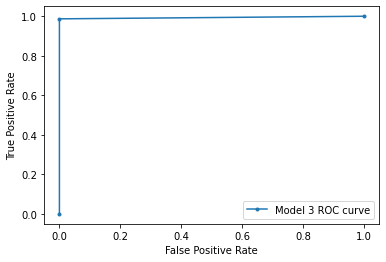

In [298]:
# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, test_tree_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

dt3_fpr, dt3_tpr, _ = roc_curve(test_Y3a, test_tree_prediction3a)

# plot the roc curve for the model
plt.plot(dt3_fpr, dt3_tpr, marker='.', label='Model 3 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=0.993 AUC=0.993


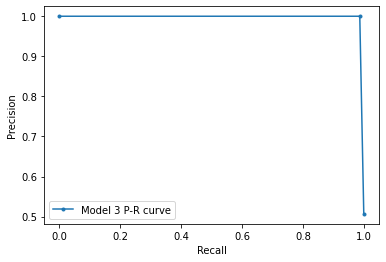

In [299]:
# Precision-Recall Curve
dt3_precision, dt3_recall, _ = precision_recall_curve(test_Y3a, test_tree_prediction3a)
F1_Score3 = f1_score(test_Y3a, test_tree_prediction3a) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score3, auc3a))

# plot the precision-recall curves
plt.plot(dt3_recall, dt3_precision, marker='.', label='Model 3 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [165]:
# Fitting the decision tree
classification_tree.fit(train_X3b, train_Y3b)

# Performance of the tree on the train data
train_tree_prediction3b = classification_tree.predict(train_X3b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3b, train_tree_prediction3b))

print('\nClassification Report:')
print(classification_report(train_Y3b, train_tree_prediction3b))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3b, train_Y3b)))


# Performance of the tree on the test data
test_tree_prediction3b = classification_tree.predict(test_X3b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3b, test_tree_prediction3b))

print('\nClassification Report:')
print(classification_report(test_Y3b, test_tree_prediction3b))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3b, test_Y3b)))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, test_tree_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[176   0]
 [  0 174]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       174

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[74  0]
 [ 1 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.99      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy Score on test data: 0.9933333333333333
AUC for our sample data is 0.993
Sensitivity Score o

## ALGORITHM: Random Forest

In [167]:
random_forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,random_state=1) 

In [168]:
# Fitting the decision tree
random_forest.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_rf_prediction0 = random_forest.predict(train_X0)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_rf_prediction0))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_rf_prediction0 = random_forest.predict(test_X0)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_rf_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_rf_prediction0))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X0, test_Y0)))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_rf_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, test_rf_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_rf_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[77  0]
 [ 0 33]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        33

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[38  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score

AUC for our sample data is 1.0


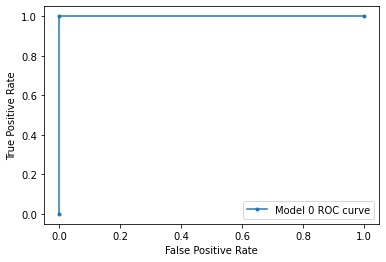

In [303]:
# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_rf_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

rf0_fpr, rf0_tpr, _ = roc_curve(test_Y0, test_rf_prediction0)

# plot the roc curve for the model
plt.plot(rf0_fpr, rf0_tpr, marker='.', label='Model 0 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


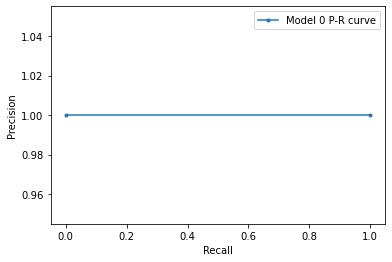

In [304]:
# Precision-Recall Curve
rf0_precision, rf0_recall, _ = precision_recall_curve(test_Y0, test_rf_prediction0)
F1_Score0 = f1_score(test_Y0, test_rf_prediction0) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score0, auc0))

# plot the precision-recall curves
plt.plot(rf0_recall, rf0_precision, marker='.', label='Model 0 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [203]:
# define search space
space = dict()
space['n_estimators'] = [100, 200, 300, 400, 500]
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [4, 6, 8, 10, 12]
space['max_features'] = ['sqrt', 'log2', None]

rfc0 = RandomForestClassifier(bootstrap = True, oob_score = True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_cv = GridSearchCV(rfc0, space, cv=cv, scoring= 'roc_auc')
rfc_cv.fit(train_X0, train_Y0)

# summarize result
print("Random Forest GridSearch score: "+str(rfc_cv.best_score_))
print("Random Forest GridSearch params: ")
print(rfc_cv.best_params_)

Logistic Regression GridSearch score: 1.0
Logistic Regression GridSearch params: 
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


#### METHOD 1 CLEAN DATA


Data that has undergone oversampling of the majority class

In [169]:
# Fitting the decision tree
random_forest.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_rf_prediction1 = random_forest.predict(train_X1)

print("Random forest performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_rf_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_rf_prediction1))

print('Accuracy Score on train data:')
random_forest.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_rf_prediction1 = random_forest.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_rf_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_rf_prediction1))

print('Accuracy Score on test data:')
random_forest.score(test_X1, test_Y1)

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_rf_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[38  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

Data that has undergone feature selection and oversampling of the majority class

In [170]:
# Fitting the decision tree
random_forest.fit(train_X1a, train_Y1a)

# Performance of the tree on the train data
train_rf_prediction1a = random_forest.predict(train_X1a)

print("Random forest performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, train_rf_prediction1a))

print('\nClassification Report:')
print(classification_report(train_Y1a, train_rf_prediction1a))

print('Accuracy Score on train data:')
random_forest.score(train_X1a, train_Y1a)

# Performance of the tree on the test data
test_rf_prediction1a = random_forest.predict(test_X1a)

print("\n\nRandom forest performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, test_rf_prediction1a))

print('\nClassification Report:')
print(classification_report(test_Y1a, test_rf_prediction1a))

print('Accuracy Score on test data:')
random_forest.score(test_X1a, test_Y1a)

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, test_rf_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, test_rf_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, test_rf_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Random forest performance on test data
Confusion Matrix:
[[38  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

AUC for our sample data is 1.0


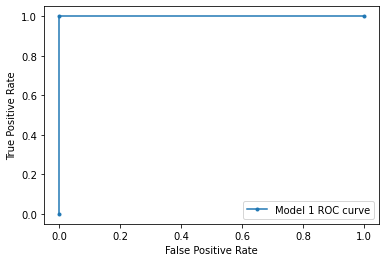

In [306]:
rf1_fpr, rf1_tpr, _ = roc_curve(test_Y1a, test_rf_prediction1a)

# plot the roc curve for the model
plt.plot(rf1_fpr, rf1_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


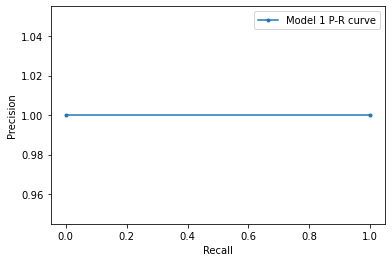

In [307]:
# Precision-Recall Curve
rf1_precision, rf1_recall, _ = precision_recall_curve(test_Y1a, test_rf_prediction1a)
F1_Score1 = f1_score(test_Y1a, test_tree_prediction1a) 

# summarize scores
print('Random forest Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score1, auc1a))

# plot the precision-recall curves
plt.plot(rf1_recall, rf1_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [171]:
# Fitting the decision tree
random_forest.fit(train_X1b, train_Y1b)

# Performance of the tree on the train data
train_rf_prediction1b = random_forest.predict(train_X1b)

print("Random forest performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, train_rf_prediction1b))

print('\nClassification Report:')
print(classification_report(train_Y1b, train_rf_prediction1b))

print('Accuracy Score on train data:')
random_forest.score(train_X1b, train_Y1b)

# Performance of the tree on the test data
test_rf_prediction1b = random_forest.predict(test_X1b)

print("\n\nRandom forest performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, test_rf_prediction1b))

print('\nClassification Report:')
print(classification_report(test_Y1b, test_rf_prediction1b))

print('Accuracy Score on test data:')
random_forest.score(test_X1b, test_Y1b)

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, test_rf_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, test_rf_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, test_rf_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Accuracy Score on train data:


Random forest performance on test data
Confusion Matrix:
[[38  0]
 [ 0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

#### METHOD 2 CLEAN DATA


Data that has undergone removal of missing values only

In [172]:
# Fitting the decision tree
random_forest.fit(train_X0a, train_Y0a)

# Performance of the tree on the train data
train_rf_prediction0a = random_forest.predict(train_X0a)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0a, train_rf_prediction0a))

print('\nClassification Report:')
print(classification_report(train_Y0a, train_rf_prediction0a))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X0a, train_Y0a)))


# Performance of the tree on the test data
test_rf_prediction0a = random_forest.predict(test_X0a)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0a, test_rf_prediction0a))

print('\nClassification Report:')
print(classification_report(test_Y0a, test_rf_prediction0a))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X0a, test_Y0a)))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, test_rf_prediction0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, test_rf_prediction0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, test_rf_prediction0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[79  0]
 [ 0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        67

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[39  0]
 [ 0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        24

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score

Data that has undergone feature selection and oversampling of the majority class

In [173]:
# Fitting the decision tree
random_forest.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_rf_prediction2 = random_forest.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_rf_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_rf_prediction2))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_rf_prediction2 = random_forest.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_rf_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_rf_prediction2))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2, test_Y2)))


recall_sensitivity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[36  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

AUC for our sample data is 1.0


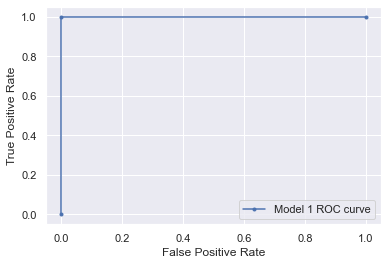

In [225]:
# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_rf_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

rf2_fpr, rf2_tpr, _ = roc_curve(test_Y2, test_rf_prediction2)

# plot the roc curve for the model
plt.plot(rf2_fpr, rf2_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


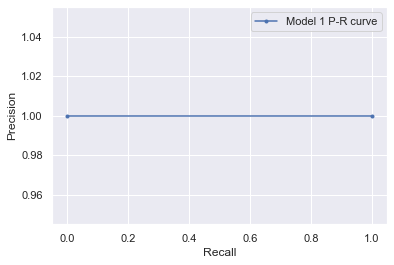

In [226]:
# Precision-Recall Curve
rf2_precision, rf2_recall, _ = precision_recall_curve(test_Y2, test_rf_prediction2)
F1_Score2 = f1_score(test_Y2, test_rf_prediction2) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score2, auc2))

# plot the precision-recall curves
plt.plot(rf2_recall, rf2_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [174]:
# Fitting the decision tree
random_forest.fit(train_X2a, train_Y2a)

# Performance of the tree on the train data
train_rf_prediction2a = random_forest.predict(train_X2a)

print("Random forest performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2a, train_rf_prediction2a))

print('\nClassification Report:')
print(classification_report(train_Y2a, train_rf_prediction2a))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2a, train_Y2a)))


# Performance of the tree on the test data
test_rf_prediction2a = random_forest.predict(test_X2a)

print("\n\nRandom forest performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2a, test_rf_prediction2a))

print('\nClassification Report:')
print(classification_report(test_Y2a, test_rf_prediction2a))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2a, test_Y2a)))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, test_rf_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, test_rf_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, test_rf_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Random forest performance on test data

Confusion Matrix:
[[36  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Spec

In [175]:
# Fitting the decision tree
random_forest.fit(train_X2b, train_Y2b)

# Performance of the tree on the train data
train_rf_prediction2b = random_forest.predict(train_X2b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2b, train_rf_prediction2b))

print('\nClassification Report:')
print(classification_report(train_Y2b, train_rf_prediction2b))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2b, train_Y2b)))


# Performance of the tree on the test data
test_rf_prediction2b = random_forest.predict(test_X2b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2b, test_rf_prediction2b))

print('\nClassification Report:')
print(classification_report(test_Y2b, test_rf_prediction2b))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2b, test_Y2b)))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, test_rf_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, test_rf_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, test_rf_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[82  0]
 [ 0 83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        83

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[36  0]
 [ 0 35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Spec

#### METHOD 3 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

Only missing values removed

In [176]:
# Fitting the decision tree
random_forest.fit(train_X0b, train_Y0b)

# Performance of the tree on the train data
train_rf_prediction0b = random_forest.predict(train_X0b)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0b, train_rf_prediction0b))

print('\nClassification Report:')
print(classification_report(train_Y0b, train_rf_prediction0b))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X0b, train_Y0b)))


# Performance of the tree on the test data
test_rf_prediction0b = random_forest.predict(test_X0b)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0b, test_rf_prediction0b))

print('\nClassification Report:')
print(classification_report(test_Y0b, test_rf_prediction0b))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X0b, test_Y0b)))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, test_rf_prediction0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, test_rf_prediction0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, test_rf_prediction0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[109   0]
 [  0 171]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       171

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[40  1]
 [ 1 78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        79

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Accuracy Score on test data: 0.9833333333333333
AUC for our sample data is 0.

In [177]:
# Fitting the decision tree
random_forest.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_rf_prediction3 = random_forest.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_rf_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_rf_prediction3))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_rf_prediction3 = random_forest.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_rf_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_rf_prediction3))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_rf_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[174   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       176

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[75  1]
 [ 0 74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.99      1.00      0.99        74

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy Score on test data: 0.9933333333333333
AUC for our sample data is 0.993
Sensitivity Score o

AUC for our sample data is 1.0


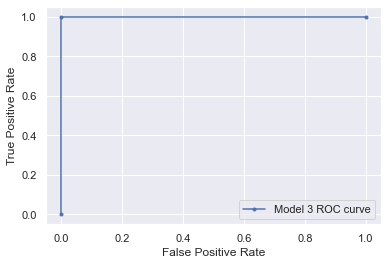

In [228]:
# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_rf_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

rf3_fpr, rf3_tpr, _ = roc_curve(test_Y3, test_rf_prediction3)

# plot the roc curve for the model
plt.plot(rf3_fpr, rf3_tpr, marker='.', label='Model 3 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


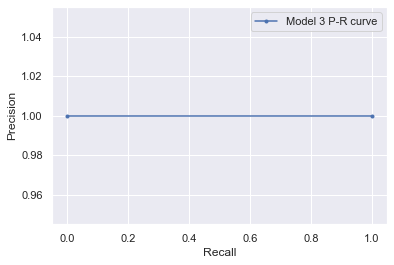

In [229]:
# Precision-Recall Curve
rf3_precision, rf3_recall, _ = precision_recall_curve(test_Y3, test_rf_prediction3)
F1_Score3 = f1_score(test_Y3, test_rf_prediction3) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score3, auc3))

# plot the precision-recall curves
plt.plot(rf3_recall, rf3_precision, marker='.', label='Model 3 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [178]:
# Fitting the decision tree
random_forest.fit(train_X3a, train_Y3a)

# Performance of the tree on the train data
train_rf_prediction3a = random_forest.predict(train_X3a)

print("Random forest performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3a, train_rf_prediction3a))

print('\nClassification Report:')
print(classification_report(train_Y3a, train_rf_prediction3a))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3a, train_Y3a)))


# Performance of the tree on the test data
test_rf_prediction3a = random_forest.predict(test_X3a)

print("\n\nRandom forest performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3a, test_rf_prediction3a))

print('\nClassification Report:')
print(classification_report(test_Y3a, test_rf_prediction3a))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3a, test_Y3a)))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, test_rf_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data

Confusion Matrix:
[[176   0]
 [  0 174]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       174

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Random forest performance on test data

Confusion Matrix:
[[74  0]
 [ 1 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.99      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy Score on test data: 0.9933333333333333
AUC for our sample data is 0.993
Sensitivity Score o

In [179]:
# Fitting the decision tree
random_forest.fit(train_X3b, train_Y3b)

# Performance of the tree on the train data
train_rf_prediction3b = random_forest.predict(train_X3b)

print("Random forest performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3b, train_rf_prediction3b))

print('\nClassification Report:')
print(classification_report(train_Y3b, train_rf_prediction3b))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3b, train_Y3b)))


# Performance of the tree on the test data
test_rf_prediction3b = random_forest.predict(test_X3b)

print("\n\nRandom forest performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3b, test_rf_prediction3b))

print('\nClassification Report:')
print(classification_report(test_Y3b, test_rf_prediction3b))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3b, test_Y3b)))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, test_rf_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, test_rf_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, test_rf_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random forest performance on training data

Confusion Matrix:
[[176   0]
 [  0 174]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       174

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Accuracy Score on train data: 1.0


Random forest performance on test data

Confusion Matrix:
[[74  0]
 [ 0 76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0


# ALGORITHM: K-NEAREST NEIGHBOUR

In [180]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0 = train_X0.values
x_test_k0 = test_X0.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0 = min_max_scaler.fit_transform(x_train_k0)
x_test_knorm0 = min_max_scaler.fit_transform(x_test_k0)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)


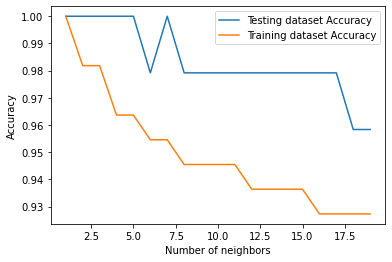

In [181]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0, train_Y0)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0, train_Y0)
    knn_test_accuracy[i] = knn.score(x_test_knorm0, test_Y0)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [182]:
# optimum value of k = 3

knn_3 = KNeighborsClassifier(n_neighbors=3)

knn_3.fit(x_train_knorm0, train_Y0)

# Predict on dataset which model has not seen before
knn_predict_train_0 = knn_3.predict(x_train_knorm0)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0, knn_predict_train_0))
print('\nClassification Report')
print(classification_report(train_Y0, knn_predict_train_0))
print("\nAccuracy Score on train set:")
print(knn_3.score(x_train_knorm0, train_Y0))
 
# Predict on dataset which model has not seen before
knn_predict_test0 = knn_3.predict(x_test_knorm0)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0, knn_predict_test0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict_test0))
print("\nAccuracy Score on test set:")
print(knn_3.score(x_test_knorm0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, knn_predict_test0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, knn_predict_test0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, knn_predict_test0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[77  0]
 [ 2 31]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.94      0.97        33

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110


Accuracy Score on train set:
0.9818181818181818
Confusion Matrix for Test data:
[[38  0]
 [ 0 10]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


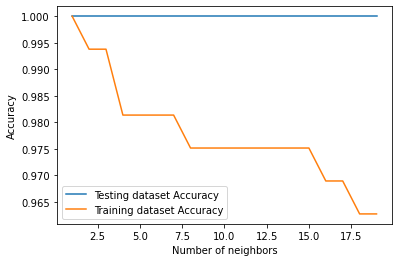

In [183]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1 = train_X1.values
x_test_k1 = test_X1.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1 = min_max_scaler.fit_transform(x_train_k1)
x_test_knorm1 = min_max_scaler.fit_transform(x_test_k1)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1, train_Y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1, train_Y1)
    knn_test_accuracy[i] = knn.score(x_test_knorm1, test_Y1)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [184]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1, train_Y1)

knn_train_predict1 = knn_5.predict(x_train_knorm1)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1, knn_train_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, knn_train_predict1))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1, train_Y1))
 
# Predict on dataset which model has not seen before
knn_predict_test1 = knn_5.predict(x_test_knorm1)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y1, knn_predict_test1))
print('\nClassification Report')
print(classification_report(test_Y1, knn_predict_test1))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, knn_predict_test1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, knn_predict_test1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, knn_predict_test1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[77  0]
 [ 3 81]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.96      0.98        84

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161


Accuracy Score on train set:
0.9813664596273292
Confusion Matrix for Test data:
[[38  0]
 [ 0 31]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


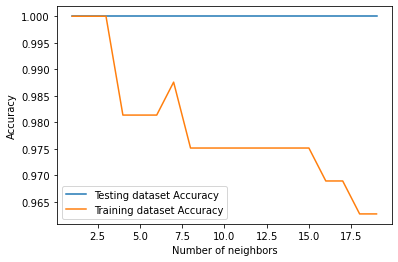

In [185]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1a = train_X1a.values
x_test_k1a = test_X1a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1a = min_max_scaler.fit_transform(x_train_k1a)
x_test_knorm1a = min_max_scaler.fit_transform(x_test_k1a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1a, train_Y1a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1a, train_Y1a)
    knn_test_accuracy[i] = knn.score(x_test_knorm1a, test_Y1a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [186]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1a, train_Y1a)

knn_train_predict1a = knn_5.predict(x_train_knorm1a)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1a, knn_train_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, knn_train_predict1a))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1a, train_Y1a))
 
# Predict on dataset which model has not seen before
knn_predict_test1a = knn_5.predict(x_test_knorm1a)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y1a, knn_predict_test1a))
print('\nClassification Report')
print(classification_report(test_Y1a, knn_predict_test1a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, knn_predict_test1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, knn_predict_test1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, knn_predict_test1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[77  0]
 [ 3 81]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.96      0.98        84

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161


Accuracy Score on train set:
0.9813664596273292
Confusion Matrix for Test data:
[[38  0]
 [ 0 31]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


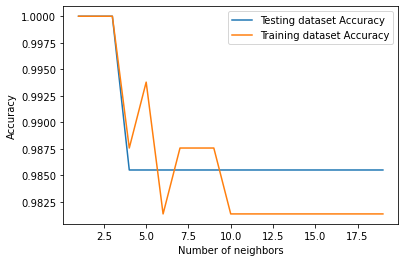

In [187]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1b = train_X1b.values
x_test_k1b = test_X1b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1b = min_max_scaler.fit_transform(x_train_k1b)
x_test_knorm1b = min_max_scaler.fit_transform(x_test_k1b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1b, train_Y1b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1b, train_Y1b)
    knn_test_accuracy[i] = knn.score(x_test_knorm1b, test_Y1b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [188]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1b, train_Y1b)

knn_train_predict1b = knn_5.predict(x_train_knorm1b)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1b, knn_train_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, knn_train_predict1b))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1b, train_Y1b))
 
# Predict on dataset which model has not seen before
knn_predict_test1b = knn_5.predict(x_test_knorm1b)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y1b, knn_predict_test1b))
print('\nClassification Report')
print(classification_report(test_Y1b, knn_predict_test1b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, knn_predict_test1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, knn_predict_test1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, knn_predict_test1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[77  0]
 [ 1 83]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.99      0.99        84

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161


Accuracy Score on train set:
0.9937888198757764
Confusion Matrix for Test data:
[[38  0]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        31

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69


Accuracy Score on test set:
0.9855072463768116
AUC for our sample data is 0.984
Sensitivity Score on test data: 0.967741935483871
Specificity Score

#### I2

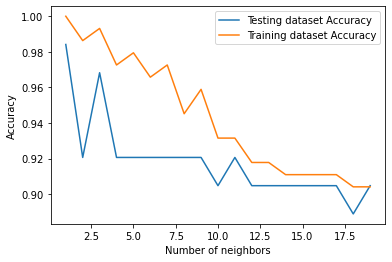

In [189]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0a = train_X0a.values
x_test_k0a = test_X0a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0a = min_max_scaler.fit_transform(x_train_k0a)
x_test_knorm0a = min_max_scaler.fit_transform(x_test_k0a)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0a, train_Y0a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0a, train_Y0a)
    knn_test_accuracy[i] = knn.score(x_test_knorm0a, test_Y0a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [190]:
# optimum value of k = 3

knn_3 = KNeighborsClassifier(n_neighbors=3)

knn_3.fit(x_train_knorm0a, train_Y0a)

# Predict on dataset which model has not seen before
knn_predict_train_0a = knn_3.predict(x_train_knorm0a)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0a, knn_predict_train_0a))
print('\nClassification Report')
print(classification_report(train_Y0a, knn_predict_train_0a))
print("\nAccuracy Score on train set:")
print(knn_3.score(x_train_knorm0a, train_Y0a))
 
# Predict on dataset which model has not seen before
knn_predict_test0a = knn_3.predict(x_test_knorm0a)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0a, knn_predict_test0a))
print('\nClassification Report')
print(classification_report(test_Y0a, knn_predict_test0a))
print("\nAccuracy Score on test set:")
print(knn_3.score(x_test_knorm0a, test_Y0a))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, knn_predict_test0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, knn_predict_test0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, knn_predict_test0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[79  0]
 [ 1 66]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      0.99        67

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146


Accuracy Score on train set:
0.9931506849315068
Confusion Matrix for Test data:
[[39  0]
 [ 2 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.92      0.96        24

    accuracy                           0.97        63
   macro avg       0.98      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63


Accuracy Score on test set:
0.9682539682539683
AUC for our sample data is 0.958
Sensitivity Score on test data: 0.9166666666666666
Specificity Scor

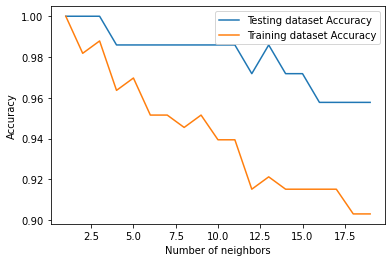

In [191]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2 = train_X2.values
x_test_k2 = test_X2.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2 = min_max_scaler.fit_transform(x_train_k2)
x_test_knorm2 = min_max_scaler.fit_transform(x_test_k2)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2, train_Y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2, train_Y2)
    knn_test_accuracy[i] = knn.score(x_test_knorm2, test_Y2)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [192]:
# optimum value of k = 3

knn_3 = KNeighborsClassifier(n_neighbors=3)
 
knn_3.fit(x_train_knorm2, train_Y2)

knn_train_predict2 = knn_3.predict(x_train_knorm2)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2, knn_train_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, knn_train_predict2))
print("\nAccuracy Score on train set:")
print(knn_3.score(x_train_knorm2, train_Y2))
 
# Predict on dataset which model has not seen before
knn_test_predict2 = knn_3.predict(x_test_knorm2)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y2, knn_test_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, knn_test_predict2))
print("\nAccuracy Score on test set:")
print(knn_3.score(x_test_knorm2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, knn_test_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[82  0]
 [ 2 81]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.98      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on train set:
0.9878787878787879
Confusion Matrix for Test data:
[[36  0]
 [ 0 35]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


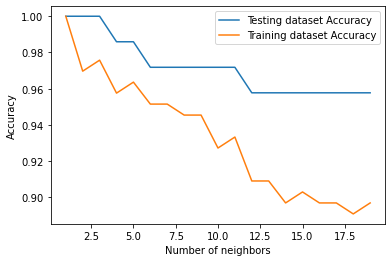

In [193]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2a = train_X2a.values
x_test_k2a = test_X2a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2a = min_max_scaler.fit_transform(x_train_k2a)
x_test_knorm2a = min_max_scaler.fit_transform(x_test_k2a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2a, train_Y2a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2a, train_Y2a)
    knn_test_accuracy[i] = knn.score(x_test_knorm2a, test_Y2a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [194]:
# optimum value of k = 3

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm2a, train_Y2a)

knn_train_predict2a = knn_5.predict(x_train_knorm2a)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2a, knn_train_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, knn_train_predict2a))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm2a, train_Y2a))
 
# Predict on dataset which model has not seen before
knn_test_predict2a = knn_5.predict(x_test_knorm2a)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y2a, knn_test_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, knn_test_predict2a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, knn_test_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, knn_test_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, knn_test_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[82  0]
 [ 6 77]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        82
           1       1.00      0.93      0.96        83

    accuracy                           0.96       165
   macro avg       0.97      0.96      0.96       165
weighted avg       0.97      0.96      0.96       165


Accuracy Score on train set:
0.9636363636363636
Confusion Matrix for Test data:
[[36  0]
 [ 1 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        35

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71


Accuracy Score on test set:
0.9859154929577465
AUC for our sample data is 0.986
Sensitivity Score on test data: 0.9714285714285714
Specificity Scor

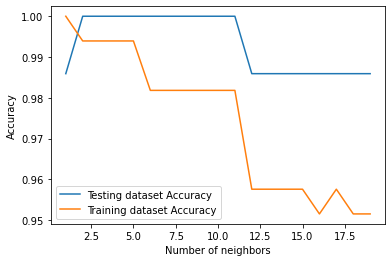

In [195]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2b = train_X2b.values
x_test_k2b = test_X2b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2b = min_max_scaler.fit_transform(x_train_k2b)
x_test_knorm2b = min_max_scaler.fit_transform(x_test_k2b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2b, train_Y2b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2b, train_Y2b)
    knn_test_accuracy[i] = knn.score(x_test_knorm2b, test_Y2b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [196]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm2b, train_Y2b)

knn_train_predict2b = knn_5.predict(x_train_knorm2b)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2b, knn_train_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, knn_train_predict2b))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm2b, train_Y2b))
 
# Predict on dataset which model has not seen before
knn_test_predict2b = knn_5.predict(x_test_knorm2b)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y2b, knn_test_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, knn_test_predict2b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, knn_test_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, knn_test_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, knn_test_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[82  0]
 [ 1 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.99      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on train set:
0.9939393939393939
Confusion Matrix for Test data:
[[36  0]
 [ 0 35]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### I3

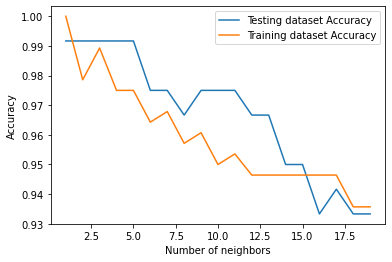

In [197]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0b = train_X0b.values
x_test_k0b = test_X0b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0b = min_max_scaler.fit_transform(x_train_k0b)
x_test_knorm0b = min_max_scaler.fit_transform(x_test_k0b)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0b, train_Y0b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0b, train_Y0b)
    knn_test_accuracy[i] = knn.score(x_test_knorm0b, test_Y0b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [198]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train_knorm0b, train_Y0b)

# Predict on dataset which model has not seen before
knn_predict_train_0b = knn_5.predict(x_train_knorm0b)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0b, knn_predict_train_0b))
print('\nClassification Report')
print(classification_report(train_Y0b, knn_predict_train_0b))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm0b, train_Y0b))
 
# Predict on dataset which model has not seen before
knn_predict_test0b = knn_5.predict(x_test_knorm0b)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y0b, knn_predict_test0b))
print('\nClassification Report')
print(classification_report(test_Y0b, knn_predict_test0b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm0b, test_Y0b))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, knn_predict_test0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, knn_predict_test0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, knn_predict_test0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[109   0]
 [  7 164]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       109
           1       1.00      0.96      0.98       171

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280


Accuracy Score on train set:
0.975
Confusion Matrix for Test data:
[[41  0]
 [ 1 78]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.99      0.99        79

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Accuracy Score on test set:
0.9916666666666667
AUC for our sample data is 0.994
Sensitivity Score on test data: 0.9873417721518988
Specificity Score on test

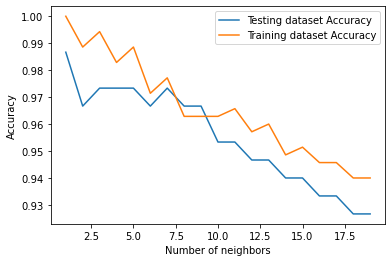

In [199]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3 = train_X3.values
x_test_k3 = test_X3.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3 = min_max_scaler.fit_transform(x_train_k3)
x_test_knorm3 = min_max_scaler.fit_transform(x_test_k3)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3, train_Y3)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3, train_Y3)
    knn_test_accuracy[i] = knn.score(x_test_knorm3, test_Y3)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [200]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3, train_Y3)

knn_train_predict3 = knn_5.predict(x_train_knorm3)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y3, knn_train_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, knn_train_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3, train_Y3))
 
# Predict on dataset which model has not seen before
knn_test_predict3 = knn_5.predict(x_test_knorm3)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y3, knn_test_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, knn_test_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, knn_test_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, knn_test_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, knn_test_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[174   0]
 [  4 172]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       174
           1       1.00      0.98      0.99       176

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350


Accuracy Score on test set:
0.9885714285714285
Confusion Matrix for Test data:
[[76  0]
 [ 4 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      0.95      0.97        74

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy Score on test set:
0.9733333333333334
AUC for our sample data is 0.973
Sensitivity Score on test data: 0.9459459459459459
Specificity S

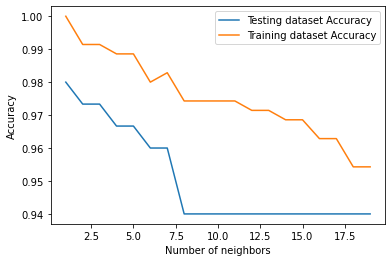

In [202]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3a = train_X3a.values
x_test_k3a = test_X3a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3a = min_max_scaler.fit_transform(x_train_k3a)
x_test_knorm3a = min_max_scaler.fit_transform(x_test_k3a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3a, train_Y3a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3a, train_Y3a)
    knn_test_accuracy[i] = knn.score(x_test_knorm3a, test_Y3a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [203]:
# optimum value of k = 7

knn_7 = KNeighborsClassifier(n_neighbors=7)
 
knn_7.fit(x_train_knorm3a, train_Y3a)

knn_train_predict3a = knn_7.predict(x_train_knorm3a)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y3a, knn_train_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, knn_train_predict3a))
print("\nAccuracy Score on test set:")
print(knn_7.score(x_train_knorm3a, train_Y3a))
 
# Predict on dataset which model has not seen before
knn_test_predict3a = knn_7.predict(x_test_knorm3a)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y3a, knn_test_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, knn_test_predict3a))
print("\nAccuracy Score on test set:")
print(knn_7.score(x_test_knorm3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, knn_test_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, knn_test_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, knn_test_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[176   0]
 [  6 168]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       176
           1       1.00      0.97      0.98       174

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350


Accuracy Score on test set:
0.9828571428571429
Confusion Matrix for Test data:
[[74  0]
 [ 6 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.92      0.96        76

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150


Accuracy Score on test set:
0.96
AUC for our sample data is 0.961
Sensitivity Score on test data: 0.9210526315789473
Specificity Score on test d

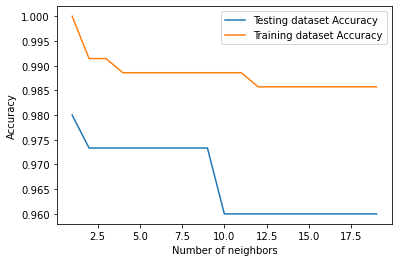

In [204]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3b = train_X3b.values
x_test_k3b = test_X3b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3b = min_max_scaler.fit_transform(x_train_k3b)
x_test_knorm3b = min_max_scaler.fit_transform(x_test_k3b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3b, train_Y3b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3b, train_Y3b)
    knn_test_accuracy[i] = knn.score(x_test_knorm3b, test_Y3b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [205]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3b, train_Y3b)

knn_train_predict3b = knn_5.predict(x_train_knorm3b)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y3b, knn_train_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, knn_train_predict3b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3b, train_Y3b))
 
# Predict on dataset which model has not seen before
knn_test_predict3b = knn_5.predict(x_test_knorm3b)

print('Confusion Matrix for Test data:')
print(confusion_matrix(test_Y3b, knn_test_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, knn_test_predict3b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, knn_test_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, knn_test_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, knn_test_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[176   0]
 [  4 170]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       176
           1       1.00      0.98      0.99       174

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350


Accuracy Score on test set:
0.9885714285714285
Confusion Matrix for Test data:
[[74  0]
 [ 4 72]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.95      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy Score on test set:
0.9733333333333334
AUC for our sample data is 0.974
Sensitivity Score on test data: 0.9473684210526315
Specificity S

# ALGORITHM: Logistic Regression

In [209]:
# Algorithm
lr_model0 = LogisticRegression()


lr_model0.fit(train_X0, train_Y0)

lr_predict0 = lr_model0.predict(train_X0)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_predict0))
print("\nAccuracy Score on test set:")
print(lr_model0.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
lr_predict0 = lr_model0.predict(test_X0)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, lr_predict0))
print("\nAccuracy Score on test set:")
print(lr_model0.score(test_X0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, lr_predict0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, lr_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, lr_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[77  0]
 [ 1 32]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.97      0.98        33

    accuracy                           0.99       110
   macro avg       0.99      0.98      0.99       110
weighted avg       0.99      0.99      0.99       110


Accuracy Score on test set:
0.990909090909091
Confusion Matrix for test data:
[[38  0]
 [ 0 10]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


Model evaluation and grid search

In [ ]:
# define model
lr_model0 = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores0 = cross_val_score(lr_model0, train_X0, train_Y0, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores0))

In [259]:
# define search space
space = dict()
space['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
space['tol'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
space['solver'] = ['liblinear', 'lbfgs']
space['max_iter'] = [50, 100, 150, 200, 250]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_cv = GridSearchCV(LogisticRegression(), space, cv=cv, scoring= 'roc_auc')
lr_cv.fit(train_X0, train_Y0)

# summarize result
print("Logistic Regression GridSearch score: "+str(lr_cv.best_score_))
print("Logistic Regression GridSearch params: ")
print(lr_cv.best_params_)

Logistic Regression GridSearch score: 1.0
Logistic Regression GridSearch params: 
{'C': 0.1, 'max_iter': 250, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}


In [262]:
# Algorithm
lr_model = LogisticRegression(solver = 'liblinear', tol = 0.1, penalty = 'l1', max_iter = 250, C = 0.1)

In [ ]:
# Dataframe baseline

In [263]:
lr_model.fit(train_X0, train_Y0)

LogisticRegression(C=0.1, max_iter=250, penalty='l1', solver='liblinear',
                   tol=0.1)

In [264]:
# Predict on dataset which model has not seen before
lr_predict0 = lr_model.predict(train_X0)

print('Confusion Matrix:')
print(confusion_matrix(train_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_predict0))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X0, train_Y0))

Confusion Matrix:
[[77  0]
 [ 2 31]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.94      0.97        33

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110


Accuracy Score on test set:
0.9818181818181818


In [ ]:
# Dataframe 1

In [210]:
# Algorithm
lr_model = LogisticRegression()

In [212]:
lr_model.fit(train_X1, train_Y1)

lr_predict1 = lr_model.predict(train_X1)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
lr_predict1 = lr_model.predict(test_X1)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, lr_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, lr_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, lr_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Accuracy Score on test set:
1.0
Confusion Matrix for test data:
[[38  0]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        31

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69


Accuracy Score on test set:
0.9855072463768116
AUC for our sample data is 0.984
Sensitivity Score on test data: 0.967741935483871
Specificity Score on test data: 1.0


In [213]:
lr_model.fit(train_X1a, train_Y1a)

lr_predict1a = lr_model.predict(train_X1a)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, lr_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, lr_predict1a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1a, train_Y1a))

# Predict on dataset which model has not seen before
lr_predict1a = lr_model.predict(test_X1a)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y1a, lr_predict1a))
print('\nClassification Report')
print(classification_report(test_Y1a, lr_predict1a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, lr_predict1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, lr_predict1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, lr_predict1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Accuracy Score on test set:
1.0
Confusion Matrix for test data:
[[38  0]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        31

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69


Accuracy Score on test set:
0.9855072463768116
AUC for our sample data is 0.984
Sensitivity Score on test data: 0.967741935483871
Specificity Score on test data: 1.0


In [214]:
lr_model.fit(train_X1b, train_Y1b)

lr_predict1b = lr_model.predict(train_X1b)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, lr_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, lr_predict1b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1b, train_Y1b))

# Predict on dataset which model has not seen before
lr_predict1b = lr_model.predict(test_X1b)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y1b, lr_predict1b))
print('\nClassification Report')
print(classification_report(test_Y1b, lr_predict1b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, lr_predict1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, lr_predict1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, lr_predict1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Accuracy Score on test set:
1.0
Confusion Matrix for test data:
[[38  0]
 [ 0 31]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [ ]:
# Dataframe 2

In [215]:
lr_model.fit(train_X0a, train_Y0a)

lr_predict0a = lr_model.predict(train_X0a)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y0a, lr_predict0a))
print('\nClassification Report')
print(classification_report(train_Y0a, lr_predict0a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X0a, train_Y0a))

# Predict on dataset which model has not seen before
lr_predict0a = lr_model.predict(test_X0a)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y0a, lr_predict0a))
print('\nClassification Report')
print(classification_report(test_Y0a, lr_predict0a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0a, test_Y0a))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, lr_predict0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, lr_predict0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, lr_predict0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[79  0]
 [ 1 66]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      0.99        67

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146


Accuracy Score on test set:
0.9931506849315068
Confusion Matrix for test data:
[[39  0]
 [ 1 23]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.96      0.98        24

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Accuracy Score on test set:
0.9841269841269841
AUC for our sample data is 0.979
Sensitivity Score on test data: 0.9583333333333334
Specificity Score

In [216]:
lr_model.fit(train_X2, train_Y2) # fitting baseline model

lr_predict2 = lr_model.predict(train_X2)

print('Confusion Matrix:')
print(confusion_matrix(train_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
lr_predict2 = lr_model.predict(test_X2)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, lr_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, lr_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, lr_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[82  0]
 [ 1 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.99      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on test set:
0.9939393939393939
Confusion Matrix for test data:
[[36  0]
 [ 1 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        35

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71


Accuracy Score on test set:
0.9859154929577465
AUC for our sample data is 0.986
Sensitivity Score on test data: 0.9714285714285714
Specificity Score on test data: 

In [217]:
lr_model.fit(train_X2a, train_Y2a) # fitting baseline model

lr_predict2a = lr_model.predict(train_X2a)

print('Confusion Matrix:')
print(confusion_matrix(train_Y2a, lr_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, lr_predict2a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2a, train_Y2a))

# Predict on dataset which model has not seen before
lr_predict2a = lr_model.predict(test_X2a)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y2a, lr_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, lr_predict2a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, lr_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, lr_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, lr_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[82  0]
 [ 1 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.99      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on test set:
0.9939393939393939
Confusion Matrix for test data:
[[36  0]
 [ 1 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        35

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71


Accuracy Score on test set:
0.9859154929577465
AUC for our sample data is 0.986
Sensitivity Score on test data: 0.9714285714285714
Specificity Score on test data: 

In [218]:
lr_model.fit(train_X2b, train_Y2b) # fitting baseline model

lr_predict2b = lr_model.predict(train_X2b)

print('Confusion Matrix:')
print(confusion_matrix(train_Y2b, lr_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, lr_predict2b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2b, train_Y2b))

# Predict on dataset which model has not seen before
lr_predict2b = lr_model.predict(test_X2b)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y2b, lr_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, lr_predict2b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, lr_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, lr_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, lr_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[82  0]
 [ 2 81]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.98      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on test set:
0.9878787878787879
Confusion Matrix for test data:
[[36  0]
 [ 2 33]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.94      0.97        35

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71


Accuracy Score on test set:
0.971830985915493
AUC for our sample data is 0.971
Sensitivity Score on test data: 0.9428571428571428
Specificity Score on test data: 1

In [ ]:
# Dataframe 3

In [219]:
lr_model.fit(train_X0b, train_Y0b)

lr_predict0b = lr_model.predict(train_X0b)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y0b, lr_predict0b))
print('\nClassification Report')
print(classification_report(train_Y0b, lr_predict0b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X0b, train_Y0b))

# Predict on dataset which model has not seen before
lr_predict0b = lr_model.predict(test_X0b)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y0b, lr_predict0b))
print('\nClassification Report')
print(classification_report(test_Y0b, lr_predict0b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0b, test_Y0b))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, lr_predict0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, lr_predict0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, lr_predict0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[108   1]
 [  3 168]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.99      0.98      0.99       171

    accuracy                           0.99       280
   macro avg       0.98      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280


Accuracy Score on test set:
0.9857142857142858
Confusion Matrix for test data:
[[40  1]
 [ 3 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        79

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120


Accuracy Score on test set:
0.9666666666666667
AUC for our sample data is 0.969
Sensitivity Score on test data: 0.9620253164556962
Specificity S

In [220]:
lr_model.fit(train_X3, train_Y3) # fitting baseline model

lr_predict3 = lr_model.predict(train_X3)

print('Confusion Matrix:')
print(confusion_matrix(train_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
lr_predict3 = lr_model.predict(test_X3)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, lr_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, lr_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, lr_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[173   1]
 [  3 173]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       174
           1       0.99      0.98      0.99       176

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350


Accuracy Score on test set:
0.9885714285714285
Confusion Matrix:
[[75  1]
 [ 6 68]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.99      0.92      0.95        74

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150


Accuracy Score on test set:
0.9533333333333334
AUC for our sample data is 0.953
Sensitivity Score on test data: 0.918918918918919
Specificity Score on test data: 0.986842105

In [221]:
lr_model.fit(train_X3a, train_Y3a) # fitting baseline model

lr_predict3a = lr_model.predict(train_X3a)

print('Confusion Matrix:')
print(confusion_matrix(train_Y3a, lr_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, lr_predict3a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3a, train_Y3a))

# Predict on dataset which model has not seen before
lr_predict3a = lr_model.predict(test_X3a)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3a, lr_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, lr_predict3a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, lr_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, lr_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, lr_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[175   1]
 [  4 170]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       176
           1       0.99      0.98      0.99       174

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350


Accuracy Score on test set:
0.9857142857142858
Confusion Matrix:
[[72  2]
 [ 3 73]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.97      0.96      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy Score on test set:
0.9666666666666667
AUC for our sample data is 0.967
Sensitivity Score on test data: 0.9605263157894737
Specificity Score on test data: 0.97297297

In [222]:
lr_model.fit(train_X3b, train_Y3b) # fitting baseline model

lr_predict3b = lr_model.predict(train_X3b)

print('Confusion Matrix:')
print(confusion_matrix(train_Y3b, lr_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, lr_predict3b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3b, train_Y3b))

# Predict on dataset which model has not seen before
lr_predict3b = lr_model.predict(test_X3b)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3b, lr_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, lr_predict3b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, lr_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, lr_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, lr_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[175   1]
 [  6 168]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       0.99      0.97      0.98       174

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350


Accuracy Score on test set:
0.98
Confusion Matrix:
[[74  0]
 [ 4 72]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.95      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy Score on test set:
0.9733333333333334
AUC for our sample data is 0.974
Sensitivity Score on test data: 0.9473684210526315
Specificity Score on test data: 1.0


# ALGORITHM: Support Vector Machines

Support vector machines can be catered to unbalanced data. In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters *class_weight and sample_weight* can be used.

SVM require scaled/normalized data as input.

In [223]:
svm_model =  svm.SVC()

In [224]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv0 = train_X0.values
x_test_sv0 = test_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0 = min_max_scaler.fit_transform(x_train_sv0)
x_test_svnorm0 = min_max_scaler.fit_transform(x_test_sv0)

In [225]:
# Baseline dataframe

# train the model on train set
svm_model.fit(x_train_svnorm0, train_Y0)
 
# print prediction results
print('Train data results:\n')
svm_prediction0 = svm_model.predict(x_train_svnorm0)
print(classification_report(train_Y0, svm_prediction0))

print('Test data results:\n')
svm_prediction0 = svm_model.predict(x_test_svnorm0)
print(classification_report(test_Y0, svm_prediction0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, svm_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        33

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [280]:
# Using grid search for hyper-parameter optimization

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True)
 
# fitting the model for grid search
grid.fit(x_train_svnorm0, train_Y0)

# print best parameter after tuning
print('Best parameters:')
print(grid.best_params_)
 
# a look at the model after hyper-parameter tuning
print('Best model estimation after hyper-parameter optimization')
print(grid.best_estimator_)

Best parameters:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best model estimation after hyper-parameter optimization
SVC(C=0.1, gamma=1)


In [226]:
# Dataframe 1

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1 = train_X1.values
x_test_sv1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1 = min_max_scaler.fit_transform(x_train_sv1)
x_test_svnorm1 = min_max_scaler.fit_transform(x_test_sv1)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1, train_Y1)
 
# print prediction results
print('Train data results:\n')
svm_prediction1 = svm_model.predict(x_train_svnorm1)
print(classification_report(train_Y1, svm_prediction1))

print('Test data results:\n')
svm_prediction1 = svm_model.predict(x_test_svnorm1)
print(classification_report(test_Y1, svm_prediction1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, svm_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [227]:
# Dataframe 1

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1a = train_X1a.values
x_test_sv1a = test_X1a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1a = min_max_scaler.fit_transform(x_train_sv1a)
x_test_svnorm1a = min_max_scaler.fit_transform(x_test_sv1a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1a, train_Y1a)
 
# print prediction results
print('Train data results:\n')
svm_prediction1a = svm_model.predict(x_train_svnorm1a)
print(classification_report(train_Y1a, svm_prediction1a))

print('Test data results:\n')
svm_prediction1a = svm_model.predict(x_test_svnorm1a)
print(classification_report(test_Y1a, svm_prediction1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, svm_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, svm_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, svm_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [228]:
# Dataframe 1

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1b = train_X1b.values
x_test_sv1b = test_X1b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1b = min_max_scaler.fit_transform(x_train_sv1b)
x_test_svnorm1b = min_max_scaler.fit_transform(x_test_sv1b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1b, train_Y1b)
 
# print prediction results
print('Train data results:\n')
svm_prediction1b = svm_model.predict(x_train_svnorm1b)
print(classification_report(train_Y1b, svm_prediction1b))

print('Test data results:\n')
svm_prediction1b = svm_model.predict(x_test_svnorm1b)
print(classification_report(test_Y1b, svm_prediction1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, svm_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, svm_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, svm_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


Dataframe 2

In [229]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv0a = train_X0a.values
x_test_sv0a = test_X0a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0a = min_max_scaler.fit_transform(x_train_sv0a)
x_test_svnorm0a = min_max_scaler.fit_transform(x_test_sv0a)

# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0a, train_Y0a)
 
# print prediction results
print('Train data results:\n')
svm_prediction0a = svm_model.predict(x_train_svnorm0a)
print(classification_report(train_Y0a, svm_prediction0a))

print('Test data results:\n')
svm_prediction0a = svm_model.predict(x_test_svnorm0a)
print(classification_report(test_Y0a, svm_prediction0a))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, svm_prediction0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, svm_prediction0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, svm_prediction0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.96      0.98        67

    accuracy                           0.98       146
   macro avg       0.98      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146

Test data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.96      0.98        24

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

AUC for our sample data is 0.979
Sensitivity Score on test data: 0.9583333333333334
Specificity Score on test data: 1.0


In [230]:
# Dataframe 2

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2 = train_X2.values
x_test_sv2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2 = min_max_scaler.fit_transform(x_train_sv2)
x_test_svnorm2 = min_max_scaler.fit_transform(x_test_sv2)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2, train_Y2)
 
# print prediction results
print('Train data results:\n')
svm_prediction2 = svm_model.predict(x_train_svnorm2)
print(classification_report(train_Y2, svm_prediction2))

print('Test data results:\n')
svm_prediction2 = svm_model.predict(x_test_svnorm2)
print(classification_report(test_Y2, svm_prediction2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, svm_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1       1.00      0.95      0.98        83

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [231]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2a = train_X2a.values
x_test_sv2a = test_X2a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2a = min_max_scaler.fit_transform(x_train_sv2a)
x_test_svnorm2a = min_max_scaler.fit_transform(x_test_sv2a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2a, train_Y2a)
 
# print prediction results
print('Train data results:\n')
svm_prediction2a = svm_model.predict(x_train_svnorm2a)
print(classification_report(train_Y2a, svm_prediction2a))

print('Test data results:\n')
svm_prediction2a = svm_model.predict(x_test_svnorm2a)
print(classification_report(test_Y2a, svm_prediction2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, svm_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, svm_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, svm_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       1.00      0.96      0.98        83

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [232]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2b = train_X2b.values
x_test_sv2b = test_X2b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2b = min_max_scaler.fit_transform(x_train_sv2b)
x_test_svnorm2b = min_max_scaler.fit_transform(x_test_sv2b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2b, train_Y2b)
 
# print prediction results
print('Train data results:\n')
svm_prediction2b = svm_model.predict(x_train_svnorm2b)
print(classification_report(train_Y2b, svm_prediction2b))

print('Test data results:\n')
svm_prediction2b = svm_model.predict(x_test_svnorm2b)
print(classification_report(test_Y2b, svm_prediction2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, svm_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, svm_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, svm_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.98      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


Dataframe 3

In [233]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv0b = train_X0b.values
x_test_sv0b = test_X0b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0b = min_max_scaler.fit_transform(x_train_sv0b)
x_test_svnorm0b = min_max_scaler.fit_transform(x_test_sv0b)

# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0b, train_Y0b)
 
# print prediction results
print('Train data results:\n')
svm_prediction0b = svm_model.predict(x_train_svnorm0b)
print(classification_report(train_Y0b, svm_prediction0b))

print('Test data results:\n')
svm_prediction0b = svm_model.predict(x_test_svnorm0b)
print(classification_report(test_Y0b, svm_prediction0b))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, svm_prediction0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, svm_prediction0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, svm_prediction0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       109
           1       1.00      0.96      0.98       171

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        79

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [234]:
# Dataframe 3

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3 = train_X3.values
x_test_sv3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3 = min_max_scaler.fit_transform(x_train_sv3)
x_test_svnorm3 = min_max_scaler.fit_transform(x_test_sv3)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3, train_Y3)
 
# print prediction results
print('Train data results:\n')
svm_prediction3 = svm_model.predict(x_train_svnorm3)
print(classification_report(train_Y3, svm_prediction3))

print('Test data results:\n')
svm_prediction3 = svm_model.predict(x_test_svnorm3)
print(classification_report(test_Y3, svm_prediction3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, svm_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       174
           1       1.00      0.96      0.98       176

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350

Test data results:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        74

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

AUC for our sample data is 0.993
Sensitivity Score on test data: 0.9864864864864865
Specificity Score on test data: 1.0


In [235]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3a = train_X3a.values
x_test_sv3a = test_X3a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3a = min_max_scaler.fit_transform(x_train_sv3a)
x_test_svnorm3a = min_max_scaler.fit_transform(x_test_sv3a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3a, train_Y3a)
 
# print prediction results
print('Train data results:\n')
svm_prediction3a = svm_model.predict(x_train_svnorm3a)
print(classification_report(train_Y3a, svm_prediction3a))

print('Test data results:\n')
svm_prediction3a = svm_model.predict(x_test_svnorm3a)
print(classification_report(test_Y3a, svm_prediction3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, svm_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, svm_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, svm_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       176
           1       1.00      0.98      0.99       174

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.95      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

AUC for our sample data is 0.974
Sensitivity Score on test data: 0.9473684210526315
Specificity Score on test data: 1.0


In [236]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3b = train_X3b.values
x_test_sv3b = test_X3b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3b = min_max_scaler.fit_transform(x_train_sv3b)
x_test_svnorm3b = min_max_scaler.fit_transform(x_test_sv3b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3b, train_Y3b)
 
# print prediction results
print('Train data results:\n')
svm_prediction3b = svm_model.predict(x_train_svnorm3b)
print(classification_report(train_Y3b, svm_prediction3b))

print('Test data results:\n')
svm_prediction3b = svm_model.predict(x_test_svnorm3b)
print(classification_report(test_Y3b, svm_prediction3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, svm_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, svm_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, svm_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       176
           1       1.00      0.97      0.99       174

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350

Test data results:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.92      0.96        76

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

AUC for our sample data is 0.961
Sensitivity Score on test data: 0.9210526315789473
Specificity Score on test data: 1.0


# ALGORITHM: Multilayer Perceptron (MLP) Classifier

In [237]:
# define model
mlp_model0 = MLPClassifier()

In [238]:
# fitting model
mlp_model0.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model0.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, mlp_predict0))
print("\nAccuracy Score on train set:")
print(mlp_model0.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model0.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, mlp_predict0))
print("\nAccuracy Score on test set:")
print(mlp_model0.score(test_X0, test_Y0))

recall_sensitivity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[ 0 77]
 [ 0 33]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.30      1.00      0.46        33

    accuracy                           0.30       110
   macro avg       0.15      0.50      0.23       110
weighted avg       0.09      0.30      0.14       110


Accuracy Score on train set:
0.3


Resulting performance on TEST SET:
Confusion Matrix:
[[ 0 38]
 [ 0 10]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.21      1.00      0.34        10

    accuracy                           0.21        48
   macro avg       0.10      0.50      0.17        48
weighted avg       0.04      0.21      0.07        48


Accuracy Score on test set:
0.20833333333333334
Sensitivity Score on test data: 1.0
Specificity Score on test data: 0.

Grid search to improve performance of algorithm

In [360]:
# Using grid search for hyper-parameter optimization
mlp_model = MLPClassifier(random_state = 1234)

# defining parameter range
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
              'solver': ['lbfgs', 'sgd', 'adam'],
             'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'learning_rate_init': [1, 0.1, 0.01, 0.001, 0.0001],
              'momentum': [0.1, 0.3, 0.05, 0.7, 0.9]
             }

mlp_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)

grid = GridSearchCV(mlp_model, param_grid, refit = True,cv = mlp_cv, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(train_X0, train_Y0)

# print best parameter after tuning
print('Best parameters:')
print(grid.best_params_)
 
# a look at the model after hyper-parameter tuning
print('Best model estimation after hyper-parameter optimization')
print(grid.best_estimator_)

Best parameters:
{'activation': 'logistic', 'alpha': 0.01, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.1, 'solver': 'adam'}
Best model estimation after hyper-parameter optimization
MLPClassifier(activation='logistic', alpha=0.01, momentum=0.1,
              random_state=1234)


In [239]:
mlp_model = MLPClassifier(activation ='logistic', alpha = 0.01, 
                          learning_rate = 'constant', learning_rate_init = 0.001, 
                          momentum =  0.1, solver = 'adam', random_state = 1234)

In [240]:
# fitting model
mlp_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, mlp_predict0))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, mlp_predict0))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, mlp_predict0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[77  0]
 [ 1 32]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.97      0.98        33

    accuracy                           0.99       110
   macro avg       0.99      0.98      0.99       110
weighted avg       0.99      0.99      0.99       110


Accuracy Score on train set:
0.990909090909091


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 0 10]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Speci

In [241]:
# fitting model
mlp_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, mlp_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        31

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69


Accuracy Score on test set:
0.9855072463768116
AUC for our sample data is 0.984
Sensitivity Score on test data: 0.9677

In [242]:
# fitting model
mlp_model.fit(train_X1a, train_Y1a)

# Predict on dataset which model has not seen before
mlp_predict1a = mlp_model.predict(train_X1a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, mlp_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, mlp_predict1a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1a, train_Y1a))

# Predict on dataset which model has not seen before
mlp_predict1a = mlp_model.predict(test_X1a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, mlp_predict1a))
print('\nClassification Report')
print(classification_report(test_Y1a, mlp_predict1a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, mlp_predict1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, mlp_predict1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, mlp_predict1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[77  0]
 [ 0 84]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        31

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69


Accuracy Score on test set:
0.9855072463768116
AUC for our sample data is 0.984
Sensitivity Score on test data: 0.9677

In [244]:
# fitting model
mlp_model.fit(train_X1b, train_Y1b)

# Predict on dataset which model has not seen before
mlp_predict1b = mlp_model.predict(train_X1b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, mlp_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, mlp_predict1b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1b, train_Y1b))

# Predict on dataset which model has not seen before
mlp_predict1b = mlp_model.predict(test_X1b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, mlp_predict1b))
print('\nClassification Report')
print(classification_report(test_Y1b, mlp_predict1b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, mlp_predict1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, mlp_predict1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, mlp_predict1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[76  1]
 [ 7 77]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        77
           1       0.99      0.92      0.95        84

    accuracy                           0.95       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.95      0.95       161


Accuracy Score on train set:
0.9503105590062112


Resulting performance on TEST SET:
Confusion Matrix:
[[37  1]
 [ 1 30]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.97      0.97        31

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69


Accuracy Score on test set:
0.9710144927536232
AUC for our sample data is 0.971
Sensitivity Score on te

#### I2

In [245]:
# fitting model
mlp_model.fit(train_X0a, train_Y0a)

# Predict on dataset which model has not seen before
mlp_predict0a = mlp_model.predict(train_X0a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0a, mlp_predict0a))
print('\nClassification Report')
print(classification_report(train_Y0a, mlp_predict0a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0a, train_Y0a))

# Predict on dataset which model has not seen before
mlp_predict0a = mlp_model.predict(test_X0a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0a, mlp_predict0a))
print('\nClassification Report')
print(classification_report(test_Y0a, mlp_predict0a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0a, test_Y0a))

# ROC & AUC
auc0a = np.round(roc_auc_score(test_Y0a, mlp_predict0a), 3)
 
print("AUC for our sample data is {}". format(auc0a))

recall_sensitivity = metrics.recall_score(test_Y0a, mlp_predict0a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0a, mlp_predict0a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 2 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       1.00      0.97      0.98        67

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146


Accuracy Score on train set:
0.9863013698630136


Resulting performance on TEST SET:
Confusion Matrix:
[[39  0]
 [ 2 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.92      0.96        24

    accuracy                           0.97        63
   macro avg       0.98      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63


Accuracy Score on test set:
0.9682539682539683
AUC for our sample data is 0.958
Sensitivity Score on te

In [246]:
# fitting model
mlp_model.fit(train_X2, train_Y2)

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[82  0]
 [ 1 82]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.99      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


Accuracy Score on train set:
0.9939393939393939


Resulting performance on TEST SET:
Confusion Matrix:
[[36  0]
 [ 2 33]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.94      0.97        35

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71


Accuracy Score on test set:
0.971830985915493
AUC for our sample data is 0.971
Sensitivity Score on tes

In [247]:
# fitting model
mlp_model.fit(train_X2a, train_Y2a)

# Predict on dataset which model has not seen before
mlp_predict2a = mlp_model.predict(train_X2a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2a, mlp_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, mlp_predict2a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2a, train_Y2a))

# Predict on dataset which model has not seen before
mlp_predict2a = mlp_model.predict(test_X2a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2a, mlp_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, mlp_predict2a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, mlp_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, mlp_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, mlp_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[82  0]
 [ 3 80]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       1.00      0.96      0.98        83

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165


Accuracy Score on train set:
0.9818181818181818


Resulting performance on TEST SET:
Confusion Matrix:
[[36  0]
 [ 2 33]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.94      0.97        35

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71


Accuracy Score on test set:
0.971830985915493
AUC for our sample data is 0.971
Sensitivity Score on tes

In [248]:
# fitting model
mlp_model.fit(train_X2b, train_Y2b)

# Predict on dataset which model has not seen before
mlp_predict2b = mlp_model.predict(train_X2b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2b, mlp_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, mlp_predict2b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2b, train_Y2b))

# Predict on dataset which model has not seen before
mlp_predict2b = mlp_model.predict(test_X2b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2b, mlp_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, mlp_predict2b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, mlp_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, mlp_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, mlp_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[82  0]
 [ 9 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        82
           1       1.00      0.89      0.94        83

    accuracy                           0.95       165
   macro avg       0.95      0.95      0.95       165
weighted avg       0.95      0.95      0.95       165


Accuracy Score on train set:
0.9454545454545454


Resulting performance on TEST SET:
Confusion Matrix:
[[36  0]
 [ 3 32]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.91      0.96        35

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71


Accuracy Score on test set:
0.9577464788732394
AUC for our sample data is 0.957
Sensitivity Score on te

#### I3

In [249]:
# fitting model
mlp_model.fit(train_X0b, train_Y0b)

# Predict on dataset which model has not seen before
mlp_predict0b = mlp_model.predict(train_X0b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0b, mlp_predict0b))
print('\nClassification Report')
print(classification_report(train_Y0b, mlp_predict0b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0b, train_Y0b))

# Predict on dataset which model has not seen before
mlp_predict0b = mlp_model.predict(test_X0b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0b, mlp_predict0b))
print('\nClassification Report')
print(classification_report(test_Y0b, mlp_predict0b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0b, test_Y0b))

# ROC & AUC
auc0b = np.round(roc_auc_score(test_Y0b, mlp_predict0b), 3)
 
print("AUC for our sample data is {}". format(auc0b))

recall_sensitivity = metrics.recall_score(test_Y0b, mlp_predict0b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0b, mlp_predict0b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[109   0]
 [  5 166]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       109
           1       1.00      0.97      0.99       171

    accuracy                           0.98       280
   macro avg       0.98      0.99      0.98       280
weighted avg       0.98      0.98      0.98       280


Accuracy Score on train set:
0.9821428571428571


Resulting performance on TEST SET:
Confusion Matrix:
[[39  2]
 [ 3 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.97      0.96      0.97        79

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120


Accuracy Score on test set:
0.9583333333333334
AUC for our sample data is 0.957
Sensitivity Score o

In [250]:
# fitting model
mlp_model.fit(train_X3, train_Y3)

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, mlp_predict3))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, mlp_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))


recall_sensitivity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[174   0]
 [  4 172]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       174
           1       1.00      0.98      0.99       176

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350


Accuracy Score on train set:
0.9885714285714285


Resulting performance on TEST SET:
Confusion Matrix:
[[75  1]
 [ 2 72]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.99      0.97      0.98        74

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


Accuracy Score on test set:
0.98
AUC for our sample data is 0.98
Sensitivity Score on test data: 0.

In [251]:
# fitting model
mlp_model.fit(train_X3a, train_Y3a)

# Predict on dataset which model has not seen before
mlp_predict3a = mlp_model.predict(train_X3a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3a, mlp_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, mlp_predict3a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3a, train_Y3a))

# Predict on dataset which model has not seen before
mlp_predict3a = mlp_model.predict(test_X3a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3a, mlp_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, mlp_predict3a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, mlp_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, mlp_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, mlp_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[175   1]
 [  6 168]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       0.99      0.97      0.98       174

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350


Accuracy Score on train set:
0.98


Resulting performance on TEST SET:
Confusion Matrix:
[[73  1]
 [ 3 73]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.99      0.96      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy Score on test set:
0.9733333333333334
AUC for our sample data is 0.974
Sensitivity Score on test data: 0

In [252]:
# fitting model
mlp_model.fit(train_X3b, train_Y3b)

# Predict on dataset which model has not seen before
mlp_predict3b = mlp_model.predict(train_X3b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3b, mlp_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, mlp_predict3b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3b, train_Y3b))

# Predict on dataset which model has not seen before
mlp_predict3b = mlp_model.predict(test_X3b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3b, mlp_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, mlp_predict3b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, mlp_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, mlp_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, mlp_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[176   0]
 [ 12 162]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       176
           1       1.00      0.93      0.96       174

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350


Accuracy Score on train set:
0.9657142857142857


Resulting performance on TEST SET:
Confusion Matrix:
[[74  0]
 [11 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        74
           1       1.00      0.86      0.92        76

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150


Accuracy Score on test set:
0.9266666666666666
AUC for our sample data is 0.928
Sensitivity Score o

# ALGORITHM IMPLEMENTATION: UNDERSAMPLED DATA

## ALGORITHM: Decision Tree

#### BASELINE: RAW CLEAN DATA
Data that has not undergone feature selection and class distribution sampling

In [253]:
kidney_df0 = kidney_df.copy()

print(f"Before dropping all NaN values: {kidney_df0.shape}")
kidney_df0 = kidney_df0.dropna(axis = 0)
print(f"After dropping all NaN values: {kidney_df0.shape}")

# Categorical label encoding
## First revert previously converted categorical columns to numerical

# Specific Gravity(nominal)
# sg - (1.005,1.010,1.015,1.020,1.025)
kidney_df0['specific_gravity']=pd.to_numeric(kidney_df0['specific_gravity']) 

# Albumin(nominal)
# al - (0,1,2,3,4,5)
kidney_df0['albumin']=pd.to_numeric(kidney_df0['albumin']) 

# Sugar(nominal)
# su - (0,1,2,3,4,5)
kidney_df0['sugar']=pd.to_numeric(kidney_df0['sugar']) 

kidney_df0['red_blood_cells'] = kidney_df0['red_blood_cells'].map({'abnormal':0,'normal':1})
kidney_df0['pus_cell'] = kidney_df0['pus_cell'].map({'abnormal':0,'normal':1})
kidney_df0['pus_cell_clumps'] = kidney_df0['pus_cell_clumps'].map({'notpresent':0,'present':1})
kidney_df0['bacteria'] = kidney_df0['bacteria'].map({'notpresent':0,'present':1})
kidney_df0['hypertension'] = kidney_df0['hypertension'].map({'no':0,'yes':1})
kidney_df0['diabetes_mellitus'] = kidney_df0['diabetes_mellitus'].map({'no':0,'yes':1})
kidney_df0['appetite'] = kidney_df0['appetite'].map({'poor':0,'good':1})
kidney_df0['pedal_edema'] = kidney_df0['pedal_edema'].map({'no':0,'yes':1})
kidney_df0['coronary_artery_disease'] = kidney_df0['coronary_artery_disease'].map({'no':0,'yes':1})
kidney_df0['anemia'] = kidney_df0['anemia'].map({'no':0,'yes':1})
kidney_df0['class'] = kidney_df0['class'].map({'not ckd':0,'ckd':1})

def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_col,numerical_col=extract_cat_num(kidney_df0)

for col in categorical_col:
    le = preprocessing.LabelEncoder()
    le.fit_transform(kidney_df0[col])


kidney_X0 = kidney_df0.drop(['class'], axis=1)
kidney_y0 = kidney_df0['class']

train_X0, val_X0, train_Y0, val_Y0 = train_test_split(kidney_X0, kidney_y0, test_size=0.4, random_state=1234)
test_X0, validation_X0, test_Y0, validation_Y0 = train_test_split(val_X0, val_Y0, test_size=0.5, random_state=1234)


print("\nMagnitude of the descriptive training features:", train_X0.shape)
print("Magnitude of the target training features:", train_Y0.shape)
print("\nMagnitude of the descriptive test features:", test_X0.shape)
print("Magnitude of the target test features:", test_Y0.shape)

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)

Magnitude of the descriptive training features: (94, 24)
Magnitude of the target training features: (94,)

Magnitude of the descriptive test features: (32, 24)
Magnitude of the target test features: (32,)


In [254]:
# Algorithm
classification_tree = DecisionTreeClassifier(random_state=42)

In [255]:
# Fitting the decision tree
classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_tree_prediction0 = classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X0, test_Y0)))

recall_sensitivity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))


Decision tree performance on training data

Confusion Matrix:
[[68  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        26

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[23  0]
 [ 0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Accuracy Score on test data: 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0

AUC for our sample data is 1.0


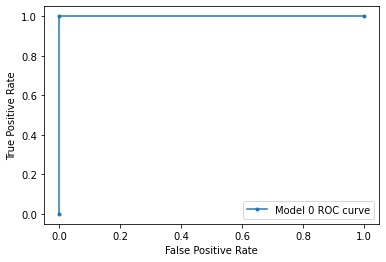

In [94]:
# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_tree_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

dt0_fpr, dt0_tpr, _ = roc_curve(test_Y0, test_tree_prediction0)

# plot the roc curve for the model
plt.plot(dt0_fpr, dt0_tpr, marker='.', label='Model 0 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


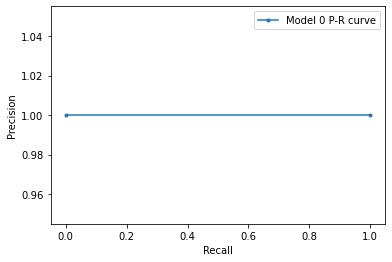

In [95]:
# Precision-Recall Curve
dt0_precision, dt0_recall, _ = precision_recall_curve(test_Y0, test_tree_prediction0)
F1_Score0 = f1_score(test_Y0, test_tree_prediction0) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score0, auc0))

# plot the precision-recall curves
plt.plot(dt0_recall, dt0_precision, marker='.', label='Model 0 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### METHOD 1 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [99]:
kidney_df1.describe(include = 'all').transpose()

count  unique  top   freq         mean          std  \
specific_gravity        155.0     NaN  NaN    NaN     1.019871     0.005552   
albumin                 155.0     NaN  NaN    NaN     0.812903     1.422396   
red_blood_cells         155.0     2.0  1.0  137.0          NaN          NaN   
pus_cell                155.0     2.0  1.0  126.0          NaN          NaN   
serum_creatinine        155.0     NaN  NaN    NaN     2.219355     3.099353   
sodium                  155.0     NaN  NaN    NaN   138.664516     7.435679   
white_blood_cell_count  155.0     NaN  NaN    NaN  8480.000000  3148.188512   
red_blood_cell_count    155.0     NaN  NaN    NaN     4.894194     1.028695   
hypertension            155.0     2.0  0.0  121.0          NaN          NaN   
pedal_edema             155.0     2.0  0.0  135.0          NaN          NaN   
anemia                  155.0     2.0  0.0  139.0          NaN          NaN   
class                   155.0     2.0  0.0  112.0          NaN          NaN   

                             min      25%      50%       75%        max  
specific_gravity           1.005     1.02     1.02     1.025      1.025  
albumin                    0.000     0.00     0.00     1.500      4.000  
red_blood_cells              NaN      NaN      NaN       NaN        NaN  
pus_cell                     NaN      NaN      NaN       NaN        NaN  
serum_creatinine           0.400     0.70     1.10     1.700     15.200  
sodium                   111.000   135.00   139.00   144.000    150.000  
white_blood_cell_count  3800.000  6550.00  7800.00  9750.000  26400.000  
red_blood_cell_count       2.100     4.40     5.00     5.600      8.000  
hypertension                 NaN      NaN      NaN       NaN        NaN  
pedal_edema                  NaN      NaN      NaN       NaN        NaN  
anemia                       NaN      NaN      NaN       NaN        NaN  
class                        NaN      NaN      NaN       NaN        NaN

In [256]:
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(X_df1_TK, y_df1_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
print("\nMagnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)

Magnitude of the descriptive training features: (108, 24)
Magnitude of the target training features: (108,)

Magnitude of the descriptive test features: (47, 24)
Magnitude of the target test features: (47,)


In [257]:
train_X1a, test_X1a, train_Y1a, test_Y1a = train_test_split(X_df1a_TK, y_df1_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1a.shape)
print("Magnitude of the target training features:", train_Y1a.shape)
print("\nMagnitude of the descriptive test features:", test_X1a.shape)
print("Magnitude of the target test features:", test_Y1a.shape)

Magnitude of the descriptive training features: (108, 21)
Magnitude of the target training features: (108,)

Magnitude of the descriptive test features: (47, 21)
Magnitude of the target test features: (47,)


In [258]:
train_X1b, test_X1b, train_Y1b, test_Y1b = train_test_split(X_df1b_TK, y_df1_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X1b.shape)
print("Magnitude of the target training features:", train_Y1b.shape)
print("\nMagnitude of the descriptive test features:", test_X1b.shape)
print("Magnitude of the target test features:", test_Y1b.shape)

Magnitude of the descriptive training features: (108, 11)
Magnitude of the target training features: (108,)

Magnitude of the descriptive test features: (47, 11)
Magnitude of the target test features: (47,)


In [259]:
# Fitting the decision tree
classification_tree.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_tree_prediction1 = classification_tree.predict(train_X1)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
classification_tree.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = classification_tree.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:')
classification_tree.score(test_X1, test_Y1)

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_tree_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))


Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 1 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47

Accuracy Score on test data:
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.92857142857142

AUC for our sample data is 1.0


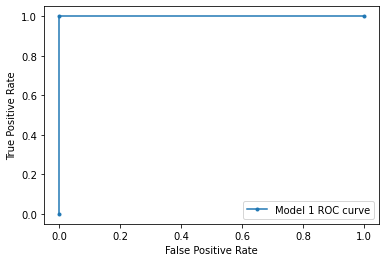

In [105]:
# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_tree_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

dt1_fpr, dt1_tpr, _ = roc_curve(test_Y1, test_tree_prediction1)

# plot the roc curve for the model
plt.plot(dt1_fpr, dt1_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


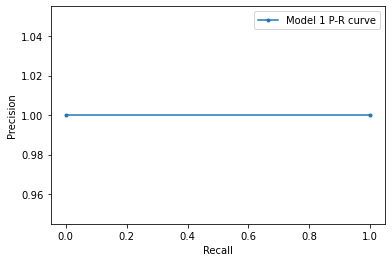

In [106]:
# Precision-Recall Curve
dt1_precision, dt1_recall, _ = precision_recall_curve(test_Y1, test_tree_prediction1)
F1_Score1 = f1_score(test_Y1, test_tree_prediction1) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score1, auc1))

# plot the precision-recall curves
plt.plot(dt1_recall, dt1_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [260]:
# Fitting the decision tree
classification_tree.fit(train_X1a, train_Y1a)

# Performance of the tree on the train data
train_tree_prediction1a = classification_tree.predict(train_X1a)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, train_tree_prediction1a))

print('\nClassification Report:')
print(classification_report(train_Y1a, train_tree_prediction1a))

print('Accuracy Score on train data:')
classification_tree.score(train_X1a, train_Y1a)

# Performance of the tree on the test data
test_tree_prediction1a = classification_tree.predict(test_X1a)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, test_tree_prediction1a))

print('\nClassification Report:')
print(classification_report(test_Y1a, test_tree_prediction1a))

print('Accuracy Score on test data:')
classification_tree.score(test_X1a, test_Y1a)

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, test_tree_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, test_tree_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, test_tree_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

In [261]:
# Fitting the decision tree
classification_tree.fit(train_X1b, train_Y1b)

# Performance of the tree on the train data
train_tree_prediction1b = classification_tree.predict(train_X1b)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, train_tree_prediction1b))

print('\nClassification Report:')
print(classification_report(train_Y1b, train_tree_prediction1b))

print('Accuracy Score on train data:')
classification_tree.score(train_X1b, train_Y1b)

# Performance of the tree on the test data
test_tree_prediction1b = classification_tree.predict(test_X1b)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, test_tree_prediction1b))

print('\nClassification Report:')
print(classification_report(test_Y1b, test_tree_prediction1b))

print('Accuracy Score on test data:')
classification_tree.score(test_X1b, test_Y1b)

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, test_tree_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, test_tree_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, test_tree_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

#### METHOD 2 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [107]:
kidney_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   specific_gravity    207 non-null    float64 
 1   albumin             207 non-null    float64 
 2   potassium           207 non-null    float64 
 3   packed_cell_volume  207 non-null    float64 
 4   hypertension        207 non-null    category
 5   diabetes_mellitus   207 non-null    category
 6   pedal_edema         207 non-null    category
 7   class               207 non-null    category
dtypes: category(4), float64(4)
memory usage: 7.9 KB


In [262]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_df2_TK, y_df2_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
print("\nMagnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)

Magnitude of the descriptive training features: (144, 21)
Magnitude of the target training features: (144,)

Magnitude of the descriptive test features: (63, 21)
Magnitude of the target test features: (63,)


In [263]:
train_X2a, test_X2a, train_Y2a, test_Y2a = train_test_split(X_df2a_TK, y_df2_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2a.shape)
print("Magnitude of the target training features:", train_Y2a.shape)
print("\nMagnitude of the descriptive test features:", test_X2a.shape)
print("Magnitude of the target test features:", test_Y2a.shape)

Magnitude of the descriptive training features: (144, 20)
Magnitude of the target training features: (144,)

Magnitude of the descriptive test features: (63, 20)
Magnitude of the target test features: (63,)


In [264]:
train_X2b, test_X2b, train_Y2b, test_Y2b = train_test_split(X_df2b_TK, y_df2_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X2b.shape)
print("Magnitude of the target training features:", train_Y2b.shape)
print("\nMagnitude of the descriptive test features:", test_X2b.shape)
print("Magnitude of the target test features:", test_Y2b.shape)

Magnitude of the descriptive training features: (144, 8)
Magnitude of the target training features: (144,)

Magnitude of the descriptive test features: (63, 8)
Magnitude of the target test features: (63,)


In [265]:
# Fitting the decision tree
classification_tree.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = classification_tree.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = classification_tree.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2, test_Y2)))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_tree_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Accuracy Score on test data: 0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on tes

AUC for our sample data is 0.98


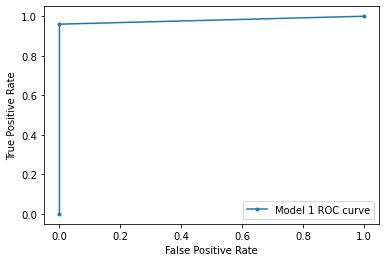

In [110]:
# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_tree_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

dt2_fpr, dt2_tpr, _ = roc_curve(test_Y2, test_tree_prediction2)

# plot the roc curve for the model
plt.plot(dt2_fpr, dt2_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=0.980 AUC=0.980


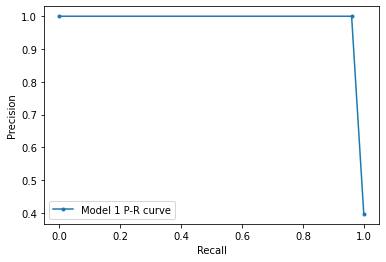

In [111]:
# Precision-Recall Curve
dt2_precision, dt2_recall, _ = precision_recall_curve(test_Y2, test_tree_prediction2)
F1_Score2 = f1_score(test_Y2, test_tree_prediction2) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score2, auc2))

# plot the precision-recall curves
plt.plot(dt2_recall, dt2_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [266]:
# Fitting the decision tree
classification_tree.fit(train_X2a, train_Y2a)

# Performance of the tree on the train data
train_tree_prediction2a = classification_tree.predict(train_X2a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2a, train_tree_prediction2a))

print('\nClassification Report:')
print(classification_report(train_Y2a, train_tree_prediction2a))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2a, train_Y2a)))


# Performance of the tree on the test data
test_tree_prediction2a = classification_tree.predict(test_X2a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2a, test_tree_prediction2a))

print('\nClassification Report:')
print(classification_report(test_Y2a, test_tree_prediction2a))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2a, test_Y2a)))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, test_tree_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, test_tree_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, test_tree_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Accuracy Score on test data: 0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on tes

In [267]:
# Fitting the decision tree
classification_tree.fit(train_X2b, train_Y2b)

# Performance of the tree on the train data
train_tree_prediction2b = classification_tree.predict(train_X2b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2b, train_tree_prediction2b))

print('\nClassification Report:')
print(classification_report(train_Y2b, train_tree_prediction2b))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2b, train_Y2b)))


# Performance of the tree on the test data
test_tree_prediction2b = classification_tree.predict(test_X2b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2b, test_tree_prediction2b))

print('\nClassification Report:')
print(classification_report(test_Y2b, test_tree_prediction2b))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2b, test_Y2b)))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, test_tree_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, test_tree_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, test_tree_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Accuracy Score on test data: 0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on tes

#### METHOD 3 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [268]:
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(X_df3_TK, y_df3_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X3.shape)
print("Magnitude of the target training features:", train_Y3.shape)
print("\nMagnitude of the descriptive test features:", test_X3.shape)
print("Magnitude of the target test features:", test_Y3.shape)

Magnitude of the descriptive training features: (272, 21)
Magnitude of the target training features: (272,)

Magnitude of the descriptive test features: (117, 21)
Magnitude of the target test features: (117,)


In [269]:
train_X3a, test_X3a, train_Y3a, test_Y3a = train_test_split(X_df3a_TK, y_df3_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X3a.shape)
print("Magnitude of the target training features:", train_Y3a.shape)
print("\nMagnitude of the descriptive test features:", test_X3a.shape)
print("Magnitude of the target test features:", test_Y3a.shape)

Magnitude of the descriptive training features: (272, 20)
Magnitude of the target training features: (272,)

Magnitude of the descriptive test features: (117, 20)
Magnitude of the target test features: (117,)


In [270]:
train_X3b, test_X3b, train_Y3b, test_Y3b = train_test_split(X_df3b_TK, y_df3_TK, test_size=0.3, random_state=42)

print("Magnitude of the descriptive training features:", train_X3b.shape)
print("Magnitude of the target training features:", train_Y3b.shape)
print("\nMagnitude of the descriptive test features:", test_X3b.shape)
print("Magnitude of the target test features:", test_Y3b.shape)

Magnitude of the descriptive training features: (272, 8)
Magnitude of the target training features: (272,)

Magnitude of the descriptive test features: (117, 8)
Magnitude of the target test features: (117,)


In [271]:
# Fitting the decision tree
classification_tree.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_tree_prediction3 = classification_tree.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_tree_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_tree_prediction3))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_tree_prediction3 = classification_tree.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_tree_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_tree_prediction3))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_tree_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[39  1]
 [ 1 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117

Accuracy Score on test data: 0.9829059829059829
AUC for our sample data is 0.981
Sensitivity Score o

AUC for our sample data is 0.981


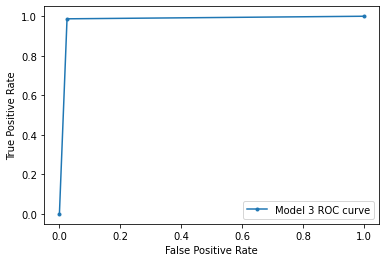

In [114]:
# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_tree_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

dt3_fpr, dt3_tpr, _ = roc_curve(test_Y3, test_tree_prediction3)

# plot the roc curve for the model
plt.plot(dt3_fpr, dt3_tpr, marker='.', label='Model 3 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=0.987 AUC=0.981


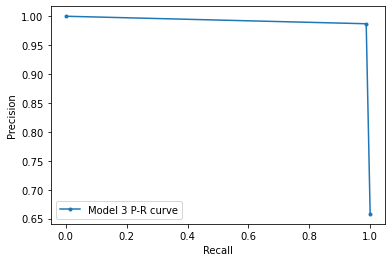

In [115]:
# Precision-Recall Curve
dt3_precision, dt3_recall, _ = precision_recall_curve(test_Y3, test_tree_prediction3)
F1_Score3 = f1_score(test_Y3, test_tree_prediction3) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score3, auc3))

# plot the precision-recall curves
plt.plot(dt3_recall, dt3_precision, marker='.', label='Model 3 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [272]:
# Fitting the decision tree
classification_tree.fit(train_X3a, train_Y3a)

# Performance of the tree on the train data
train_tree_prediction3a = classification_tree.predict(train_X3a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3a, train_tree_prediction3a))

print('\nClassification Report:')
print(classification_report(train_Y3a, train_tree_prediction3a))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3a, train_Y3a)))


# Performance of the tree on the test data
test_tree_prediction3a = classification_tree.predict(test_X3a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3a, test_tree_prediction3a))

print('\nClassification Report:')
print(classification_report(test_Y3a, test_tree_prediction3a))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3a, test_Y3a)))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, test_tree_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, test_tree_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_tree_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[39  1]
 [ 1 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117

Accuracy Score on test data: 0.9829059829059829
AUC for our sample data is 0.981
Sensitivity Score o

In [273]:
# Fitting the decision tree
classification_tree.fit(train_X3b, train_Y3b)

# Performance of the tree on the train data
train_tree_prediction3b = classification_tree.predict(train_X3b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3b, train_tree_prediction3b))

print('\nClassification Report:')
print(classification_report(train_Y3b, train_tree_prediction3b))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3b, train_Y3b)))


# Performance of the tree on the test data
test_tree_prediction3b = classification_tree.predict(test_X3b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3b, test_tree_prediction3b))

print('\nClassification Report:')
print(classification_report(test_Y3b, test_tree_prediction3b))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X3b, test_Y3b)))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, test_tree_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[39  1]
 [ 1 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117

Accuracy Score on test data: 0.9829059829059829
AUC for our sample data is 0.981
Sensitivity Score o

## ALGORITHM: Random Forest

In [274]:
random_forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,random_state=1) 

In [117]:
# Fitting the decision tree
random_forest.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_rf_prediction0 = random_forest.predict(train_X0)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_rf_prediction0))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_rf_prediction0 = random_forest.predict(test_X0)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_rf_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_rf_prediction0))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X0, test_Y0)))

recall_sensitivity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, test_tree_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[68  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        26

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94

Accuracy Score on train data: 1.0


Random Forest Classifier performance on test data

Confusion Matrix:
[[23  0]
 [ 0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Accuracy Score on test data: 1.0


AUC for our sample data is 1.0


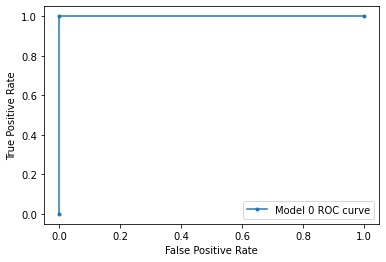

In [118]:
# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_rf_prediction0), 3)
 
print("AUC for our sample data is {}". format(auc0))

rf0_fpr, rf0_tpr, _ = roc_curve(test_Y0, test_rf_prediction0)

# plot the roc curve for the model
plt.plot(rf0_fpr, rf0_tpr, marker='.', label='Model 0 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


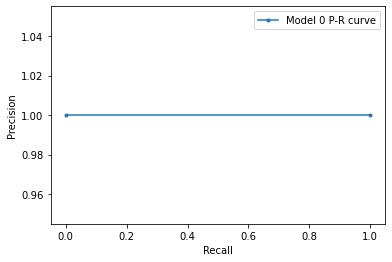

In [119]:
# Precision-Recall Curve
rf0_precision, rf0_recall, _ = precision_recall_curve(test_Y0, test_rf_prediction0)
F1_Score0 = f1_score(test_Y0, test_rf_prediction0) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score0, auc0))

# plot the precision-recall curves
plt.plot(rf0_recall, rf0_precision, marker='.', label='Model 0 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [203]:
# define search space
space = dict()
space['n_estimators'] = [100, 200, 300, 400, 500]
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [4, 6, 8, 10, 12]
space['max_features'] = ['sqrt', 'log2', None]

rfc0 = RandomForestClassifier(bootstrap = True, oob_score = True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_cv = GridSearchCV(rfc0, space, cv=cv, scoring= 'roc_auc')
rfc_cv.fit(train_X0, train_Y0)

# summarize result
print("Random Forest GridSearch score: "+str(rfc_cv.best_score_))
print("Random Forest GridSearch params: ")
print(rfc_cv.best_params_)

Logistic Regression GridSearch score: 1.0
Logistic Regression GridSearch params: 
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


#### METHOD 1 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [275]:
# Fitting the decision tree
random_forest.fit(train_X1, train_Y1)

# Performance of the tree on the train data
train_rf_prediction1 = random_forest.predict(train_X1)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_rf_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_rf_prediction1))

print('Accuracy Score on train data:')
random_forest.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_rf_prediction1 = random_forest.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_rf_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_rf_prediction1))

print('Accuracy Score on test data:')
random_forest.score(test_X1, test_Y1)

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_rf_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

AUC for our sample data is 1.0


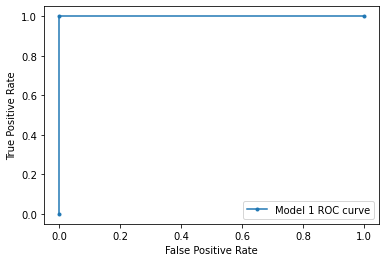

In [121]:
# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_rf_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

rf1_fpr, rf1_tpr, _ = roc_curve(test_Y1, test_rf_prediction1)

# plot the roc curve for the model
plt.plot(rf1_fpr, rf1_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


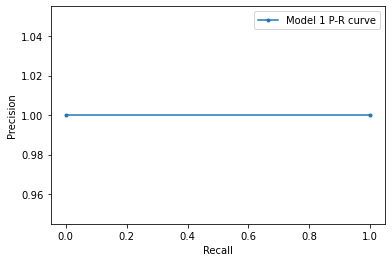

In [122]:
# Precision-Recall Curve
rf1_precision, rf1_recall, _ = precision_recall_curve(test_Y1, test_rf_prediction1)
F1_Score1 = f1_score(test_Y1, test_tree_prediction1) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score1, auc1))

# plot the precision-recall curves
plt.plot(rf1_recall, rf1_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [276]:
# Fitting the decision tree
random_forest.fit(train_X1a, train_Y1a)

# Performance of the tree on the train data
train_rf_prediction1a = random_forest.predict(train_X1a)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, train_rf_prediction1a))

print('\nClassification Report:')
print(classification_report(train_Y1a, train_rf_prediction1a))

print('Accuracy Score on train data:')
random_forest.score(train_X1a, train_Y1a)

# Performance of the tree on the test data
test_rf_prediction1a = random_forest.predict(test_X1a)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, test_rf_prediction1a))

print('\nClassification Report:')
print(classification_report(test_Y1a, test_rf_prediction1a))

print('Accuracy Score on test data:')
random_forest.score(test_X1a, test_Y1a)

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, test_rf_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, test_rf_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, test_rf_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

In [277]:
# Fitting the decision tree
random_forest.fit(train_X1b, train_Y1b)

# Performance of the tree on the train data
train_rf_prediction1b = random_forest.predict(train_X1b)

print("Decision tree performance on training data")

print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, train_rf_prediction1b))

print('\nClassification Report:')
print(classification_report(train_Y1b, train_rf_prediction1b))

print('Accuracy Score on train data:')
random_forest.score(train_X1b, train_Y1b)

# Performance of the tree on the test data
test_rf_prediction1b = random_forest.predict(test_X1b)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, test_rf_prediction1b))

print('\nClassification Report:')
print(classification_report(test_Y1b, test_rf_prediction1b))

print('Accuracy Score on test data:')
random_forest.score(test_X1b, test_Y1b)

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, test_rf_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, test_rf_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, test_rf_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Accuracy Score on test data:
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Sc

#### METHOD 2 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [278]:
# Fitting the decision tree
random_forest.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_rf_prediction2 = random_forest.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_rf_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_rf_prediction2))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_rf_prediction2 = random_forest.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_rf_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_rf_prediction2))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2, test_Y2)))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_rf_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        25

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Spec

AUC for our sample data is 1.0


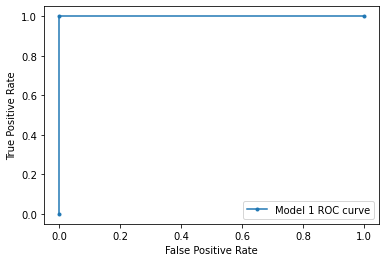

In [124]:
# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_rf_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

rf2_fpr, rf2_tpr, _ = roc_curve(test_Y2, test_rf_prediction2)

# plot the roc curve for the model
plt.plot(rf2_fpr, rf2_tpr, marker='.', label='Model 1 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=1.000 AUC=1.000


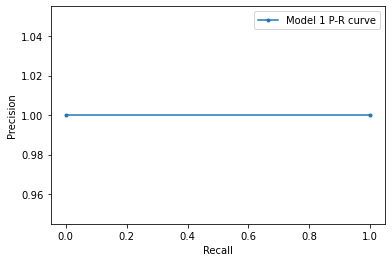

In [125]:
# Precision-Recall Curve
rf2_precision, rf2_recall, _ = precision_recall_curve(test_Y2, test_rf_prediction2)
F1_Score2 = f1_score(test_Y2, test_rf_prediction2) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score2, auc2))

# plot the precision-recall curves
plt.plot(rf2_recall, rf2_precision, marker='.', label='Model 1 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [279]:
# Fitting the decision tree
random_forest.fit(train_X2a, train_Y2a)

# Performance of the tree on the train data
train_rf_prediction2a = random_forest.predict(train_X2a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2a, train_rf_prediction2a))

print('\nClassification Report:')
print(classification_report(train_Y2a, train_rf_prediction2a))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2a, train_Y2a)))


# Performance of the tree on the test data
test_rf_prediction2a = random_forest.predict(test_X2a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2a, test_rf_prediction2a))

print('\nClassification Report:')
print(classification_report(test_Y2a, test_rf_prediction2a))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2a, test_Y2a)))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, test_rf_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, test_rf_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, test_rf_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Accuracy Score on test data: 0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on tes

In [280]:
# Fitting the decision tree
random_forest.fit(train_X2b, train_Y2b)

# Performance of the tree on the train data
train_rf_prediction2b = random_forest.predict(train_X2b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2b, train_rf_prediction2b))

print('\nClassification Report:')
print(classification_report(train_Y2b, train_rf_prediction2b))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X2b, train_Y2b)))


# Performance of the tree on the test data
test_rf_prediction2b = random_forest.predict(test_X2b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2b, test_rf_prediction2b))

print('\nClassification Report:')
print(classification_report(test_Y2b, test_rf_prediction2b))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X2b, test_Y2b)))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, test_rf_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, test_rf_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, test_rf_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[38  0]
 [ 0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        25

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Spec

#### METHOD 3 CLEAN DATA
Data that has undergone feature selection and oversampling of the majority class

In [281]:
# Fitting the decision tree
random_forest.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_rf_prediction3 = random_forest.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_rf_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_rf_prediction3))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_rf_prediction3 = random_forest.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_rf_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_rf_prediction3))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_rf_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[40  0]
 [ 0 77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        77

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0


AUC for our sample data is 0.994


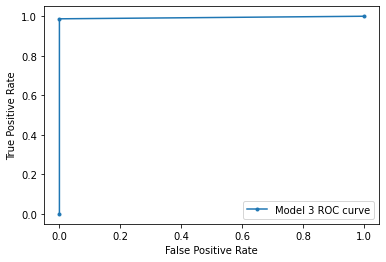

In [127]:
# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_rf_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

rf3_fpr, rf3_tpr, _ = roc_curve(test_Y3, test_rf_prediction3)

# plot the roc curve for the model
plt.plot(rf3_fpr, rf3_tpr, marker='.', label='Model 3 ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree Classifier: F-1 Score=0.993 AUC=0.994


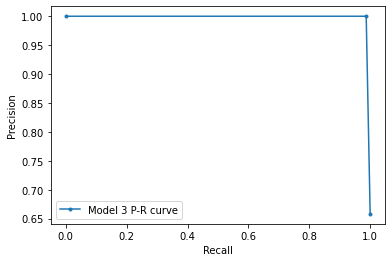

In [128]:
# Precision-Recall Curve
rf3_precision, rf3_recall, _ = precision_recall_curve(test_Y3, test_rf_prediction3)
F1_Score3 = f1_score(test_Y3, test_rf_prediction3) 

# summarize scores
print('Decision Tree Classifier: F-1 Score=%.3f AUC=%.3f' % (F1_Score3, auc3))

# plot the precision-recall curves
plt.plot(rf3_recall, rf3_precision, marker='.', label='Model 3 P-R curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [282]:
# Fitting the decision tree
random_forest.fit(train_X3a, train_Y3a)

# Performance of the tree on the train data
train_rf_prediction3a = random_forest.predict(train_X3a)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3a, train_rf_prediction3a))

print('\nClassification Report:')
print(classification_report(train_Y3a, train_rf_prediction3a))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3a, train_Y3a)))


# Performance of the tree on the test data
test_rf_prediction3a = random_forest.predict(test_X3a)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3a, test_rf_prediction3a))

print('\nClassification Report:')
print(classification_report(test_Y3a, test_rf_prediction3a))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3a, test_Y3a)))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, test_rf_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[40  0]
 [ 0 77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        77

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0


In [283]:
# Fitting the decision tree
random_forest.fit(train_X3b, train_Y3b)

# Performance of the tree on the train data
train_rf_prediction3b = random_forest.predict(train_X3b)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3b, train_rf_prediction3b))

print('\nClassification Report:')
print(classification_report(train_Y3b, train_rf_prediction3b))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X3b, train_Y3b)))


# Performance of the tree on the test data
test_rf_prediction3b = random_forest.predict(test_X3b)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3b, test_rf_prediction3b))

print('\nClassification Report:')
print(classification_report(test_Y3b, test_rf_prediction3b))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X3b, test_Y3b)))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, test_rf_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[110   0]
 [  0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       162

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[40  0]
 [ 0 77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        77

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Accuracy Score on test data: 1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0


# ALGORITHM: K-NEAREST NEIGHBOUR

In [284]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0 = train_X0.values
x_test_k0 = test_X0.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0 = min_max_scaler.fit_transform(x_train_k0)
x_test_knorm0 = min_max_scaler.fit_transform(x_test_k0)


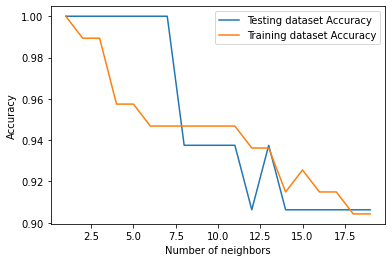

In [285]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0, train_Y0)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0, train_Y0)
    knn_test_accuracy[i] = knn.score(x_test_knorm0, test_Y0)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [286]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_test_knorm0, test_Y0)
 
# Predict on dataset which model has not seen before
knn_predict0 = knn_5.predict(x_test_knorm0)

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, knn_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict0))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm0, test_Y0))

recall_sensitivity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, test_rf_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

ValueError: X has 24 features, but KNeighborsClassifier is expecting 21 features as input.

In [132]:
# optimum value of k = 7

knn_7 = KNeighborsClassifier(n_neighbors=7)
 
knn_7.fit(x_test_knorm0, test_Y0)
 
# Predict on dataset which model has not seen before
knn_predict0 = knn_7.predict(x_test_knorm0)

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, knn_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict0))
print("\nAccuracy Score on test set:")
print(knn_7.score(x_test_knorm0, test_Y0))

Confusion Matrix:
[[23  0]
 [ 4  5]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      0.56      0.71         9

    accuracy                           0.88        32
   macro avg       0.93      0.78      0.82        32
weighted avg       0.89      0.88      0.86        32


Accuracy Score on test set:
0.875


#### I1

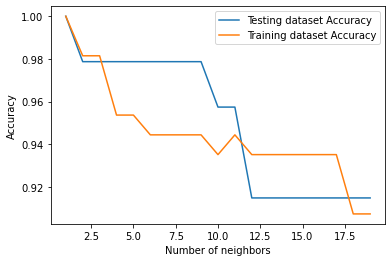

In [287]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1 = train_X1.values
x_test_k1 = test_X1.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1 = min_max_scaler.fit_transform(x_train_k1)
x_test_knorm1 = min_max_scaler.fit_transform(x_test_k1)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1, train_Y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1, train_Y1)
    knn_test_accuracy[i] = knn.score(x_test_knorm1, test_Y1)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [289]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1, train_Y1)

knn_train_predict1 = knn_5.predict(x_train_knorm1)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y1, knn_train_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, knn_train_predict1))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm1, train_Y1))
 
# Predict on dataset which model has not seen before
knn_test_predict1 = knn_5.predict(x_test_knorm1)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y1, knn_test_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, knn_test_predict1))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, knn_test_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, knn_test_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, knn_test_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[79  0]
 [ 5 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       1.00      0.83      0.91        29

    accuracy                           0.95       108
   macro avg       0.97      0.91      0.94       108
weighted avg       0.96      0.95      0.95       108


Accuracy Score on test set:
0.9537037037037037
Confusion Matrix for test data:
[[33  0]
 [ 1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47


Accuracy Score on test set:
0.9787234042553191
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.9285714285714286
Specificity Score

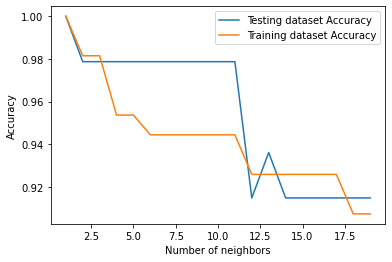

In [290]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1a = train_X1a.values
x_test_k1a = test_X1a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1a = min_max_scaler.fit_transform(x_train_k1a)
x_test_knorm1a = min_max_scaler.fit_transform(x_test_k1a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1a, train_Y1a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1a, train_Y1a)
    knn_test_accuracy[i] = knn.score(x_test_knorm1a, test_Y1a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [291]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1a, train_Y1a)

knn_train_predict1a = knn_5.predict(x_train_knorm1a)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y1a, knn_train_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, knn_train_predict1a))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1a, train_Y1a))
 
# Predict on dataset which model has not seen before
knn_test_predict1a = knn_5.predict(x_test_knorm1a)

print('\nConfusion Matrix for test data:')
print(confusion_matrix(test_Y1a, knn_test_predict1a))
print('\nClassification Report')
print(classification_report(test_Y1a, knn_test_predict1a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, knn_test_predict1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, knn_test_predict1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, knn_test_predict1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[79  0]
 [ 5 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       1.00      0.83      0.91        29

    accuracy                           0.95       108
   macro avg       0.97      0.91      0.94       108
weighted avg       0.96      0.95      0.95       108


Accuracy Score on train set:
0.9537037037037037

Confusion Matrix for test data:
[[33  0]
 [ 1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47


Accuracy Score on test set:
0.9787234042553191
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.9285714285714286
Specificity Sco

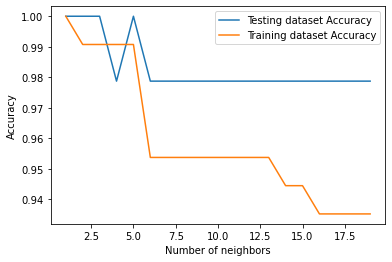

In [292]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1b = train_X1b.values
x_test_k1b = test_X1b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1b = min_max_scaler.fit_transform(x_train_k1b)
x_test_knorm1b = min_max_scaler.fit_transform(x_test_k1b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1b, train_Y1b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1b, train_Y1b)
    knn_test_accuracy[i] = knn.score(x_test_knorm1b, test_Y1b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [293]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1b, train_Y1b)

knn_train_predict1b = knn_5.predict(x_train_knorm1b)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y1b, knn_train_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, knn_train_predict1b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm1b, train_Y1b))
 
# Predict on dataset which model has not seen before
knn_test_predict1b = knn_5.predict(x_test_knorm1b)

print('Confusion Matrix for test data:')
print(confusion_matrix(test_Y1b, knn_test_predict1b))
print('\nClassification Report')
print(classification_report(test_Y1b, knn_test_predict1b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, knn_test_predict1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, knn_test_predict1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, knn_test_predict1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[79  0]
 [ 1 28]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.97      0.98        29

    accuracy                           0.99       108
   macro avg       0.99      0.98      0.99       108
weighted avg       0.99      0.99      0.99       108


Accuracy Score on test set:
0.9907407407407407
Confusion Matrix for test data:
[[33  0]
 [ 0 14]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


#### I2

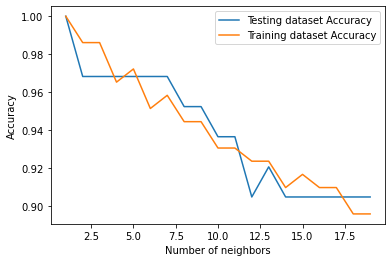

In [294]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2 = train_X2.values
x_test_k2 = test_X2.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2 = min_max_scaler.fit_transform(x_train_k2)
x_test_knorm2 = min_max_scaler.fit_transform(x_test_k2)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2, train_Y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2, train_Y2)
    knn_test_accuracy[i] = knn.score(x_test_knorm2, test_Y2)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [295]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm2, train_Y2)

knn_train_predict2 = knn_5.predict(x_train_knorm2)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y2, knn_train_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, knn_train_predict2))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm2, train_Y2))

# Predict on dataset which model has not seen before
knn_test_predict2 = knn_5.predict(x_test_knorm2)

print('Confusion Matrix:')
print(confusion_matrix(test_Y2, knn_test_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, knn_test_predict2))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, knn_test_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[78  0]
 [ 4 62]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        78
           1       1.00      0.94      0.97        66

    accuracy                           0.97       144
   macro avg       0.98      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144


Accuracy Score on test set:
0.9722222222222222
Confusion Matrix:
[[38  0]
 [ 2 23]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.92      0.96        25

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63


Accuracy Score on test set:
0.9682539682539683
AUC for our sample data is 0.96
Sensitivity Score on test data: 0.92
Specificity Score on test data: 1.0


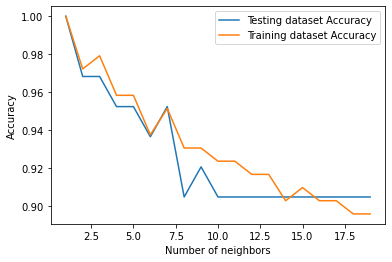

In [296]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2a = train_X2a.values
x_test_k2a = test_X2a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2a = min_max_scaler.fit_transform(x_train_k2a)
x_test_knorm2a = min_max_scaler.fit_transform(x_test_k2a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2a, train_Y2a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2a, train_Y2a)
    knn_test_accuracy[i] = knn.score(x_test_knorm2a, test_Y2a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [297]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm2a, train_Y2a)

knn_train_predict2a = knn_5.predict(x_train_knorm2a)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y2a, knn_train_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, knn_train_predict2a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm2a, train_Y2a))

# Predict on dataset which model has not seen before
knn_test_predict2a = knn_5.predict(x_test_knorm2a)

print('Confusion Matrix:')
print(confusion_matrix(test_Y2a, knn_test_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, knn_test_predict2a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, knn_test_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, knn_test_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, knn_test_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[78  0]
 [ 6 60]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        78
           1       1.00      0.91      0.95        66

    accuracy                           0.96       144
   macro avg       0.96      0.95      0.96       144
weighted avg       0.96      0.96      0.96       144


Accuracy Score on test set:
0.9583333333333334
Confusion Matrix:
[[38  0]
 [ 3 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.94      0.95        63
weighted avg       0.96      0.95      0.95        63


Accuracy Score on test set:
0.9523809523809523
AUC for our sample data is 0.94
Sensitivity Score on test data: 0.88
Specificity Score on test data: 1.0


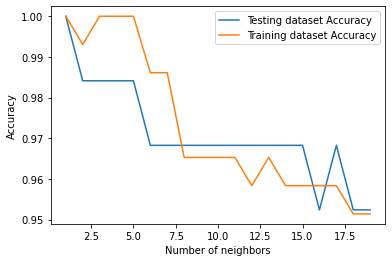

In [298]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2b = train_X2b.values
x_test_k2b = test_X2b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2b = min_max_scaler.fit_transform(x_train_k2b)
x_test_knorm2b = min_max_scaler.fit_transform(x_test_k2b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2b, train_Y2b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2b, train_Y2b)
    knn_test_accuracy[i] = knn.score(x_test_knorm2b, test_Y2b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [299]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm2b, train_Y2b)

knn_train_predict2b = knn_5.predict(x_train_knorm2b)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y2b, knn_train_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, knn_train_predict2b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm2b, train_Y2b))

# Predict on dataset which model has not seen before
knn_test_predict2b = knn_5.predict(x_test_knorm2b)

print('Confusion Matrix:')
print(confusion_matrix(test_Y2b, knn_test_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, knn_test_predict2b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, knn_test_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, knn_test_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, knn_test_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[78  0]
 [ 0 66]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144


Accuracy Score on test set:
1.0
Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Accuracy Score on test set:
0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on test data: 0.96
Specificity Score on test data: 1.0


#### I3

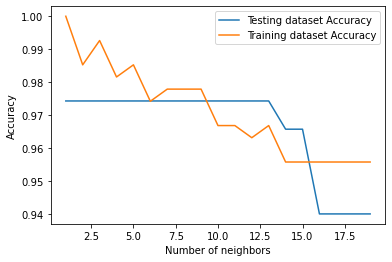

In [300]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3 = train_X3.values
x_test_k3 = test_X3.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3 = min_max_scaler.fit_transform(x_train_k3)
x_test_knorm3 = min_max_scaler.fit_transform(x_test_k3)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3, train_Y3)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3, train_Y3)
    knn_test_accuracy[i] = knn.score(x_test_knorm3, test_Y3)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [301]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3, train_Y3)

knn_train_predict3 = knn_5.predict(x_train_knorm3)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y3, knn_train_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, knn_train_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3, train_Y3))

# Predict on dataset which model has not seen before
knn_test_predict3 = knn_5.predict(x_test_knorm3)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3, knn_test_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, knn_test_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, knn_test_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, knn_test_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, knn_test_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[110   0]
 [  4 158]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.98      0.99      0.98       272
weighted avg       0.99      0.99      0.99       272


Accuracy Score on test set:
0.9852941176470589
Confusion Matrix:
[[40  0]
 [ 3 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.96      0.98        77

    accuracy                           0.97       117
   macro avg       0.97      0.98      0.97       117
weighted avg       0.98      0.97      0.97       117


Accuracy Score on test set:
0.9743589743589743
AUC for our sample data is 0.981
Sensitivity Score on test data: 0.961038961038961
Specificity Score on test da

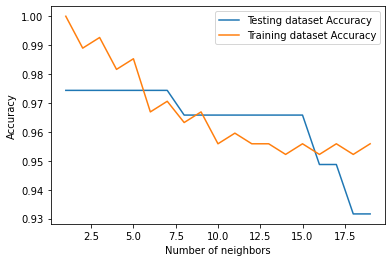

In [302]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3a = train_X3a.values
x_test_k3a = test_X3a.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3a = min_max_scaler.fit_transform(x_train_k3a)
x_test_knorm3a = min_max_scaler.fit_transform(x_test_k3a)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3a, train_Y3a)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3a, train_Y3a)
    knn_test_accuracy[i] = knn.score(x_test_knorm3a, test_Y3a)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [303]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3a, train_Y3a)

knn_train_predict3a = knn_5.predict(x_train_knorm3a)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y3a, knn_train_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, knn_train_predict3a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3a, train_Y3a))

# Predict on dataset which model has not seen before
knn_test_predict3a = knn_5.predict(x_test_knorm3a)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3a, knn_test_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, knn_test_predict3a))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, knn_test_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, knn_test_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, knn_test_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[110   0]
 [  4 158]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.98      0.99      0.98       272
weighted avg       0.99      0.99      0.99       272


Accuracy Score on test set:
0.9852941176470589
Confusion Matrix:
[[40  0]
 [ 3 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.96      0.98        77

    accuracy                           0.97       117
   macro avg       0.97      0.98      0.97       117
weighted avg       0.98      0.97      0.97       117


Accuracy Score on test set:
0.9743589743589743
AUC for our sample data is 0.981
Sensitivity Score on test data: 0.961038961038961
Specificity Score on test da

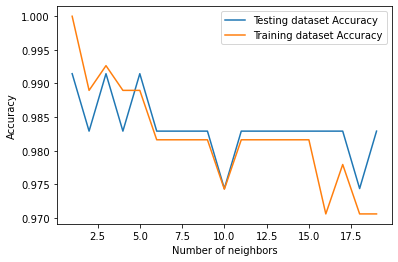

In [304]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3b = train_X3b.values
x_test_k3b = test_X3b.values
#x_validation_k0 = validation_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3b = min_max_scaler.fit_transform(x_train_k3b)
x_test_knorm3b = min_max_scaler.fit_transform(x_test_k3b)
#x_validation_knorm0 = min_max_scaler.fit_transform(x_validation_k0)

neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3b, train_Y3b)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3b, train_Y3b)
    knn_test_accuracy[i] = knn.score(x_test_knorm3b, test_Y3b)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [305]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3b, train_Y3b)

knn_train_predict3b = knn_5.predict(x_train_knorm3b)

print('Confusion Matrix for train data:')
print(confusion_matrix(train_Y3b, knn_train_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, knn_train_predict3b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3b, train_Y3b))

# Predict on dataset which model has not seen before
knn_test_predict3b = knn_5.predict(x_test_knorm3b)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3b, knn_test_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, knn_test_predict3b))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, knn_test_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, knn_test_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, knn_test_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for train data:
[[110   0]
 [  3 159]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272


Accuracy Score on test set:
0.9889705882352942
Confusion Matrix:
[[40  0]
 [ 1 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        77

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117


Accuracy Score on test set:
0.9914529914529915
AUC for our sample data is 0.994
Sensitivity Score on test data: 0.987012987012987
Specificity Score on test da

# ALGORITHM: Logistic Regression

In [140]:
# define model
lr_model0 = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores0 = cross_val_score(lr_model0, train_X0, train_Y0, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores0))

Mean ROC AUC: 1.000


In [141]:
# define search space
space = dict()
space['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
space['tol'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
space['solver'] = ['liblinear', 'lbfgs']
space['max_iter'] = [50, 100, 150, 200, 250]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_cv = GridSearchCV(LogisticRegression(), space, cv=cv, scoring= 'roc_auc')
lr_cv.fit(train_X0, train_Y0)

# summarize result
print("Logistic Regression GridSearch score: "+str(lr_cv.best_score_))
print("Logistic Regression GridSearch params: ")
print(lr_cv.best_params_)

Logistic Regression GridSearch score: 1.0
Logistic Regression GridSearch params: 
{'C': 0.0001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


In [306]:
# Algorithm
lr_model = LogisticRegression()

### Dataframe baseline

In [149]:
lr_model.fit(train_X0, train_Y0)

LogisticRegression()

In [150]:
# Predict on dataset which model has not seen before
lr_predict0 = lr_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_predict0))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
lr_predict0 = lr_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, lr_predict0))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0, test_Y0))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[68  0]
 [ 0 26]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        26

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[23  0]
 [ 1  8]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32


Accuracy Score on test set:
0.96875


In [ ]:
# Dataframe 1

In [307]:
lr_model = LogisticRegression()
lr_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
lr_predict1 = lr_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
lr_predict1 = lr_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, lr_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, lr_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, lr_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [ 1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47


Accuracy Score on test set:
0.9787234042553191
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.92857

In [309]:
lr_model.fit(train_X1a, train_Y1a)

# Predict on dataset which model has not seen before
lr_predict1a = lr_model.predict(train_X1a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, lr_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, lr_predict1a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1a, train_Y1a))

# Predict on dataset which model has not seen before
lr_predict1a = lr_model.predict(test_X1a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, lr_predict1a))
print('\nClassification Report')
print(classification_report(test_Y1a, lr_predict1a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, lr_predict1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, lr_predict1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, lr_predict1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [ 1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47


Accuracy Score on test set:
0.9787234042553191
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.92857

In [310]:
lr_model.fit(train_X1b, train_Y1b)

# Predict on dataset which model has not seen before
lr_predict1b = lr_model.predict(train_X1b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, lr_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, lr_predict1b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1b, train_Y1b))

# Predict on dataset which model has not seen before
lr_predict1b = lr_model.predict(test_X1b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, lr_predict1b))
print('\nClassification Report')
print(classification_report(test_Y1b, lr_predict1b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, lr_predict1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, lr_predict1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, lr_predict1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [ 0 14]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47


Accuracy Score on test set:
1.0
AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on

In [ ]:
# Dataframe 2

In [311]:
lr_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_predict2 = lr_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
lr_predict2 = lr_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, lr_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, lr_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, lr_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 0 66]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144


Accuracy Score on test set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Accuracy Score on test set:
0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on test data: 0.96
Spe

In [313]:
lr_model.fit(train_X2a, train_Y2a) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_predict2a = lr_model.predict(train_X2a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2a, lr_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, lr_predict2a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2a, train_Y2a))

# Predict on dataset which model has not seen before
lr_predict2a = lr_model.predict(test_X2a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2a, lr_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, lr_predict2a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, lr_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, lr_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, lr_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 1 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144


Accuracy Score on test set:
0.9930555555555556


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 1 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63


Accuracy Score on test set:
0.9841269841269841
AUC for our sample data is 0.98
Sensitivity Score on test

In [314]:
lr_model.fit(train_X2b, train_Y2b) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_predict2b = lr_model.predict(train_X2b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2b, lr_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, lr_predict2b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2b, train_Y2b))

# Predict on dataset which model has not seen before
lr_predict2b = lr_model.predict(test_X2b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2b, lr_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, lr_predict2b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, lr_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, lr_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, lr_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 1 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144


Accuracy Score on test set:
0.9930555555555556


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 3 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.94      0.95        63
weighted avg       0.96      0.95      0.95        63


Accuracy Score on test set:
0.9523809523809523
AUC for our sample data is 0.94
Sensitivity Score on test

In [ ]:
# Dataframe 3

In [315]:
lr_model.fit(train_X3, train_Y3) # fitting baseline model on data

# Predict on dataset which model has not seen before
lr_predict3 = lr_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
lr_predict3 = lr_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, lr_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, lr_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, lr_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[109   1]
 [  2 160]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       162

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272


Accuracy Score on test set:
0.9889705882352942


Resulting performance on TEST SET:
Confusion Matrix:
[[39  1]
 [ 1 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117


Accuracy Score on test set:
0.9829059829059829
AUC for our sample data is 0.981
Sensitivity Score on

In [319]:
lr_model.fit(train_X3a, train_Y3a) # fitting baseline model on data

# Predict on dataset which model has not seen before
lr_predict3a = lr_model.predict(train_X3a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3a, lr_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, lr_predict3a))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3a, train_Y3a))

# Predict on dataset which model has not seen before
lr_predict3a = lr_model.predict(test_X3a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3a, lr_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, lr_predict3a))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, lr_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, lr_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, lr_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[110   0]
 [  2 160]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.99      0.99       162

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272


Accuracy Score on test set:
0.9926470588235294


Resulting performance on TEST SET:
Confusion Matrix:
[[39  1]
 [ 1 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117


Accuracy Score on test set:
0.9829059829059829
AUC for our sample data is 0.981
Sensitivity Score on

In [320]:
lr_model.fit(train_X3b, train_Y3b) # fitting baseline model on data

# Predict on dataset which model has not seen before
lr_predict3b = lr_model.predict(train_X3b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3b, lr_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, lr_predict3b))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3b, train_Y3b))

# Predict on dataset which model has not seen before
lr_predict3b = lr_model.predict(test_X3b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3b, lr_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, lr_predict3b))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, lr_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, lr_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, lr_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[109   1]
 [  4 158]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       110
           1       0.99      0.98      0.98       162

    accuracy                           0.98       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272


Accuracy Score on test set:
0.9816176470588235


Resulting performance on TEST SET:
Confusion Matrix:
[[40  0]
 [ 1 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        77

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117


Accuracy Score on test set:
0.9914529914529915
AUC for our sample data is 0.994
Sensitivity Score on

# ALGORITHM: Support Vector Machines

Support vector machines can be catered to unbalanced data. In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters *class_weight and sample_weight* can be used.

SVM require scaled/normalized data as input.

In [252]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv0 = train_X0.values
x_test_sv0 = test_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0 = min_max_scaler.fit_transform(x_train_sv0)
x_test_svnorm0 = min_max_scaler.fit_transform(x_test_sv0)

In [253]:
# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0, train_Y0)
 
# print prediction results
print('Train data results:\n')
svm_prediction0 = svm_model.predict(x_train_svnorm0)
print(classification_report(train_Y0, svm_prediction0))

print('Test data results:\n')
svm_prediction0 = svm_model.predict(x_test_svnorm0)
print(classification_report(test_Y0, svm_prediction0))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        33

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [280]:
# Using grid search for hyper-parameter optimization

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True)
 
# fitting the model for grid search
grid.fit(x_train_svnorm0, train_Y0)

# print best parameter after tuning
print('Best parameters:')
print(grid.best_params_)
 
# a look at the model after hyper-parameter tuning
print('Best model estimation after hyper-parameter optimization')
print(grid.best_estimator_)

Best parameters:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best model estimation after hyper-parameter optimization
SVC(C=0.1, gamma=1)


In [321]:
# Dataframe 1

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1 = train_X1.values
x_test_sv1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1 = min_max_scaler.fit_transform(x_train_sv1)
x_test_svnorm1 = min_max_scaler.fit_transform(x_test_sv1)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1, train_Y1)
 
# print prediction results
print('Train data results:\n')
svm_prediction1 = svm_model.predict(x_train_svnorm1)
print(classification_report(train_Y1, svm_prediction1))

print('Test data results:\n')
svm_prediction1 = svm_model.predict(x_test_svnorm1)
print(classification_report(test_Y1, svm_prediction1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, svm_prediction1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [322]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1a = train_X1a.values
x_test_sv1a = test_X1a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1a = min_max_scaler.fit_transform(x_train_sv1a)
x_test_svnorm1a = min_max_scaler.fit_transform(x_test_sv1a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1a, train_Y1a)
 
# print prediction results
print('Train data results:\n')
svm_prediction1a = svm_model.predict(x_train_svnorm1a)
print(classification_report(train_Y1a, svm_prediction1a))

print('Test data results:\n')
svm_prediction1a = svm_model.predict(x_test_svnorm1a)
print(classification_report(test_Y1a, svm_prediction1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, svm_prediction1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, svm_prediction1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, svm_prediction1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [323]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv1b = train_X1b.values
x_test_sv1b = test_X1b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1b = min_max_scaler.fit_transform(x_train_sv1b)
x_test_svnorm1b = min_max_scaler.fit_transform(x_test_sv1b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1b, train_Y1b)
 
# print prediction results
print('Train data results:\n')
svm_prediction1b = svm_model.predict(x_train_svnorm1b)
print(classification_report(train_Y1b, svm_prediction1b))

print('Test data results:\n')
svm_prediction1b = svm_model.predict(x_test_svnorm1b)
print(classification_report(test_Y1b, svm_prediction1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, svm_prediction1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, svm_prediction1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, svm_prediction1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Test data results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        14

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

AUC for our sample data is 1.0
Sensitivity Score on test data: 1.0
Specificity Score on test data: 1.0


In [324]:
# Dataframe 2

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2 = train_X2.values
x_test_sv2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2 = min_max_scaler.fit_transform(x_train_sv2)
x_test_svnorm2 = min_max_scaler.fit_transform(x_test_sv2)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2, train_Y2)
 
# print prediction results
print('Train data results:\n')
svm_prediction2 = svm_model.predict(x_train_svnorm2)
print(classification_report(train_Y2, svm_prediction2))

print('Test data results:\n')
svm_prediction2 = svm_model.predict(x_test_svnorm2)
print(classification_report(test_Y2, svm_prediction2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, svm_prediction2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.97      0.98        66

    accuracy                           0.99       144
   macro avg       0.99      0.98      0.99       144
weighted avg       0.99      0.99      0.99       144

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.92      0.96        25

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63

AUC for our sample data is 0.96
Sensitivity Score on test data: 0.92
Specificity Score on test data: 1.0


In [325]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2a = train_X2a.values
x_test_sv2a = test_X2a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2a = min_max_scaler.fit_transform(x_train_sv2a)
x_test_svnorm2a = min_max_scaler.fit_transform(x_test_sv2a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2a, train_Y2a)
 
# print prediction results
print('Train data results:\n')
svm_prediction2a = svm_model.predict(x_train_svnorm2a)
print(classification_report(train_Y2a, svm_prediction2a))

print('Test data results:\n')
svm_prediction2a = svm_model.predict(x_test_svnorm2a)
print(classification_report(test_Y2a, svm_prediction2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, svm_prediction2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, svm_prediction2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, svm_prediction2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.97      0.98        66

    accuracy                           0.99       144
   macro avg       0.99      0.98      0.99       144
weighted avg       0.99      0.99      0.99       144

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.92      0.96        25

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63

AUC for our sample data is 0.96
Sensitivity Score on test data: 0.92
Specificity Score on test data: 1.0


In [326]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv2b = train_X2b.values
x_test_sv2b = test_X2b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2b = min_max_scaler.fit_transform(x_train_sv2b)
x_test_svnorm2b = min_max_scaler.fit_transform(x_test_sv2b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2b, train_Y2b)
 
# print prediction results
print('Train data results:\n')
svm_prediction2b = svm_model.predict(x_train_svnorm2b)
print(classification_report(train_Y2b, svm_prediction2b))

print('Test data results:\n')
svm_prediction2b = svm_model.predict(x_test_svnorm2b)
print(classification_report(test_Y2b, svm_prediction2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, svm_prediction2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, svm_prediction2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, svm_prediction2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144

Test data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

AUC for our sample data is 0.98
Sensitivity Score on test data: 0.96
Specificity Score on test data: 1.0


In [327]:
# Dataframe 3

# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3 = train_X3.values
x_test_sv3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3 = min_max_scaler.fit_transform(x_train_sv3)
x_test_svnorm3 = min_max_scaler.fit_transform(x_test_sv3)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3, train_Y3)
 
# print prediction results
print('Train data results:\n')
svm_prediction3 = svm_model.predict(x_train_svnorm3)
print(classification_report(train_Y3, svm_prediction3))

print('Test data results:\n')
svm_prediction3 = svm_model.predict(x_test_svnorm3)
print(classification_report(test_Y3, svm_prediction3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, svm_prediction3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.99      0.98       117
weighted avg       0.98      0.98      0.98       117

AUC for our sample data is 0.987
Sensitivity Score on test data: 0.974025974025974
Specificity Score on test data: 1.0


In [328]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3a = train_X3a.values
x_test_sv3a = test_X3a.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3a = min_max_scaler.fit_transform(x_train_sv3a)
x_test_svnorm3a = min_max_scaler.fit_transform(x_test_sv3a)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3a, train_Y3a)
 
# print prediction results
print('Train data results:\n')
svm_prediction3a = svm_model.predict(x_train_svnorm3a)
print(classification_report(train_Y3a, svm_prediction3a))

print('Test data results:\n')
svm_prediction3a = svm_model.predict(x_test_svnorm3a)
print(classification_report(test_Y3a, svm_prediction3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, svm_prediction3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, svm_prediction3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, svm_prediction3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.98      0.99      0.98       272
weighted avg       0.99      0.99      0.99       272

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.99      0.98       117
weighted avg       0.98      0.98      0.98       117

AUC for our sample data is 0.987
Sensitivity Score on test data: 0.974025974025974
Specificity Score on test data: 1.0


In [329]:
# scale data
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_sv3b = train_X3b.values
x_test_sv3b = test_X3b.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3b = min_max_scaler.fit_transform(x_train_sv3b)
x_test_svnorm3b = min_max_scaler.fit_transform(x_test_sv3b)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3b, train_Y3b)
 
# print prediction results
print('Train data results:\n')
svm_prediction3b = svm_model.predict(x_train_svnorm3b)
print(classification_report(train_Y3b, svm_prediction3b))

print('Test data results:\n')
svm_prediction3b = svm_model.predict(x_test_svnorm3b)
print(classification_report(test_Y3b, svm_prediction3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, svm_prediction3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, svm_prediction3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, svm_prediction3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.98      0.99       162

    accuracy                           0.99       272
   macro avg       0.98      0.99      0.98       272
weighted avg       0.99      0.99      0.99       272

Test data results:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.99        77

    accuracy                           0.98       117
   macro avg       0.98      0.99      0.98       117
weighted avg       0.98      0.98      0.98       117

AUC for our sample data is 0.987
Sensitivity Score on test data: 0.974025974025974
Specificity Score on test data: 1.0


# ALGORITHM: Multilayer Perceptron (MLP) Classifier

In [330]:
# define model
mlp_model0 = MLPClassifier()

In [268]:
# fitting model
mlp_model0.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model0.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on train set:")
print(mlp_model0.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model0.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model0.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, mlp_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [28  1]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        79
           1       1.00      0.03      0.07        29

    accuracy                           0.74       108
   macro avg       0.87      0.52      0.46       108
weighted avg       0.81      0.74      0.64       108


Accuracy Score on train set:
0.7407407407407407


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [11  3]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        33
           1       1.00      0.21      0.35        14

    accuracy                           0.77        47
   macro avg       0.88      0.61      0.61        47
weighted avg       0.82      0.77      0.71        47


Accuracy Score on test set:
0.7659574468085106
AUC for our sample data is 0.607


Grid search to improve performance of algorithm

In [269]:
# Using grid search for hyper-parameter optimization
mlp_model = MLPClassifier(random_state = 1234)

# defining parameter range
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
              'solver': ['lbfgs', 'sgd', 'adam'],
             'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'learning_rate_init': [1, 0.1, 0.01, 0.001, 0.0001],
              'momentum': [0.1, 0.3, 0.05, 0.7, 0.9]
             }

mlp_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)

grid = GridSearchCV(mlp_model, param_grid, refit = True,cv = mlp_cv, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(train_X1, train_Y1)

# print best parameter after tuning
print('Best parameters:')
print(grid.best_params_)
 
# a look at the model after hyper-parameter tuning
print('Best model estimation after hyper-parameter optimization')
print(grid.best_estimator_)

Best parameters:
{'activation': 'logistic', 'alpha': 1, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.1, 'solver': 'adam'}
Best model estimation after hyper-parameter optimization
MLPClassifier(activation='logistic', alpha=1, momentum=0.1, random_state=1234)


In [331]:
mlp_model = MLPClassifier(activation ='logistic', alpha = 1, 
                          learning_rate = 'constant', learning_rate_init = 0.001, 
                          momentum =  0.1, solver = 'adam', random_state = 1234)

In [332]:
# fitting model
mlp_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, mlp_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 0 29]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        29

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108


Accuracy Score on train set:
1.0


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [ 1 13]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.99      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47


Accuracy Score on test set:
0.9787234042553191
AUC for our sample data is 0.964
Sensitivity Score on test data: 0.9285

In [333]:
# fitting model
mlp_model.fit(train_X1a, train_Y1a)

# Predict on dataset which model has not seen before
mlp_predict1a = mlp_model.predict(train_X1a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1a, mlp_predict1a))
print('\nClassification Report')
print(classification_report(train_Y1a, mlp_predict1a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1a, train_Y1a))

# Predict on dataset which model has not seen before
mlp_predict1a = mlp_model.predict(test_X1a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1a, mlp_predict1a))
print('\nClassification Report')
print(classification_report(test_Y1a, mlp_predict1a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1a, test_Y1a))

# ROC & AUC
auc1a = np.round(roc_auc_score(test_Y1a, mlp_predict1a), 3)
 
print("AUC for our sample data is {}". format(auc1a))

recall_sensitivity = metrics.recall_score(test_Y1a, mlp_predict1a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1a, mlp_predict1a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [28  1]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        79
           1       1.00      0.03      0.07        29

    accuracy                           0.74       108
   macro avg       0.87      0.52      0.46       108
weighted avg       0.81      0.74      0.64       108


Accuracy Score on train set:
0.7407407407407407


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [14  0]]

Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        33
           1       0.00      0.00      0.00        14

    accuracy                           0.70        47
   macro avg       0.35      0.50      0.41        47
weighted avg       0.49      0.70      0.58        47


Accuracy Score on test set:
0.7021276595744681
AUC for our sample data is 0.5
Sensitivity Score on test

In [334]:
# fitting model
mlp_model.fit(train_X1b, train_Y1b)

# Predict on dataset which model has not seen before
mlp_predict1b = mlp_model.predict(train_X1b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1b, mlp_predict1b))
print('\nClassification Report')
print(classification_report(train_Y1b, mlp_predict1b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X1b, train_Y1b))

# Predict on dataset which model has not seen before
mlp_predict1b = mlp_model.predict(test_X1b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1b, mlp_predict1b))
print('\nClassification Report')
print(classification_report(test_Y1b, mlp_predict1b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1b, test_Y1b))

# ROC & AUC
auc1b = np.round(roc_auc_score(test_Y1b, mlp_predict1b), 3)
 
print("AUC for our sample data is {}". format(auc1b))

recall_sensitivity = metrics.recall_score(test_Y1b, mlp_predict1b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1b, mlp_predict1b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[79  0]
 [ 5 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       1.00      0.83      0.91        29

    accuracy                           0.95       108
   macro avg       0.97      0.91      0.94       108
weighted avg       0.96      0.95      0.95       108


Accuracy Score on train set:
0.9537037037037037


Resulting performance on TEST SET:
Confusion Matrix:
[[33  0]
 [ 2 12]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.86      0.92        14

    accuracy                           0.96        47
   macro avg       0.97      0.93      0.95        47
weighted avg       0.96      0.96      0.96        47


Accuracy Score on test set:
0.9574468085106383
AUC for our sample data is 0.929
Sensitivity Score on te

#### I2

In [335]:
# fitting model
mlp_model.fit(train_X2, train_Y2)

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 1 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144


Accuracy Score on train set:
0.9930555555555556


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 3 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.94      0.95        63
weighted avg       0.96      0.95      0.95        63


Accuracy Score on test set:
0.9523809523809523
AUC for our sample data is 0.94
Sensitivity Score on tes

In [336]:
# fitting model
mlp_model.fit(train_X2a, train_Y2a)

# Predict on dataset which model has not seen before
mlp_predict2a = mlp_model.predict(train_X2a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2a, mlp_predict2a))
print('\nClassification Report')
print(classification_report(train_Y2a, mlp_predict2a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2a, train_Y2a))

# Predict on dataset which model has not seen before
mlp_predict2a = mlp_model.predict(test_X2a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2a, mlp_predict2a))
print('\nClassification Report')
print(classification_report(test_Y2a, mlp_predict2a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2a, test_Y2a))

# ROC & AUC
auc2a = np.round(roc_auc_score(test_Y2a, mlp_predict2a), 3)
 
print("AUC for our sample data is {}". format(auc2a))

recall_sensitivity = metrics.recall_score(test_Y2a, mlp_predict2a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2a, mlp_predict2a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 1 65]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144


Accuracy Score on train set:
0.9930555555555556


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 3 22]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.94      0.95        63
weighted avg       0.96      0.95      0.95        63


Accuracy Score on test set:
0.9523809523809523
AUC for our sample data is 0.94
Sensitivity Score on tes

In [337]:
# fitting model
mlp_model.fit(train_X2b, train_Y2b)

# Predict on dataset which model has not seen before
mlp_predict2b = mlp_model.predict(train_X2b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2b, mlp_predict2b))
print('\nClassification Report')
print(classification_report(train_Y2b, mlp_predict2b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X2b, train_Y2b))

# Predict on dataset which model has not seen before
mlp_predict2b = mlp_model.predict(test_X2b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2b, mlp_predict2b))
print('\nClassification Report')
print(classification_report(test_Y2b, mlp_predict2b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2b, test_Y2b))

# ROC & AUC
auc2b = np.round(roc_auc_score(test_Y2b, mlp_predict2b), 3)
 
print("AUC for our sample data is {}". format(auc2b))

recall_sensitivity = metrics.recall_score(test_Y2b, mlp_predict2b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2b, mlp_predict2b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[78  0]
 [ 8 58]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        78
           1       1.00      0.88      0.94        66

    accuracy                           0.94       144
   macro avg       0.95      0.94      0.94       144
weighted avg       0.95      0.94      0.94       144


Accuracy Score on train set:
0.9444444444444444


Resulting performance on TEST SET:
Confusion Matrix:
[[38  0]
 [ 5 20]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.80      0.89        25

    accuracy                           0.92        63
   macro avg       0.94      0.90      0.91        63
weighted avg       0.93      0.92      0.92        63


Accuracy Score on test set:
0.9206349206349206
AUC for our sample data is 0.9
Sensitivity Score on test

#### I3

In [338]:
# fitting model
mlp_model.fit(train_X3, train_Y3)

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, mlp_predict3))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, mlp_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[110   0]
 [  6 156]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       110
           1       1.00      0.96      0.98       162

    accuracy                           0.98       272
   macro avg       0.97      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272


Accuracy Score on train set:
0.9779411764705882


Resulting performance on TEST SET:
Confusion Matrix:
[[40  0]
 [ 3 74]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.96      0.98        77

    accuracy                           0.97       117
   macro avg       0.97      0.98      0.97       117
weighted avg       0.98      0.97      0.97       117


Accuracy Score on test set:
0.9743589743589743
AUC for our sample data is 0.981
Sensitivity Score o

In [339]:
# fitting model
mlp_model.fit(train_X3a, train_Y3a)

# Predict on dataset which model has not seen before
mlp_predict3a = mlp_model.predict(train_X3a)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3a, mlp_predict3a))
print('\nClassification Report')
print(classification_report(train_Y3a, mlp_predict3a))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3a, train_Y3a))

# Predict on dataset which model has not seen before
mlp_predict3a = mlp_model.predict(test_X3a)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3a, mlp_predict3a))
print('\nClassification Report')
print(classification_report(test_Y3a, mlp_predict3a))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3a, test_Y3a))

# ROC & AUC
auc3a = np.round(roc_auc_score(test_Y3a, mlp_predict3a), 3)
 
print("AUC for our sample data is {}". format(auc3a))

recall_sensitivity = metrics.recall_score(test_Y3a, mlp_predict3a, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3a, mlp_predict3a, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[110   0]
 [ 10 152]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       110
           1       1.00      0.94      0.97       162

    accuracy                           0.96       272
   macro avg       0.96      0.97      0.96       272
weighted avg       0.97      0.96      0.96       272


Accuracy Score on train set:
0.9632352941176471


Resulting performance on TEST SET:
Confusion Matrix:
[[39  1]
 [ 6 71]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.99      0.92      0.95        77

    accuracy                           0.94       117
   macro avg       0.93      0.95      0.94       117
weighted avg       0.95      0.94      0.94       117


Accuracy Score on test set:
0.9401709401709402
AUC for our sample data is 0.949
Sensitivity Score o

In [340]:
# fitting model
mlp_model.fit(train_X3b, train_Y3b)

# Predict on dataset which model has not seen before
mlp_predict3b = mlp_model.predict(train_X3b)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3b, mlp_predict3b))
print('\nClassification Report')
print(classification_report(train_Y3b, mlp_predict3b))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X3b, train_Y3b))

# Predict on dataset which model has not seen before
mlp_predict3b = mlp_model.predict(test_X3b)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3b, mlp_predict3b))
print('\nClassification Report')
print(classification_report(test_Y3b, mlp_predict3b))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3b, test_Y3b))

# ROC & AUC
auc3b = np.round(roc_auc_score(test_Y3b, mlp_predict3b), 3)
 
print("AUC for our sample data is {}". format(auc3b))

recall_sensitivity = metrics.recall_score(test_Y3b, mlp_predict3b, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3b, mlp_predict3b, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[110   0]
 [ 17 145]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       110
           1       1.00      0.90      0.94       162

    accuracy                           0.94       272
   macro avg       0.93      0.95      0.94       272
weighted avg       0.95      0.94      0.94       272


Accuracy Score on train set:
0.9375


Resulting performance on TEST SET:
Confusion Matrix:
[[40  0]
 [ 5 72]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.94      0.97        77

    accuracy                           0.96       117
   macro avg       0.94      0.97      0.95       117
weighted avg       0.96      0.96      0.96       117


Accuracy Score on test set:
0.9572649572649573
AUC for our sample data is 0.968
Sensitivity Score on test data: